<a href="https://colab.research.google.com/github/brunobro/enhancing-off-season-maize-production-through-tailored-nitrogen-management-and-advanced-selectio/blob/main/EnhancingOffSeasonMaizeProductionThroughTailoredNitrogenManagementAndAdvancedCultivarSelectionTechniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Enhancing Off-Season Maize Production through Tailored Nitrogen Management and Advanced Cultivar Selection Techniques**

Bruno Rodrigues de Oliveira1+, Rafael Felippe Ratke2, Fábio Steiner3, Abdulaziz A. Al-Askar4, Jorge González Aguilera3, Amr H. Hashem5, Mohamed S. Sheteiwy6, Renato Lustosa Sobrinho7, Hamada AbdElgawad8, Luis Morales-Aranibar9, Luciano Façanha Marques10, Alan Mario Zuffo10+

* 1 Pantanal Editora, Nova Xavantina, MT, Brazil;
* 2 Department of Agronomy, Federal University of Mato Grosso do Sul, Chapadão do Sul, MS, Brazil. rafael.ratke@ufms.br
* 3 Department of Agronomy, State University of Mato Grosso do Sul, Cassilândia, MS,
Brazil. steiner@uems.br; j51173@yahoo.com
* 4 Department of Botany and Microbiology, Faculty of Science, King Saud University, P.O. Box 2455, Riyadh 11451, Saudi Arabia aalaskara@ksu.edu.sa
* 5 Botany and Microbiology Department, Faculty of Science, Al-Azhar University, Cairo 11884, Egypt amr.hosny86@azhar.edu.eg   
* 6 Department of Integrative Agriculture, College of Agriculture and Veterinary Medicine, United Arab Emirates University, P.O. Box 15551, Al Ain, Abu Dhabi, United Arab Emirates. salahco_2010@yahoo.com
* 7 Department of Agronomy, Federal Technological University of Paraná, Pato Branco, PR, Brazil; lustosa.renato@gmail.com
* 8 Integrated Molecular Plant Physiology Research, Department of Biology, University of Antwerp, 2020 Antwerp, Belgium; hamada.abdelgawad@uantwerpen.be.
* 9 National Intercultural University of Quillabamba, Cusco 08741, Peru; luis.morales@uniq.edu.pe.
* 10 Department of Agronomy, State University of Maranhão, Balsas, MA, Brazil; lucianomarques@professor.uema.br

+Corresponding author: bruno@editorapantanal.com.br; alan_zuffo@hotmail.com


**About dataset**

Groups:
*   Area: Growing area
*   Cultivar: Corn cultivar
*   N Rate: Applied nitrogen rate

Variables:
*   EIH: ear insertion height;
*   EL: ear length;
*   ED: ear diameter;
*   NRE: number of grain rows per ear;
*   NGR: number of grains per row;
*   M1000: thousand-grain mass;
*   GY: grain yield;
*   N: leaf nitrogen concentration;
*   GPC: grain protein concentration.



In [ ]:
import numpy as np
import pandas as pd

from IPython.display import display
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

from scipy.spatial import distance

# Read dataset

In [ ]:
#Variables
Vars = ['EIH', 'EL', 'ED', 'NRE','NGR','M1000', 'GY', 'N', 'GPC']
N_rates = [0, 40, 80, 120, 160]

#Read data
df = pd.read_excel('data.xlsx')
del df['Repetition'] #Not used

#Cultivras
cultivars = np.unique(df['Cultivar'])

#Split by area
df_ufms1 = df[df['Area'] == 'ufms 1']
df_ufms2 = df[df['Area'] == 'ufms 2']

#Split by N Rate
df_nr0_ufms1   = df_ufms1[df_ufms1['N Rate'] == 0]
df_nr40_ufms1  = df_ufms1[df_ufms1['N Rate'] == 40]
df_nr80_ufms1  = df_ufms1[df_ufms1['N Rate'] == 80]
df_nr120_ufms1 = df_ufms1[df_ufms1['N Rate'] == 120]
df_nr160_ufms1 = df_ufms1[df_ufms1['N Rate'] == 160]

df_nr0_ufms2   = df_ufms2[df_ufms2['N Rate'] == 0]
df_nr40_ufms2  = df_ufms2[df_ufms2['N Rate'] == 40]
df_nr80_ufms2  = df_ufms2[df_ufms2['N Rate'] == 80]
df_nr120_ufms2 = df_ufms2[df_ufms2['N Rate'] == 120]
df_nr160_ufms2 = df_ufms2[df_ufms2['N Rate'] == 160]

#Calculate the average value of experiments
df_nr0_ufms1   = df_nr0_ufms1.groupby(['Cultivar'], as_index=False).mean(numeric_only=True)
df_nr40_ufms1  = df_nr40_ufms1.groupby(['Cultivar'], as_index=False).mean(numeric_only=True)
df_nr80_ufms1  = df_nr80_ufms1.groupby(['Cultivar'], as_index=False).mean(numeric_only=True)
df_nr120_ufms1 = df_nr120_ufms1.groupby(['Cultivar'], as_index=False).mean(numeric_only=True)
df_nr160_ufms1 = df_nr160_ufms1.groupby(['Cultivar'], as_index=False).mean(numeric_only=True)

df_nr0_ufms2   = df_nr0_ufms2.groupby(['Cultivar'], as_index=False).mean(numeric_only=True)
df_nr40_ufms2  = df_nr40_ufms2.groupby(['Cultivar'], as_index=False).mean(numeric_only=True)
df_nr80_ufms2  = df_nr80_ufms2.groupby(['Cultivar'], as_index=False).mean(numeric_only=True)
df_nr120_ufms2 = df_nr120_ufms2.groupby(['Cultivar'], as_index=False).mean(numeric_only=True)
df_nr160_ufms2 = df_nr160_ufms2.groupby(['Cultivar'], as_index=False).mean(numeric_only=True)

# Dataset describe

## Resume by Cultivar

In [ ]:
for cultivar in cultivars:
    print('\nCultivar: ', cultivar)
    print('\nUFMS 1')
    display(df_ufms1[df_ufms1['Cultivar'] == cultivar][Vars].describe())

    print('\nUFMS 2')
    display(df_ufms2[df_ufms2['Cultivar'] == cultivar][Vars].describe())


Cultivar:  30F53VYHR

UFMS 1


EIH         EL         ED        NRE        NGR       M1000  \
count   15.000000  15.000000  15.000000  15.000000  15.000000   15.000000   
mean   102.333333  13.886667  42.834933  15.600000  28.626667  132.414005   
std      7.988086   1.333560   2.054917   0.604743   3.735442   22.886604   
min     85.000000  11.600000  39.170000  14.800000  24.000000   85.698582   
25%    100.000000  12.800000  41.658000  15.200000  26.100000  117.997338   
50%    104.000000  14.400000  43.052000  15.600000  28.000000  134.272085   
75%    107.000000  14.800000  43.970000  16.000000  29.200000  147.342197   
max    112.000000  15.800000  46.700000  17.200000  36.200000  178.871369   

                GY          N        GPC  
count    15.000000  15.000000  15.000000  
mean   3619.719193  44.536401  11.217849  
std     806.023098   7.378481   2.061310  
min    2161.409363  31.567689   7.870614  
25%    3082.168738  38.738315   9.581238  
50%    3570.958902  45.304817  12.000000  
75%    4176.974548  50.650317  12.530598  
max    4916.811136  53.883043  15.520339


UFMS 2


EIH         EL         ED        NRE        NGR       M1000  \
count   15.000000  15.000000  15.000000  15.000000  15.000000   15.000000   
mean   101.133333  15.000000  44.445867  15.760000  29.613333  149.658890   
std     12.368547   0.910259   1.412357   0.540899   2.052826   23.373326   
min     87.000000  13.200000  41.680000  14.800000  26.200000  111.600000   
25%     92.500000  14.400000  43.527000  15.600000  27.900000  133.851053   
50%     97.000000  15.000000  44.728000  15.600000  30.000000  146.765873   
75%    111.000000  15.600000  45.278000  16.200000  31.100000  158.063671   
max    123.000000  16.600000  46.736000  16.400000  33.200000  199.688525   

                GY          N        GPC  
count    15.000000  15.000000  15.000000  
mean   4348.373160  40.028404  10.219050  
std     548.057223   8.143277   1.741660  
min    3428.748863  24.947238   8.155413  
25%    3972.074899  36.099897   8.663378  
50%    4592.365877  41.093620   9.549152  
75%    4733.345606  43.361243  11.983107  
max    5167.744352  56.258883  12.821996


Cultivar:  AG8700PRO3

UFMS 1


EIH         EL         ED        NRE        NGR       M1000  \
count   15.000000  15.000000  15.000000  15.000000  15.000000   15.000000   
mean    92.466667  17.073333  50.518667  15.426667  27.893333  191.106029   
std      6.916509   1.245831   1.941522   0.759198   1.879007   14.243336   
min     82.000000  15.300000  47.508000  14.200000  24.400000  171.808642   
25%     88.000000  16.100000  48.379000  15.000000  27.000000  179.948741   
50%     90.000000  16.800000  50.690000  15.600000  27.800000  187.726688   
75%     98.000000  18.100000  52.289000  15.900000  28.800000  200.656411   
max    104.000000  19.000000  52.890000  16.800000  31.800000  222.797428   

                GY          N        GPC  
count    15.000000  15.000000  15.000000  
mean   5863.834257  36.117831  11.093702  
std     807.047662   6.889444   1.732014  
min    4858.023264  23.346981   7.870911  
25%    5319.973383  31.514399   9.872345  
50%    5715.110550  37.612147  10.814958  
75%    6356.914633  39.778753  12.585578  
max    7364.134296  48.002749  13.338420


UFMS 2


EIH         EL        ED        NRE        NGR       M1000  \
count   15.000000  15.000000  15.00000  15.000000  15.000000   15.000000   
mean    90.400000  14.320000  47.98000  16.293333  25.773333  200.113710   
std      8.781474   1.105312   2.03595   1.030580   2.381916   38.281647   
min     74.000000  13.000000  41.95000  14.400000  22.000000  145.373016   
25%     84.500000  13.400000  47.26400  15.600000  24.000000  172.342620   
50%     92.000000  14.000000  48.07400  16.000000  26.200000  191.925311   
75%     95.000000  15.000000  48.84500  17.200000  27.400000  221.538865   
max    110.000000  16.200000  50.76000  17.600000  29.800000  283.497908   

                GY          N        GPC  
count    15.000000  15.000000  15.000000  
mean   5423.943005  31.798803  10.717214  
std    1029.374629   3.675162   2.651346  
min    3559.438025  26.157735   6.956618  
25%    4737.694370  29.201274   9.305368  
50%    5486.482843  31.168974  10.687772  
75%    6094.421956  33.871415  12.033352  
max    7118.962810  38.604762  16.644969


Cultivar:  B2433PW4

UFMS 1


EIH         EL         ED        NRE        NGR       M1000  \
count   15.000000  15.000000  15.000000  15.000000  15.000000   15.000000   
mean   101.066667  14.913333  49.705867  17.373333  26.920000  131.036101   
std      8.835534   1.066280   1.860790   1.079330   2.212691   12.240392   
min     77.000000  12.800000  45.608000  15.400000  24.200000  108.678201   
25%    100.000000  14.250000  48.893000  16.500000  25.400000  121.952086   
50%    102.000000  14.600000  49.552000  17.400000  26.200000  133.603960   
75%    106.000000  15.500000  50.607000  18.200000  28.800000  140.802696   
max    110.000000  16.600000  53.138000  19.000000  30.800000  149.639286   

                GY          N        GPC  
count    15.000000  15.000000  15.000000  
mean   4533.958503  36.055605  11.407393  
std     665.861677   5.612026   2.037269  
min    3425.457641  25.091103   8.339748  
25%    4095.893828  33.356650   9.375567  
50%    4407.992550  35.748497  12.038966  
75%    4964.105043  39.890065  12.512637  
max    5988.626673  44.057470  14.777011


UFMS 2


EIH         EL         ED        NRE        NGR       M1000  \
count   15.000000  15.000000  15.000000  15.000000  15.000000   15.000000   
mean    96.000000  15.313333  49.765200  18.066667  25.853333  137.907226   
std      9.949874   1.157501   1.996862   0.899735   1.936811    7.978304   
min     78.000000  13.400000  45.284000  17.000000  21.800000  127.959854   
25%     87.000000  14.350000  48.710000  17.400000  24.600000  131.673585   
50%    100.000000  15.300000  50.506000  18.000000  26.200000  138.622449   
75%    102.000000  16.450000  51.398000  18.400000  27.300000  141.633713   
max    110.000000  16.800000  52.086000  20.400000  28.200000  157.148410   

                GY          N        GPC  
count    15.000000  15.000000  15.000000  
mean   4430.427470  36.968584   9.429278  
std     722.973932   3.849434   2.037787  
min    3283.791166  33.644559   7.501942  
25%    3963.267840  33.950907   8.126138  
50%    4381.195855  36.463438   8.382967  
75%    4985.933354  37.478457  10.628470  
max    5646.093399  46.808586  13.044960


Cultivar:  SYN7G17TL

UFMS 1


EIH         EL         ED        NRE        NGR       M1000  \
count   15.000000  15.000000  15.000000  15.000000  15.000000   15.000000   
mean   100.600000  14.813333  44.881067  15.466667  26.360000  134.792416   
std      8.424454   3.370855   2.304172   0.864099   3.110535   21.010410   
min     88.000000  11.400000  40.824000  14.400000  21.600000   99.762658   
25%     96.500000  13.000000  43.883000  14.800000  24.400000  123.995865   
50%    100.000000  13.800000  44.506000  15.200000  26.000000  132.134328   
75%    105.000000  16.000000  45.953000  16.200000  28.200000  147.825878   
max    118.000000  25.000000  49.362000  17.200000  31.600000  174.237410   

                GY          N        GPC  
count    15.000000  15.000000  15.000000  
mean   3689.595752  37.706545  12.254520  
std    1154.779283   5.919653   1.992966  
min    2081.052490  28.124638   8.474981  
25%    2853.909606  33.358701  10.820079  
50%    3636.393960  37.514742  11.403927  
75%    4160.061441  40.863343  13.413447  
max    5792.067288  51.927313  15.273075


UFMS 2


EIH         EL         ED        NRE        NGR       M1000  \
count  15.000000  15.000000  15.000000  15.000000  15.000000   15.000000   
mean   85.866667  14.226667  44.400133  16.186667  27.253333  143.510164   
std     8.919214   2.318702   1.287693   0.866740   2.269634   15.202289   
min    68.000000   6.200000  42.424000  15.200000  22.200000  119.008746   
25%    80.500000  14.200000  43.427000  15.600000  26.100000  133.924740   
50%    89.000000  14.800000  44.698000  16.000000  27.400000  142.587302   
75%    93.000000  15.200000  45.309000  16.800000  28.500000  152.732210   
max    95.000000  15.800000  46.302000  18.000000  30.600000  174.138340   

                GY          N        GPC  
count    15.000000  15.000000  15.000000  
mean   4388.125650  36.805738  10.477767  
std     456.432004  10.490900   2.296185  
min    3552.330551  14.678618   7.935984  
25%    4086.379915  32.393694   8.424934  
50%    4546.147180  37.566805  10.710049  
75%    4683.082354  44.894958  11.702196  
max    5147.526591  48.469399  15.629203

## Resume by N Rate

In [ ]:
for n_rate in N_rates:
    print('\nN Rate: ', n_rate)
    print('\nUFMS 1')
    display(df_ufms1[df_ufms1['N Rate'] == n_rate][Vars].describe())

    print('\nUFMS 2')
    display(df_ufms2[df_ufms2['N Rate'] == n_rate][Vars].describe())


N Rate:  0

UFMS 1


EIH         EL         ED        NRE        NGR       M1000  \
count   12.000000  12.000000  12.000000  12.000000  12.000000   12.000000   
mean   100.750000  16.116667  47.372333  15.933333  27.566667  155.528328   
std      8.069302   2.983541   4.192067   1.297083   2.984607   26.672408   
min     89.000000  12.800000  39.170000  14.400000  23.000000  116.862676   
25%     94.750000  15.025000  45.006000  14.800000  26.350000  136.990789   
50%    101.000000  15.600000  48.044000  15.400000  27.300000  153.921688   
75%    106.750000  16.225000  50.077500  16.900000  28.250000  179.574500   
max    112.000000  25.000000  52.890000  18.000000  34.800000  192.503311   

                GY          N        GPC  
count    12.000000  12.000000  12.000000  
mean   4518.884551  39.013884  10.560241  
std     890.030225   8.996262   1.289979  
min    2663.739891  25.091103   8.339748  
25%    4167.568680  33.142030   9.651032  
50%    4472.500759  37.606074  10.652264  
75%    5062.400643  43.850871  11.443844  
max    5715.110550  53.883043  12.480000


UFMS 2


EIH         EL         ED        NRE        NGR       M1000  \
count   12.000000  12.000000  12.000000  12.000000  12.000000   12.000000   
mean    91.166667  14.441667  46.162000  16.550000  26.366667  152.312247   
std     13.868429   1.287322   2.772265   1.062159   3.467075   25.802594   
min     68.000000  13.000000  42.184000  15.200000  22.000000  127.824268   
25%     83.500000  13.350000  44.064000  15.900000  23.600000  132.477452   
50%     88.500000  14.150000  46.200000  16.400000  26.300000  147.697254   
75%     97.500000  15.200000  48.598500  17.200000  28.650000  161.788547   
max    118.000000  16.800000  50.506000  18.800000  32.000000  217.383065   

                GY          N        GPC  
count    12.000000  12.000000  12.000000  
mean   4397.796629  36.680695  10.383320  
std     746.281068   7.323686   2.778852  
min    3428.748863  26.157735   7.553402  
25%    3792.179278  29.029304   8.169478  
50%    4274.143728  37.145781   9.620767  
75%    4722.259323  44.519691  12.001480  
max    5901.685697  45.539625  16.644969


N Rate:  40

UFMS 1


EIH         EL         ED        NRE        NGR       M1000  \
count   12.000000  12.000000  12.000000  12.000000  12.000000   12.000000   
mean    99.833333  15.091667  47.579500  16.383333  27.550000  151.141444   
std      9.552090   2.247204   3.337551   1.251787   2.771445   35.260097   
min     86.000000  11.800000  41.628000  14.800000  23.800000  112.552632   
25%     90.000000  13.600000  44.656000  15.750000  25.150000  129.424081   
50%    100.500000  14.800000  48.431000  16.000000  27.700000  140.167753   
75%    108.250000  16.750000  49.591500  16.400000  29.750000  165.479952   
max    111.000000  19.000000  52.332000  19.000000  31.600000  211.745033   

                GY          N        GPC  
count    12.000000  12.000000  12.000000  
mean   4536.041135  34.646919  11.059194  
std    1266.783317   4.430171   1.375573  
min    2762.479688  28.124638   9.083522  
25%    3670.342523  31.414375  10.203430  
50%    4694.589991  33.804891  11.118538  
75%    5290.302434  37.507736  12.116368  
max    7074.270170  44.301383  12.749693


UFMS 2


EIH         EL         ED        NRE        NGR       M1000  \
count   12.000000  12.000000  12.000000  12.000000  12.000000   12.000000   
mean    95.916667  14.858333  45.881500  16.500000  26.983333  152.048738   
std     12.339577   0.673469   3.221583   1.195446   1.989899   33.727987   
min     77.000000  13.800000  41.680000  14.400000  24.200000  111.600000   
25%     92.750000  14.200000  43.521000  16.000000  25.900000  135.934145   
50%     94.500000  14.900000  45.061000  16.400000  26.700000  143.933858   
75%     99.250000  15.400000  48.272000  17.300000  27.700000  148.347802   
max    123.000000  15.900000  51.852000  18.400000  30.800000  223.870833   

                GY          N        GPC  
count    12.000000  12.000000  12.000000  
mean   4455.764593  42.185109  10.997228  
std     985.515069   5.288228   1.623049  
min    3283.791166  32.224272   7.501942  
25%    3878.040868  39.604806  10.429110  
50%    4332.077406  41.794869  10.864168  
75%    4658.142893  47.215727  12.012527  
max    6351.237922  48.469399  13.499015


N Rate:  80

UFMS 1


EIH         EL         ED        NRE        NGR       M1000  \
count   12.000000  12.000000  12.000000  12.000000  12.000000   12.000000   
mean   101.000000  15.233333  47.489333  15.933333  27.950000  149.932385   
std      9.175065   1.997423   3.355600   1.262993   3.596084   20.631893   
min     82.000000  12.600000  42.908000  14.200000  24.200000  116.590909   
25%     99.250000  14.050000  45.101000  15.100000  25.350000  140.367602   
50%    102.000000  14.450000  47.893000  15.900000  27.100000  147.825878   
75%    106.000000  16.925000  49.458500  16.600000  29.350000  157.417160   
max    118.000000  19.000000  52.512000  18.400000  36.200000  186.840000   

                GY          N        GPC  
count    12.000000  12.000000  12.000000  
mean   4716.956175  42.937638  12.112433  
std    1370.784446   5.811930   1.776726  
min    3187.306348  32.074366   8.621260  
25%    3656.977151  41.182524  10.791626  
50%    4450.332651  43.610984  12.234716  
75%    5281.233636  45.979300  13.402241  
max    7364.134296  51.927313  15.520339


UFMS 2


EIH         EL         ED        NRE        NGR       M1000  \
count   12.000000  12.000000  12.000000  12.000000  12.000000   12.000000   
mean    92.583333  14.633333  46.178333  16.466667  26.333333  157.897658   
std     12.558650   0.964208   3.031902   1.020992   2.314120   34.620454   
min     70.000000  13.600000  42.566000  15.200000  21.800000  125.065306   
25%     86.000000  13.800000  43.634500  15.600000  25.450000  136.758506   
50%     91.000000  14.500000  45.048000  16.200000  26.900000  141.944782   
75%     99.000000  15.100000  48.193000  17.300000  27.650000  162.259453   
max    118.000000  16.600000  51.634000  18.000000  29.200000  226.145833   

                GY          N        GPC  
count    12.000000  12.000000  12.000000  
mean   4601.884455  33.167582   8.667955  
std    1043.519039   3.948594   0.711106  
min    3304.371033  24.947238   7.949527  
25%    3805.111072  30.432614   8.305766  
50%    4515.388584  33.950907   8.410718  
75%    5014.255142  34.850726   8.714155  
max    7027.011664  38.919390  10.435774


N Rate:  120

UFMS 1


EIH         EL         ED        NRE      NGR       M1000  \
count   12.000000  12.000000  12.000000  12.000000  12.0000   12.000000   
mean    98.250000  14.775000  46.114500  16.116667  26.8500  141.761495   
std      9.733961   1.908891   4.046868   1.148781   2.0961   35.801526   
min     77.000000  11.400000  39.946000  14.800000  22.8000   99.762658   
25%     94.500000  13.500000  43.450500  15.200000  25.4500  120.154311   
50%    100.500000  15.000000  45.805000  15.800000  27.2000  130.112088   
75%    103.000000  15.825000  48.546000  16.500000  28.5500  150.830988   
max    112.000000  18.200000  53.138000  18.400000  29.2000  222.797428   

                GY          N        GPC  
count    12.000000  12.000000  12.000000  
mean   4234.379090  38.288952  10.563586  
std    1381.570086   4.004041   1.929800  
min    2161.409363  30.341884   7.870614  
25%    3414.554057  35.904713   9.320240  
50%    3800.636823  38.735694   9.987699  
75%    5452.716149  40.898906  12.720397  
max    5988.626673  44.291301  13.338420


UFMS 2


EIH         EL        ED        NRE        NGR       M1000  \
count   12.00000  12.000000  12.00000  12.000000  12.000000   12.000000   
mean    94.75000  15.166667  47.58100  17.000000  27.516667  149.921105   
std     10.88055   1.068842   2.54633   1.692765   2.729580   22.884422   
min     83.00000  13.200000  44.69800  14.800000  22.000000  119.008746   
25%     86.50000  14.700000  45.45150  15.600000  26.650000  132.828121   
50%     91.00000  15.250000  47.03700  16.600000  27.600000  146.384377   
75%    100.25000  16.000000  48.99950  18.000000  28.500000  158.305803   
max    116.00000  16.700000  52.08600  20.400000  31.400000  199.688525   

                GY          N        GPC  
count    12.000000  12.000000  12.000000  
mean   4769.887956  31.528268  11.299377  
std     560.336531   8.238936   1.681488  
min    4103.900414  14.678618   8.605848  
25%    4351.187078  27.795687   9.954530  
50%    4659.006419  33.683419  11.662244  
75%    4975.863812  35.514978  12.716087  
max    5862.001700  41.536204  13.292247


N Rate:  160

UFMS 1


EIH         EL         ED        NRE        NGR       M1000  \
count   12.000000  12.000000  12.000000  12.000000  12.000000   12.000000   
mean    95.750000  14.641667  46.370000  15.466667  27.333333  138.322038   
std      7.652985   2.132629   4.423219   0.773814   3.215116   35.907050   
min     84.000000  11.600000  40.824000  14.400000  21.600000   85.698582   
25%     90.250000  13.600000  42.713500  15.100000  25.650000  110.374437   
50%     97.000000  14.400000  45.057000  15.300000  26.400000  133.302252   
75%    102.250000  15.625000  50.561000  16.000000  29.200000  161.730885   
max    105.000000  18.200000  52.324000  16.800000  34.200000  198.606452   

                GY          N        GPC  
count    12.000000  12.000000  12.000000  
mean   4127.623680  38.133084  13.171377  
std    1393.370523   9.606421   2.158549  
min    2081.052490  23.346981   7.870911  
25%    3077.077675  33.834051  12.629575  
50%    4187.942714  36.433809  13.506924  
75%    4685.604564  44.643797  14.832758  
max    6793.125677  51.899533  15.273075


UFMS 2


EIH         EL         ED        NRE        NGR       M1000  \
count   12.000000  12.000000  12.000000  12.000000  12.000000   12.000000   
mean    92.333333  14.475000  47.436167  16.366667  28.416667  176.807739   
std      7.969639   2.777548   2.768707   1.111374   2.229486   47.214061   
min     74.000000   6.200000  43.240000  14.800000  24.800000  126.853175   
25%     90.250000  14.300000  45.907000  15.600000  27.250000  146.289245   
50%     92.000000  15.200000  46.778000  16.200000  28.200000  162.640026   
75%     99.250000  15.900000  50.023500  17.200000  29.800000  189.265895   
max    102.000000  16.600000  51.284000  18.400000  33.200000  283.497908   

                GY          N        GPC  
count    12.000000  12.000000  12.000000  
mean   5013.252973  38.440257   9.706256  
std     746.734077   8.031872   2.742099  
min    4082.272629  29.950763   6.956618  
25%    4686.044089  33.648260   7.656826  
50%    4827.798081  36.445157   8.804141  
75%    5096.064979  39.348570  11.031478  
max    7118.962810  56.258883  15.629203

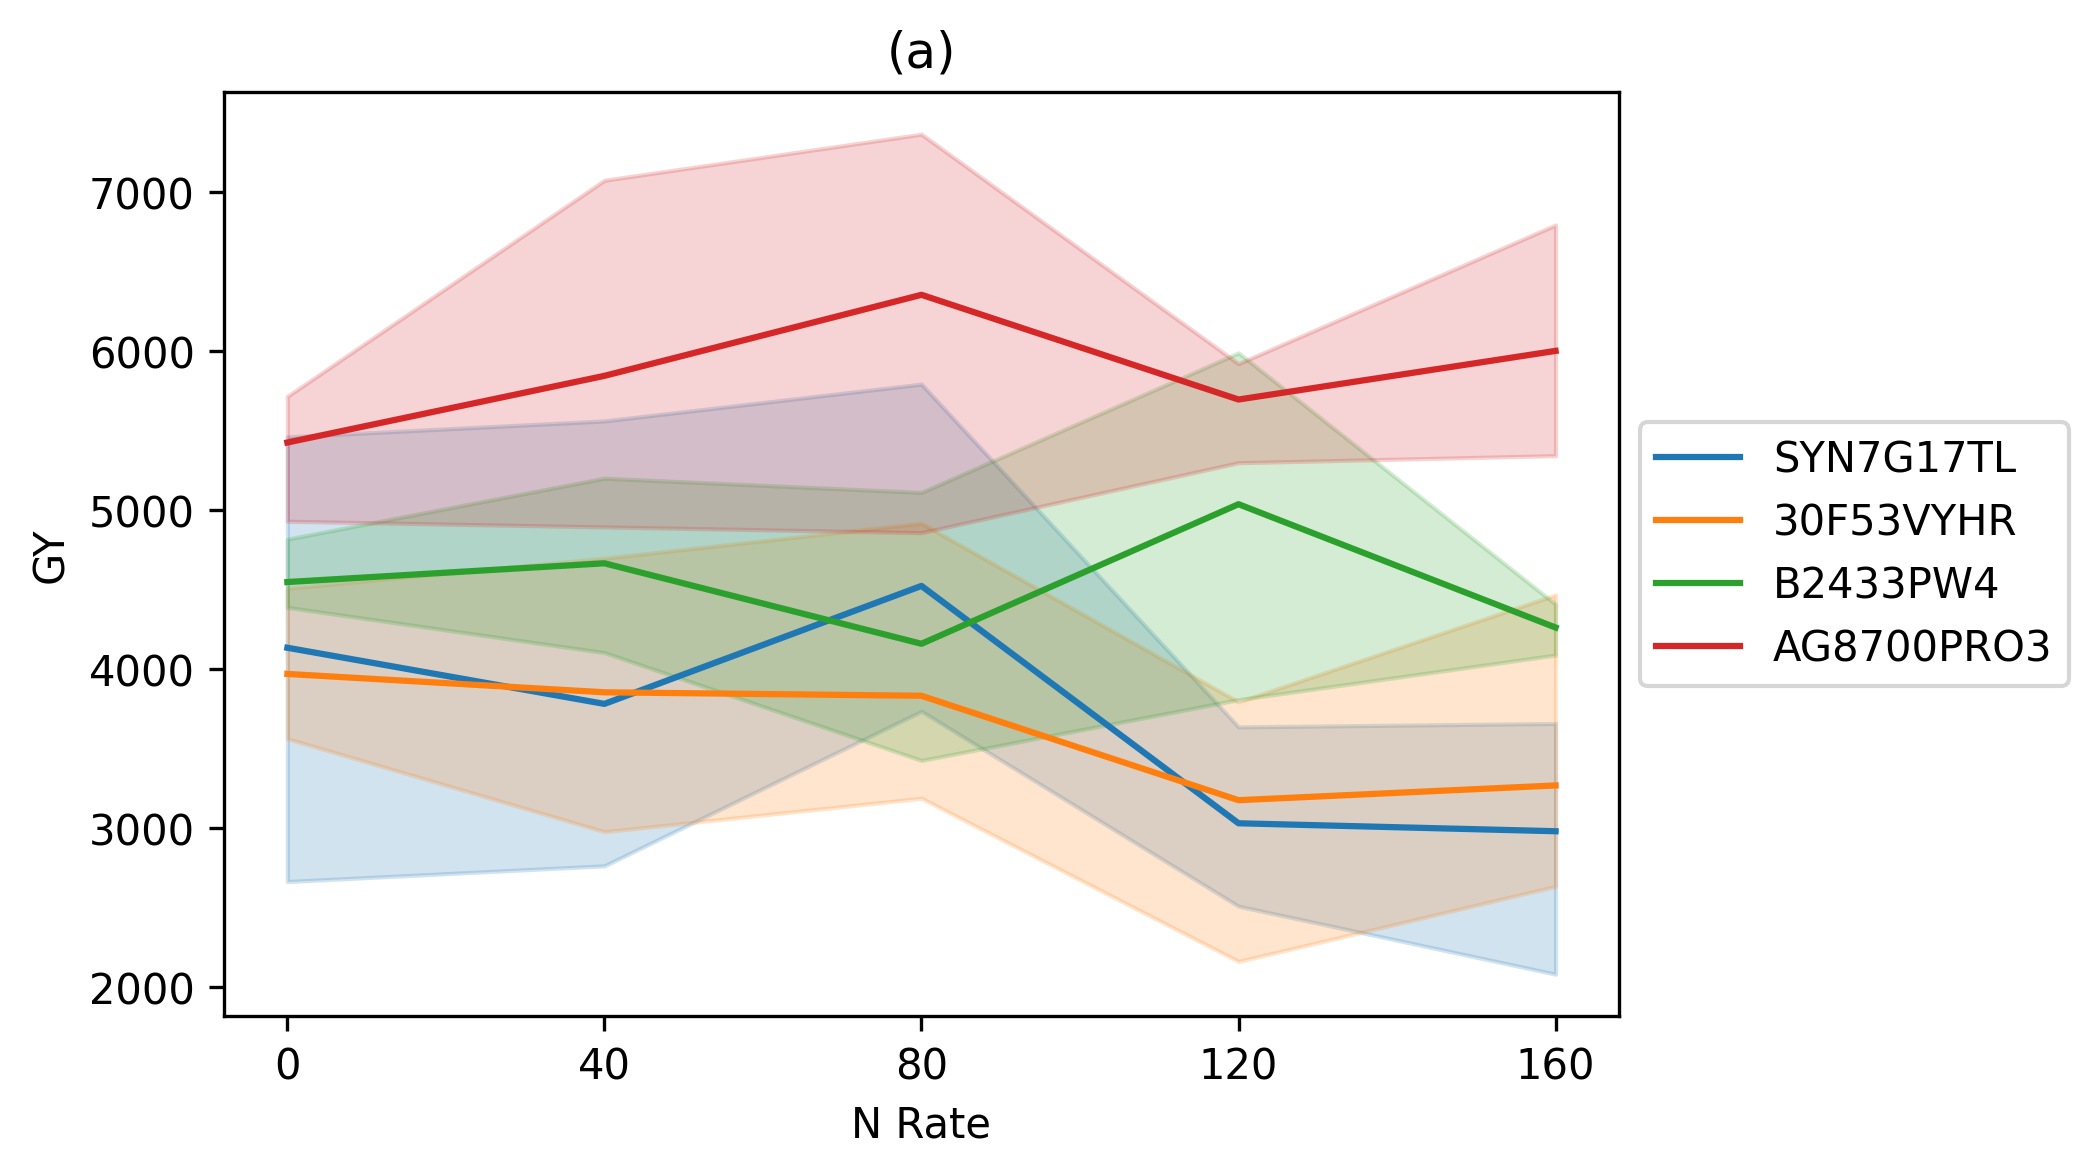

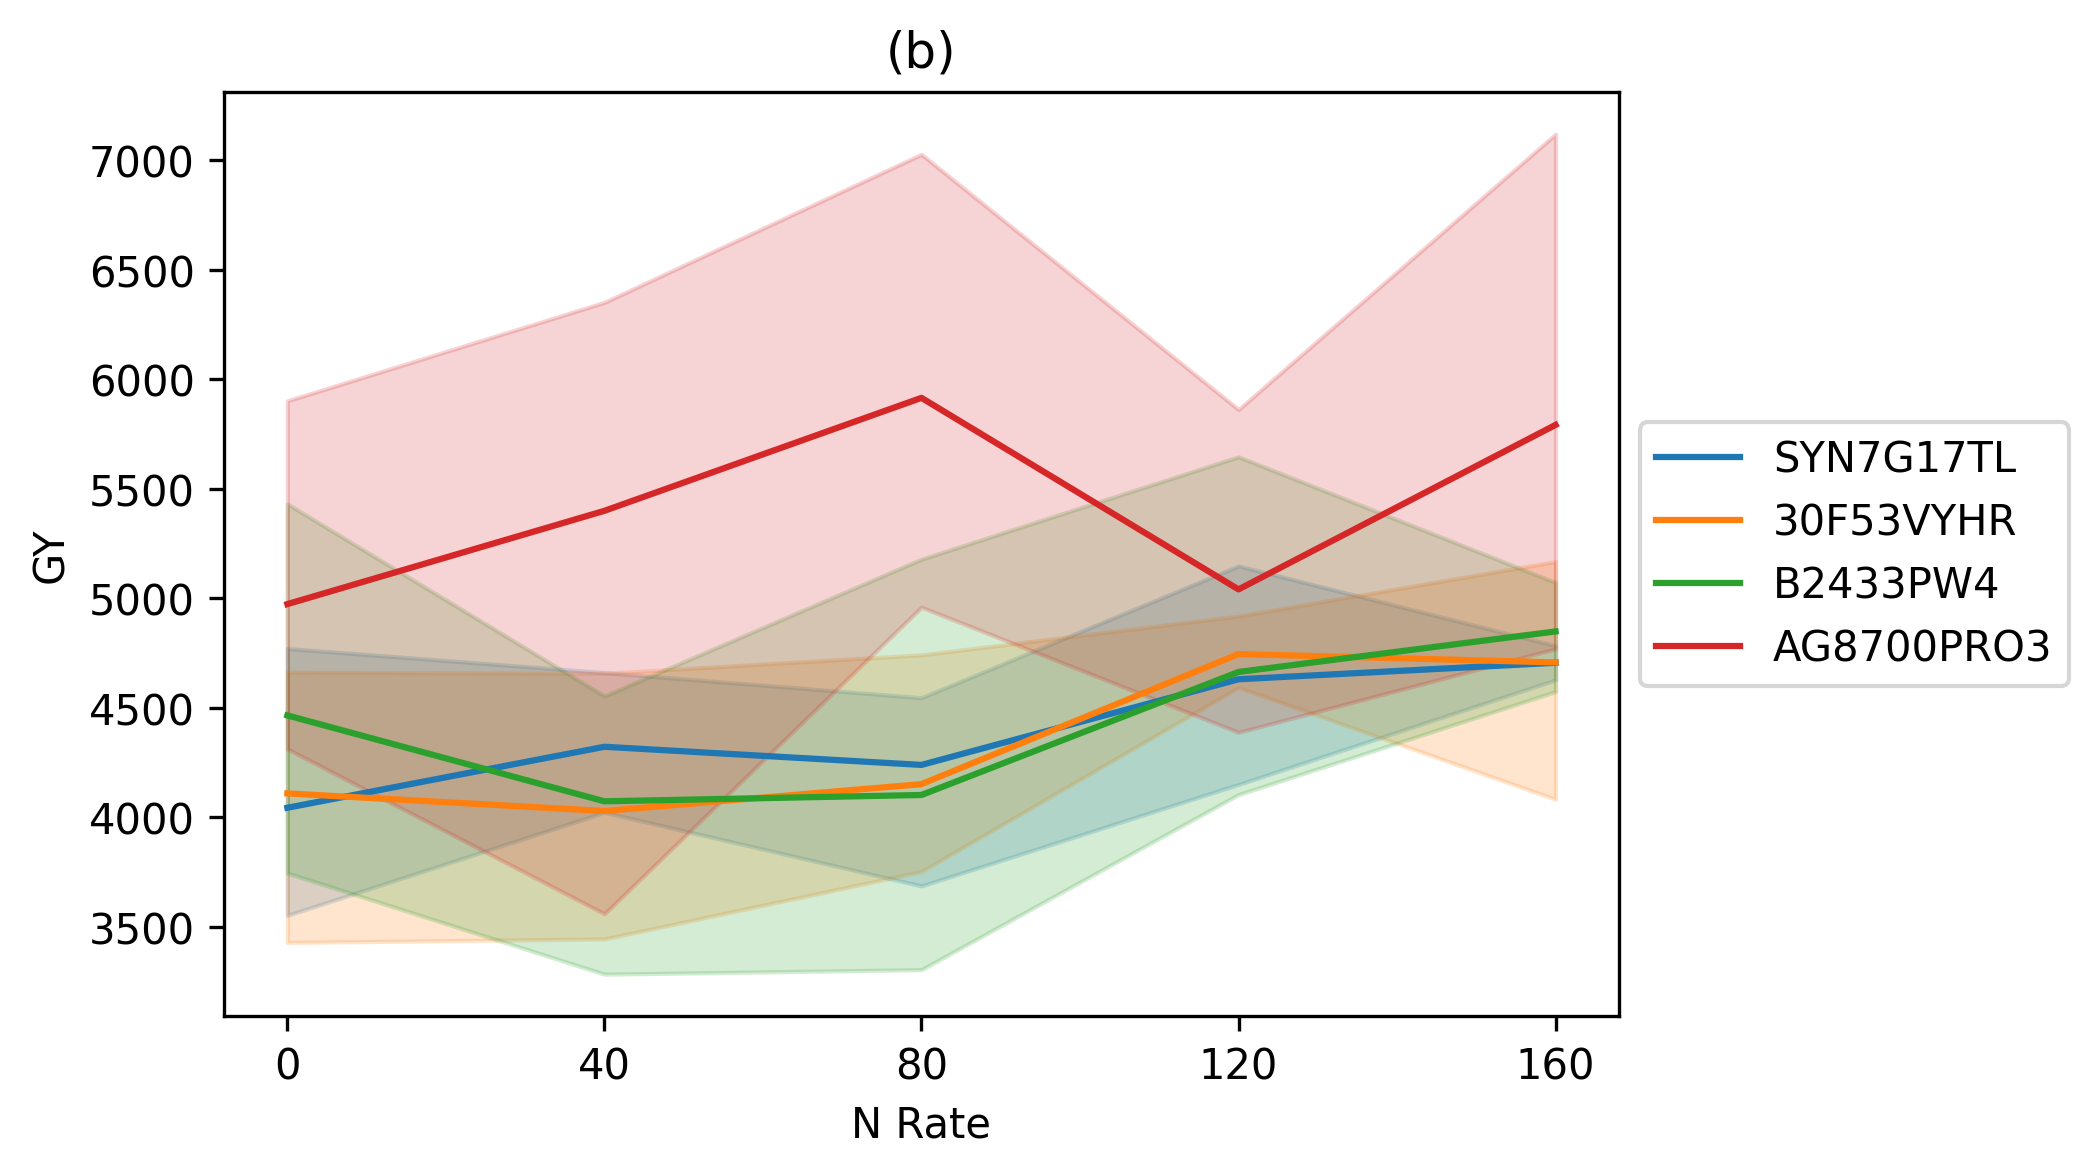

In [ ]:
plt.figure(dpi=300, figsize=(6,4))
sns.lineplot(x="N Rate", y="GY", hue="Cultivar", data=df_ufms1)
plt.title('(a)')
plt.xticks(N_rates)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.figure(dpi=300, figsize=(6,4))
plt.title('(b)')
sns.lineplot(x="N Rate", y="GY", hue="Cultivar", data=df_ufms2)
plt.xticks(N_rates)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

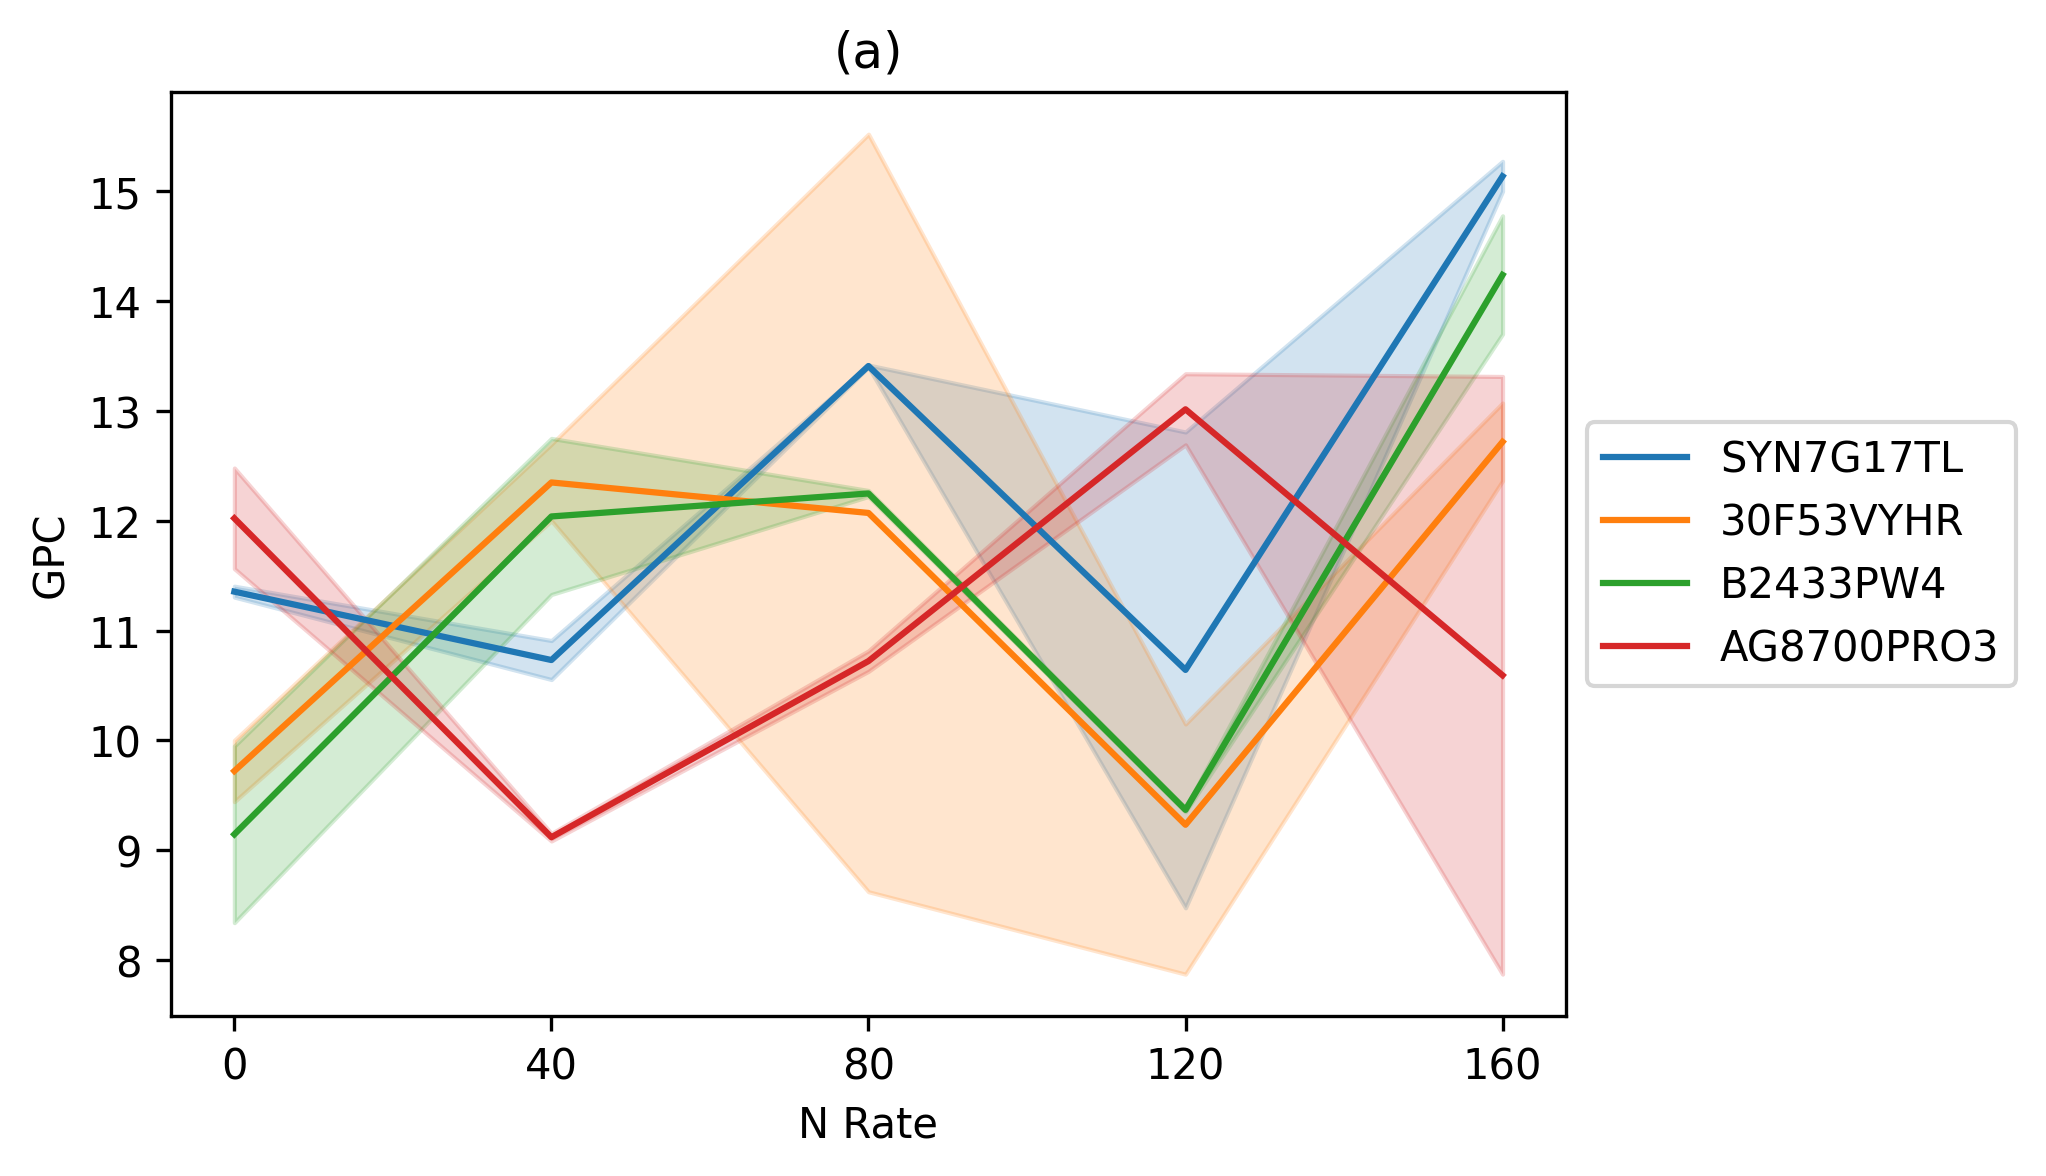

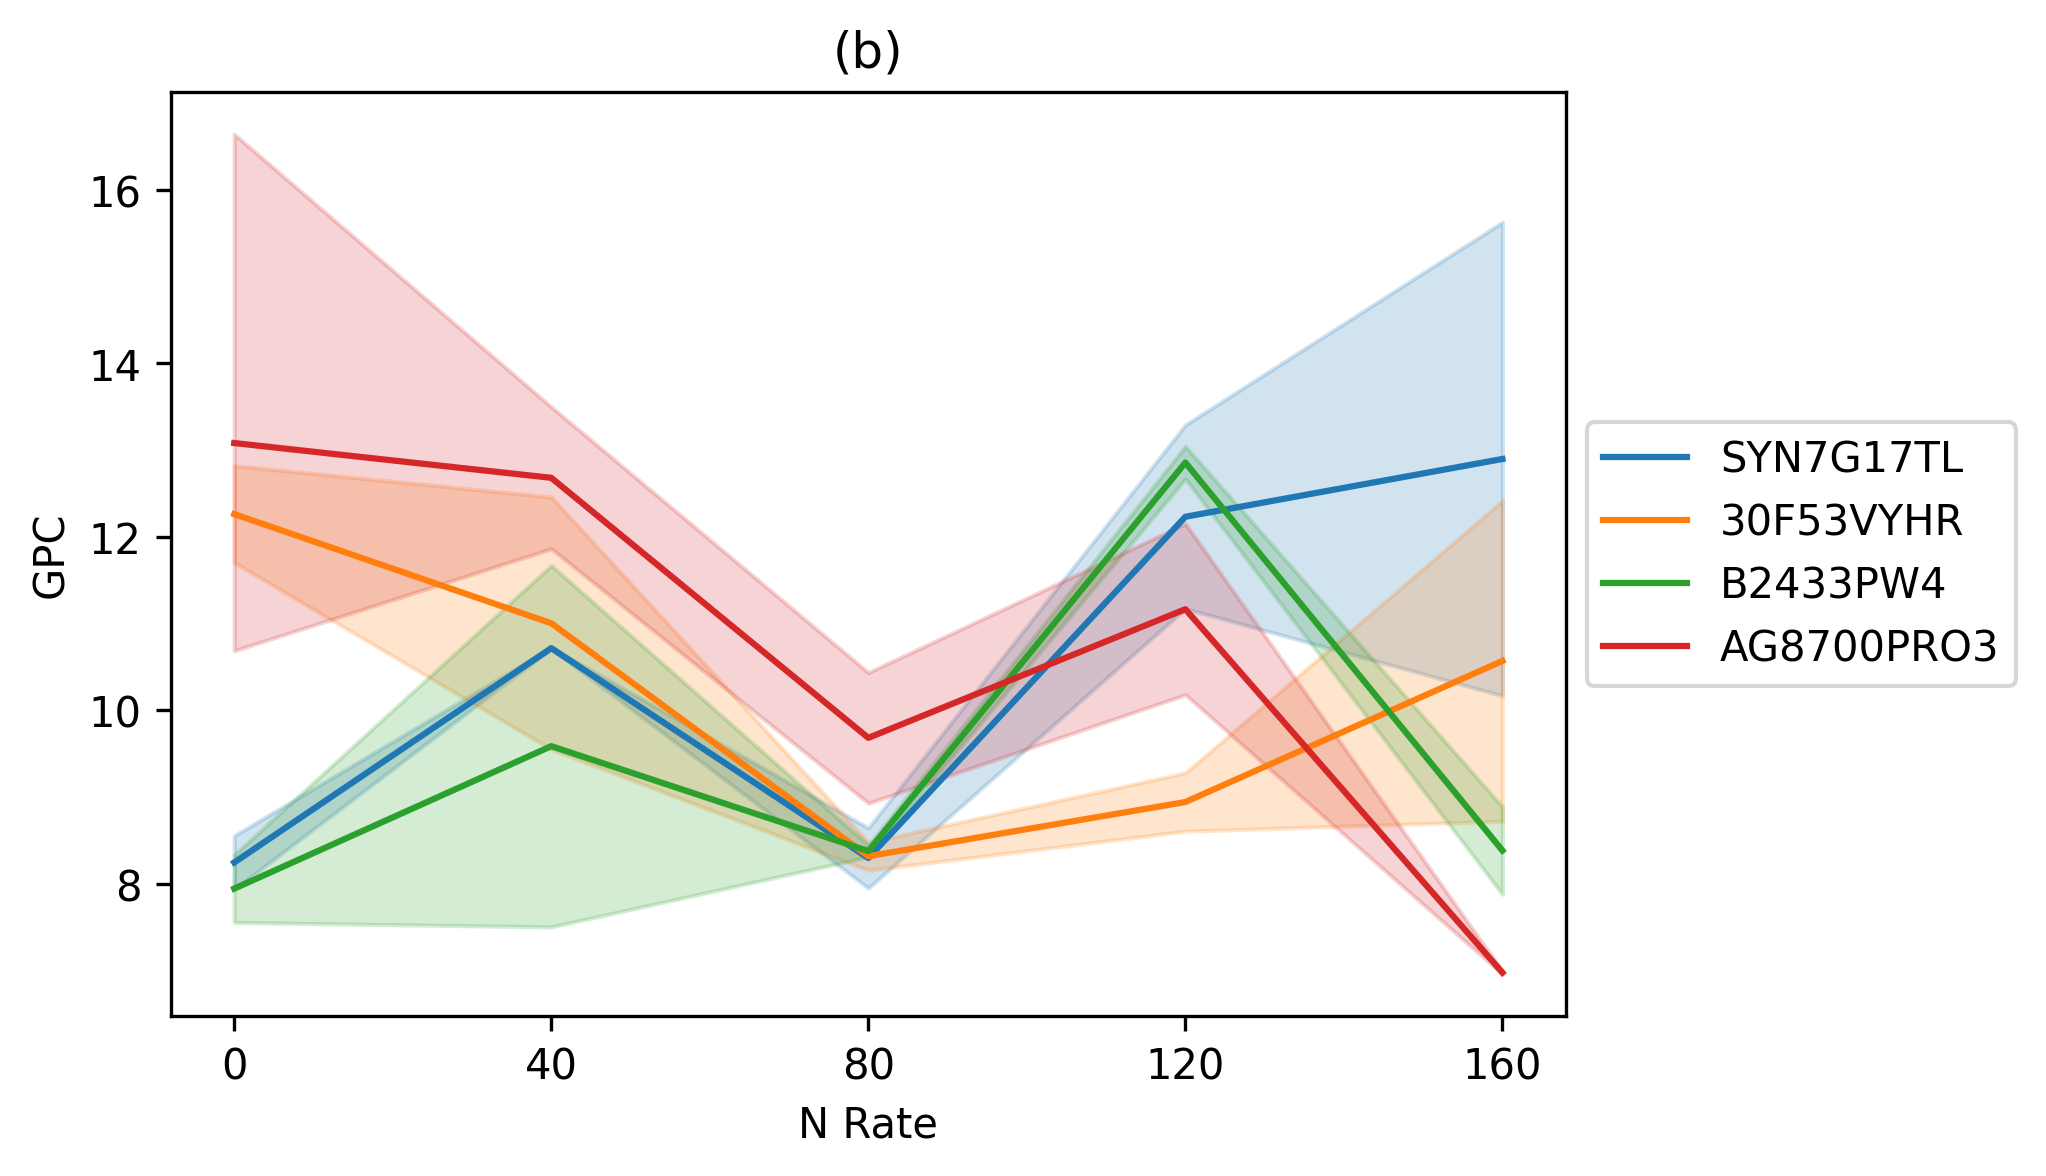

In [ ]:
plt.figure(dpi=300, figsize=(6,4))
sns.lineplot(x="N Rate", y="GPC", hue="Cultivar", data=df_ufms1)
plt.title('(a)')
plt.xticks(N_rates)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.figure(dpi=300, figsize=(6,4))
plt.title('(b)')
sns.lineplot(x="N Rate", y="GPC", hue="Cultivar", data=df_ufms2)
plt.xticks(N_rates)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

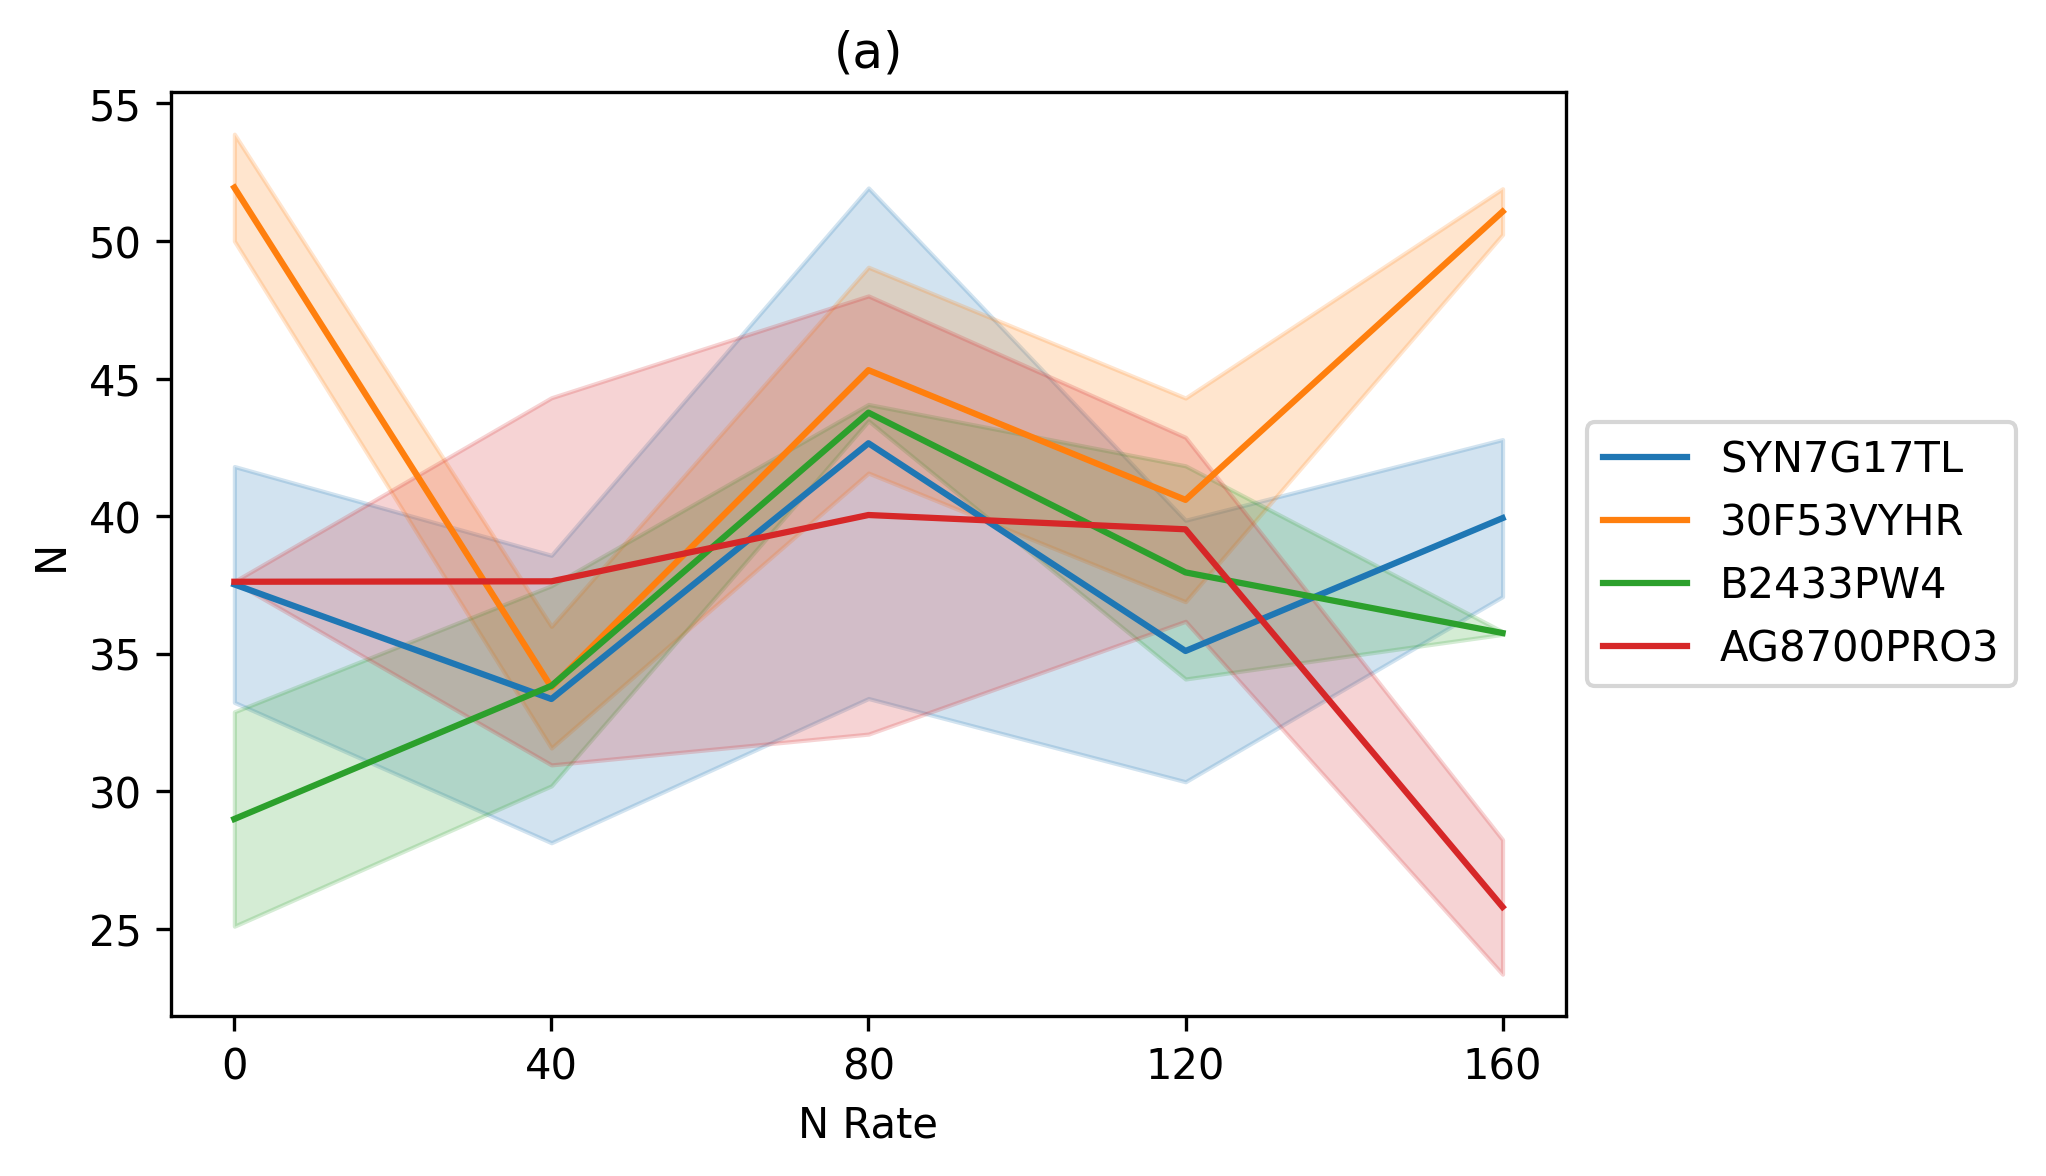

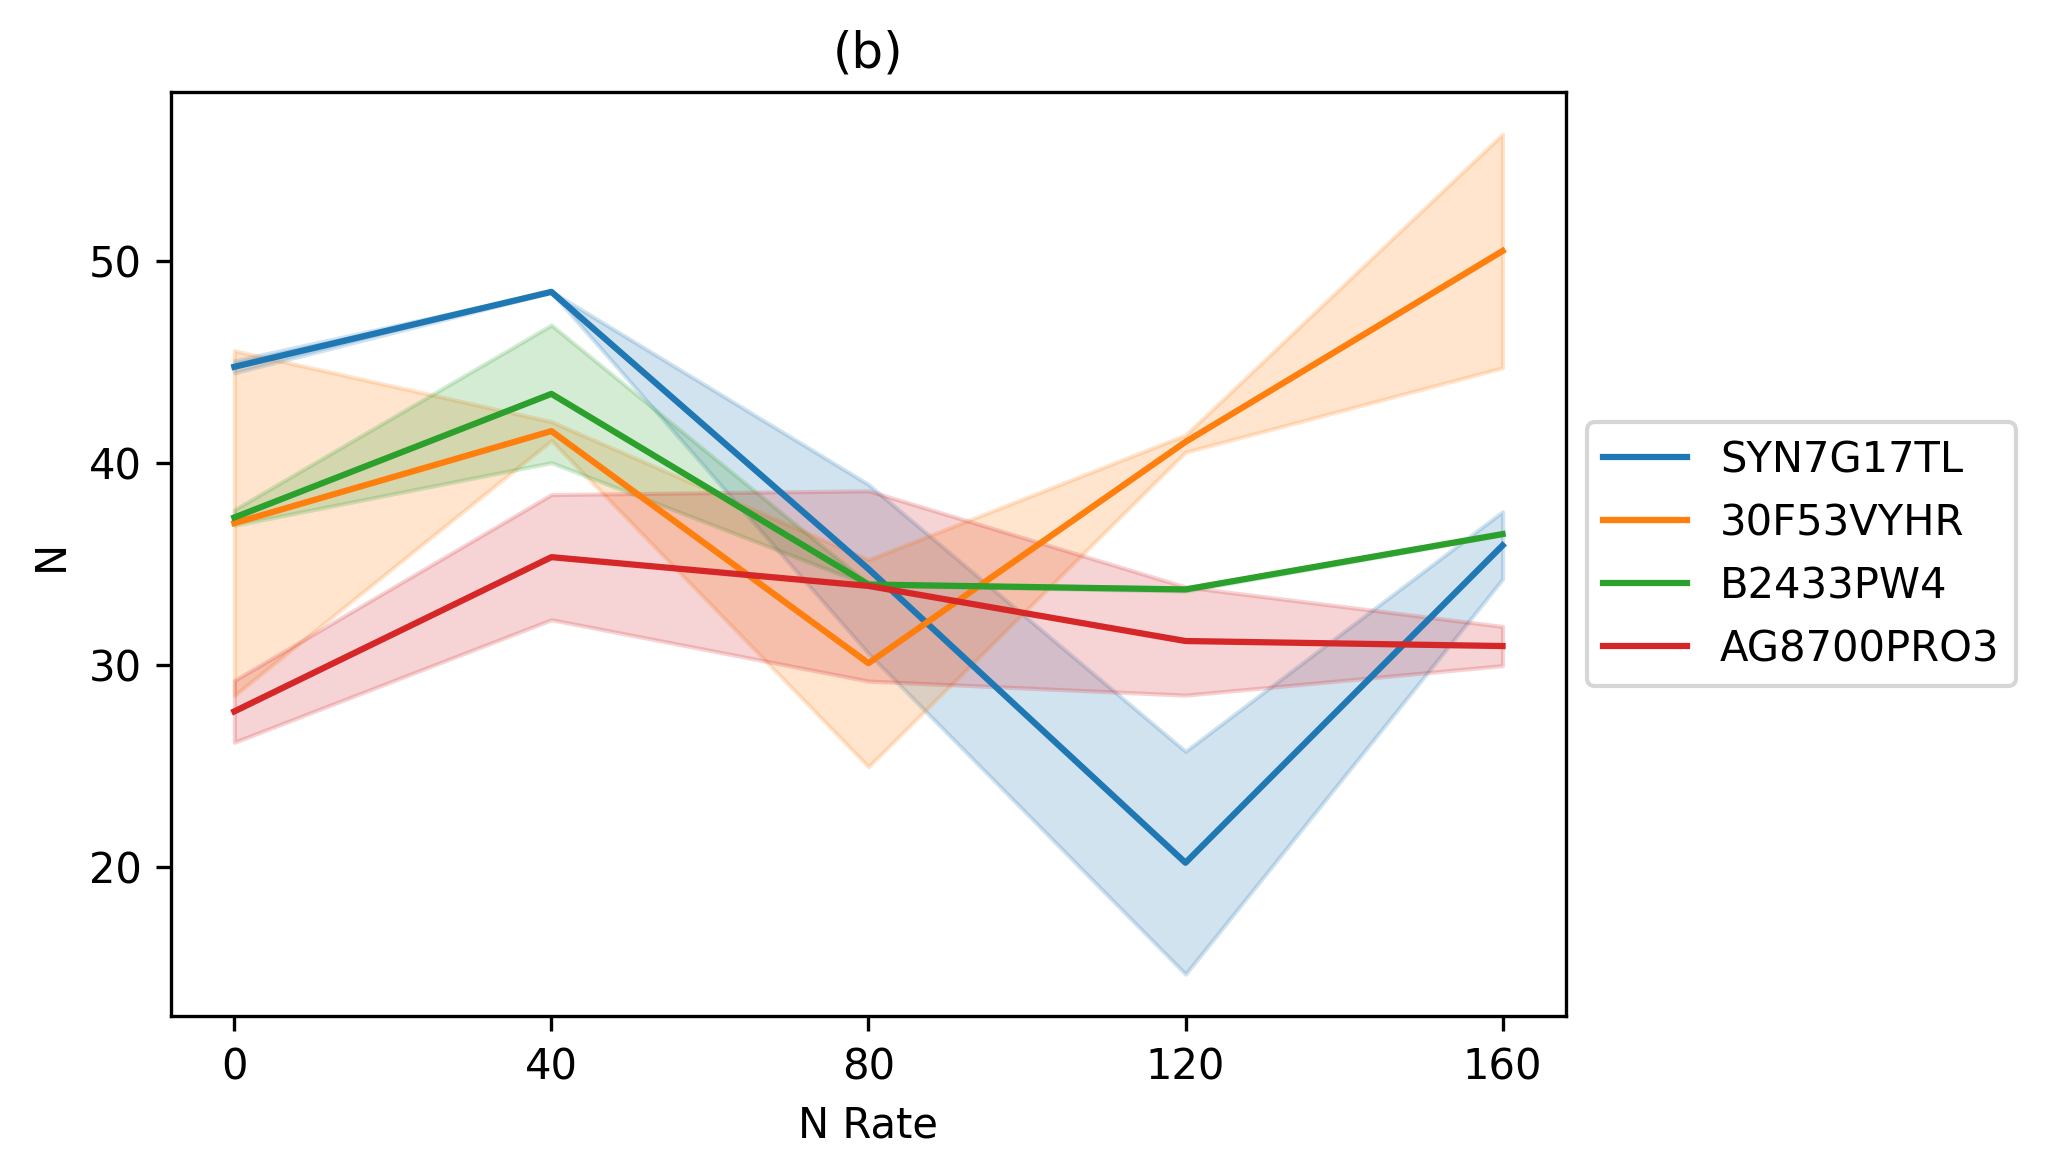

In [ ]:
plt.figure(dpi=300, figsize=(6,4))
sns.lineplot(x="N Rate", y="N", hue="Cultivar", data=df_ufms1)
plt.title('(a)')
plt.xticks(N_rates)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.figure(dpi=300, figsize=(6,4))
plt.title('(b)')
sns.lineplot(x="N Rate", y="N", hue="Cultivar", data=df_ufms2)
plt.xticks(N_rates)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Pre-processing

In [ ]:
#Normalizes each variable
def norm(df_norm):
    df_norm = df_norm.copy() #Avoid overriding the original dataframe
    for col in df_norm.columns:
        df_norm[col] = df_norm[col] / np.linalg.norm(df_norm[col], 1)
    return df_norm

# Copy original data
df_nr0_ufms1__ = df_nr0_ufms1.copy()
df_nr40_ufms1__ = df_nr40_ufms1.copy()
df_nr80_ufms1__ = df_nr80_ufms1.copy()
df_nr120_ufms1__ = df_nr120_ufms1.copy()
df_nr160_ufms1__ = df_nr160_ufms1.copy()

df_nr0_ufms2__ = df_nr0_ufms2.copy()
df_nr40_ufms2__ = df_nr40_ufms2.copy()
df_nr80_ufms2__ = df_nr80_ufms2.copy()
df_nr120_ufms2__ = df_nr120_ufms2.copy()
df_nr160_ufms2__ = df_nr160_ufms2.copy()

# Normalize
df_nr0_ufms1__[Vars]   = norm(df_nr0_ufms1[Vars])
df_nr40_ufms1__[Vars]  = norm(df_nr40_ufms1[Vars])
df_nr80_ufms1__[Vars]  = norm(df_nr80_ufms1[Vars])
df_nr120_ufms1__[Vars] = norm(df_nr120_ufms1[Vars])
df_nr160_ufms1__[Vars] = norm(df_nr160_ufms1[Vars])

df_nr0_ufms2__[Vars]   = norm(df_nr0_ufms2[Vars])
df_nr40_ufms2__[Vars]  = norm(df_nr40_ufms2[Vars])
df_nr80_ufms2__[Vars]  = norm(df_nr80_ufms2[Vars])
df_nr120_ufms2__[Vars] = norm(df_nr120_ufms2[Vars])
df_nr160_ufms2__[Vars] = norm(df_nr160_ufms2[Vars])

UFMS 1
UFMS 2


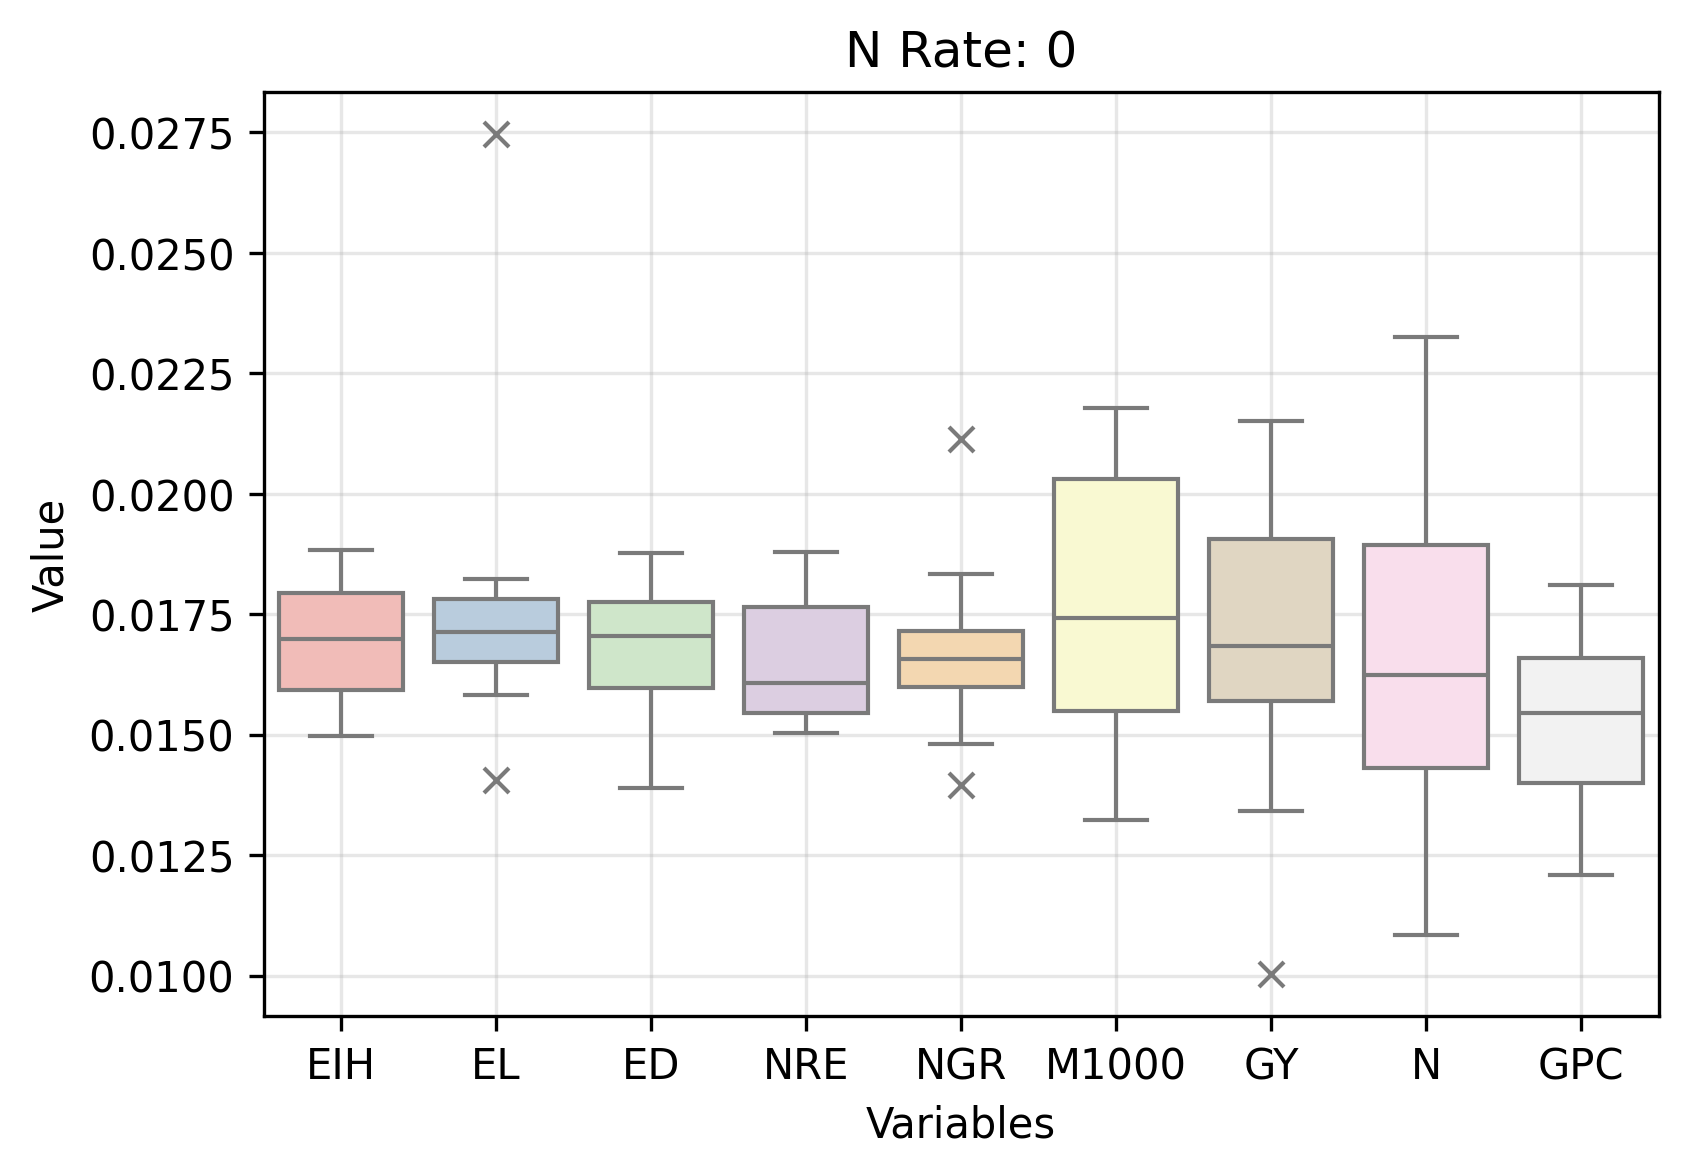

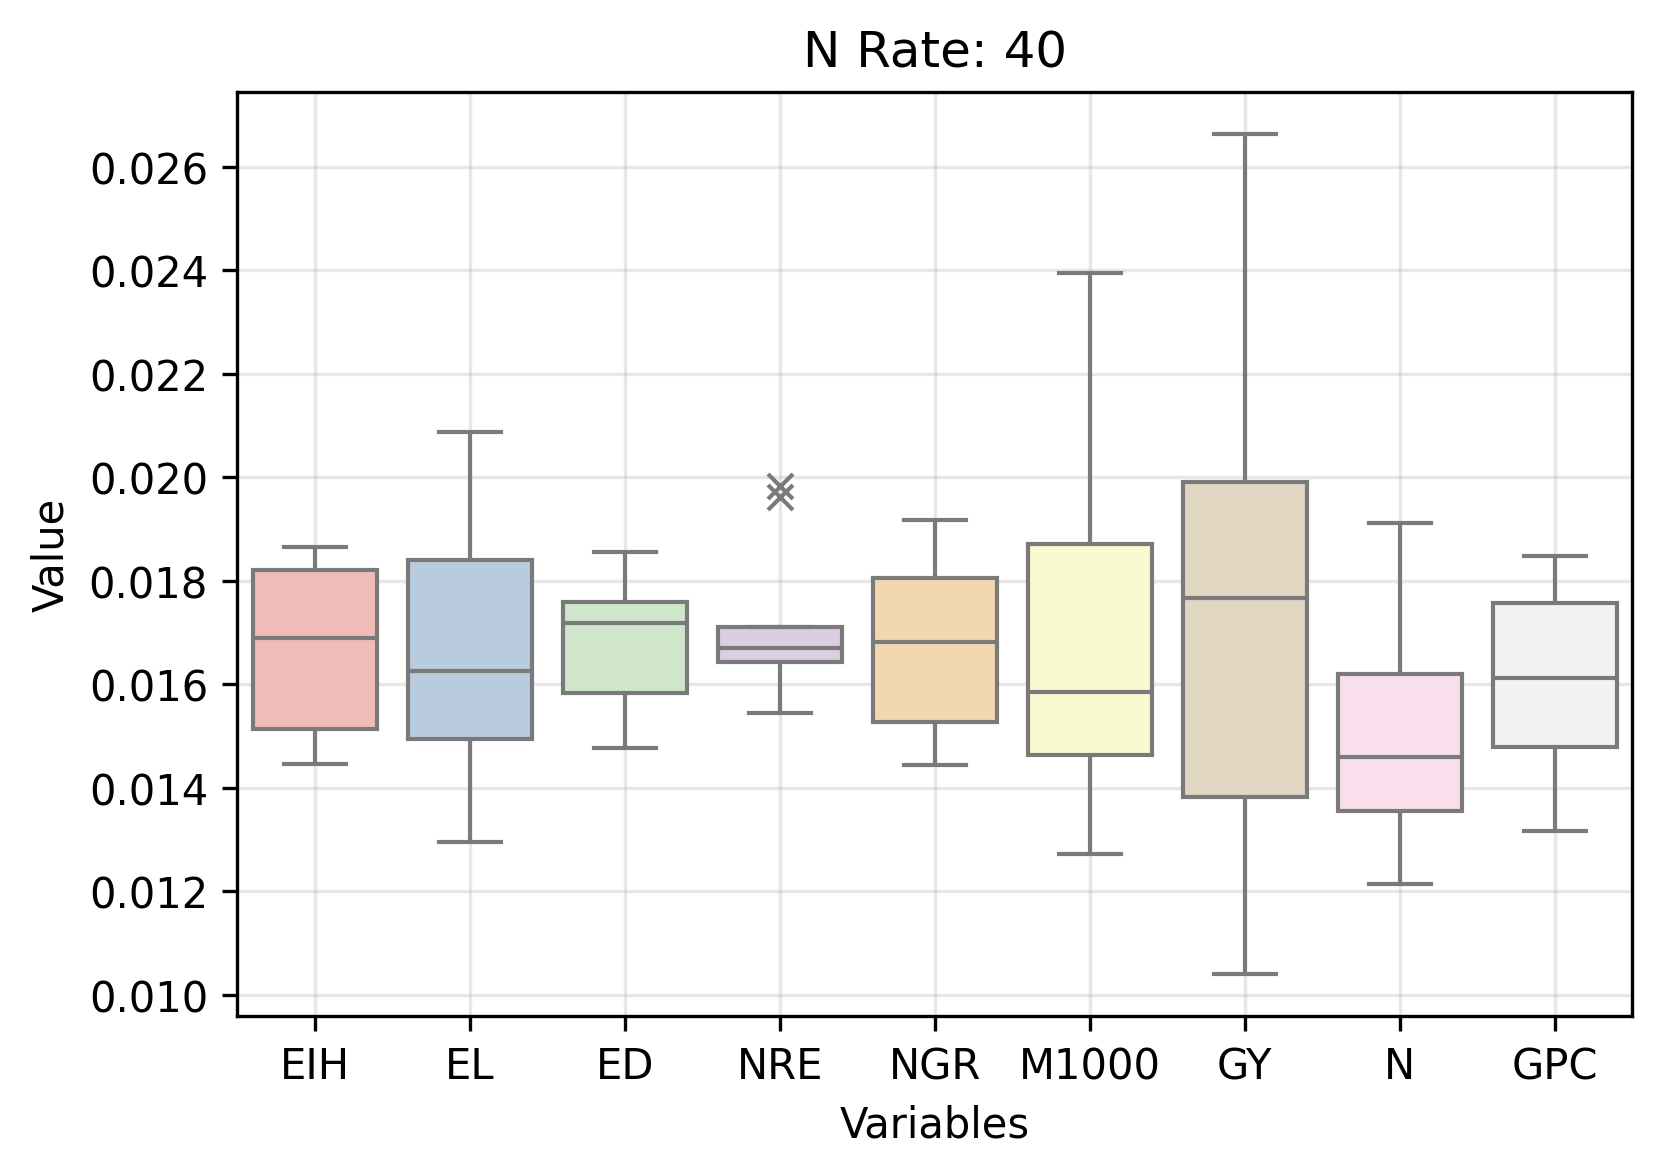

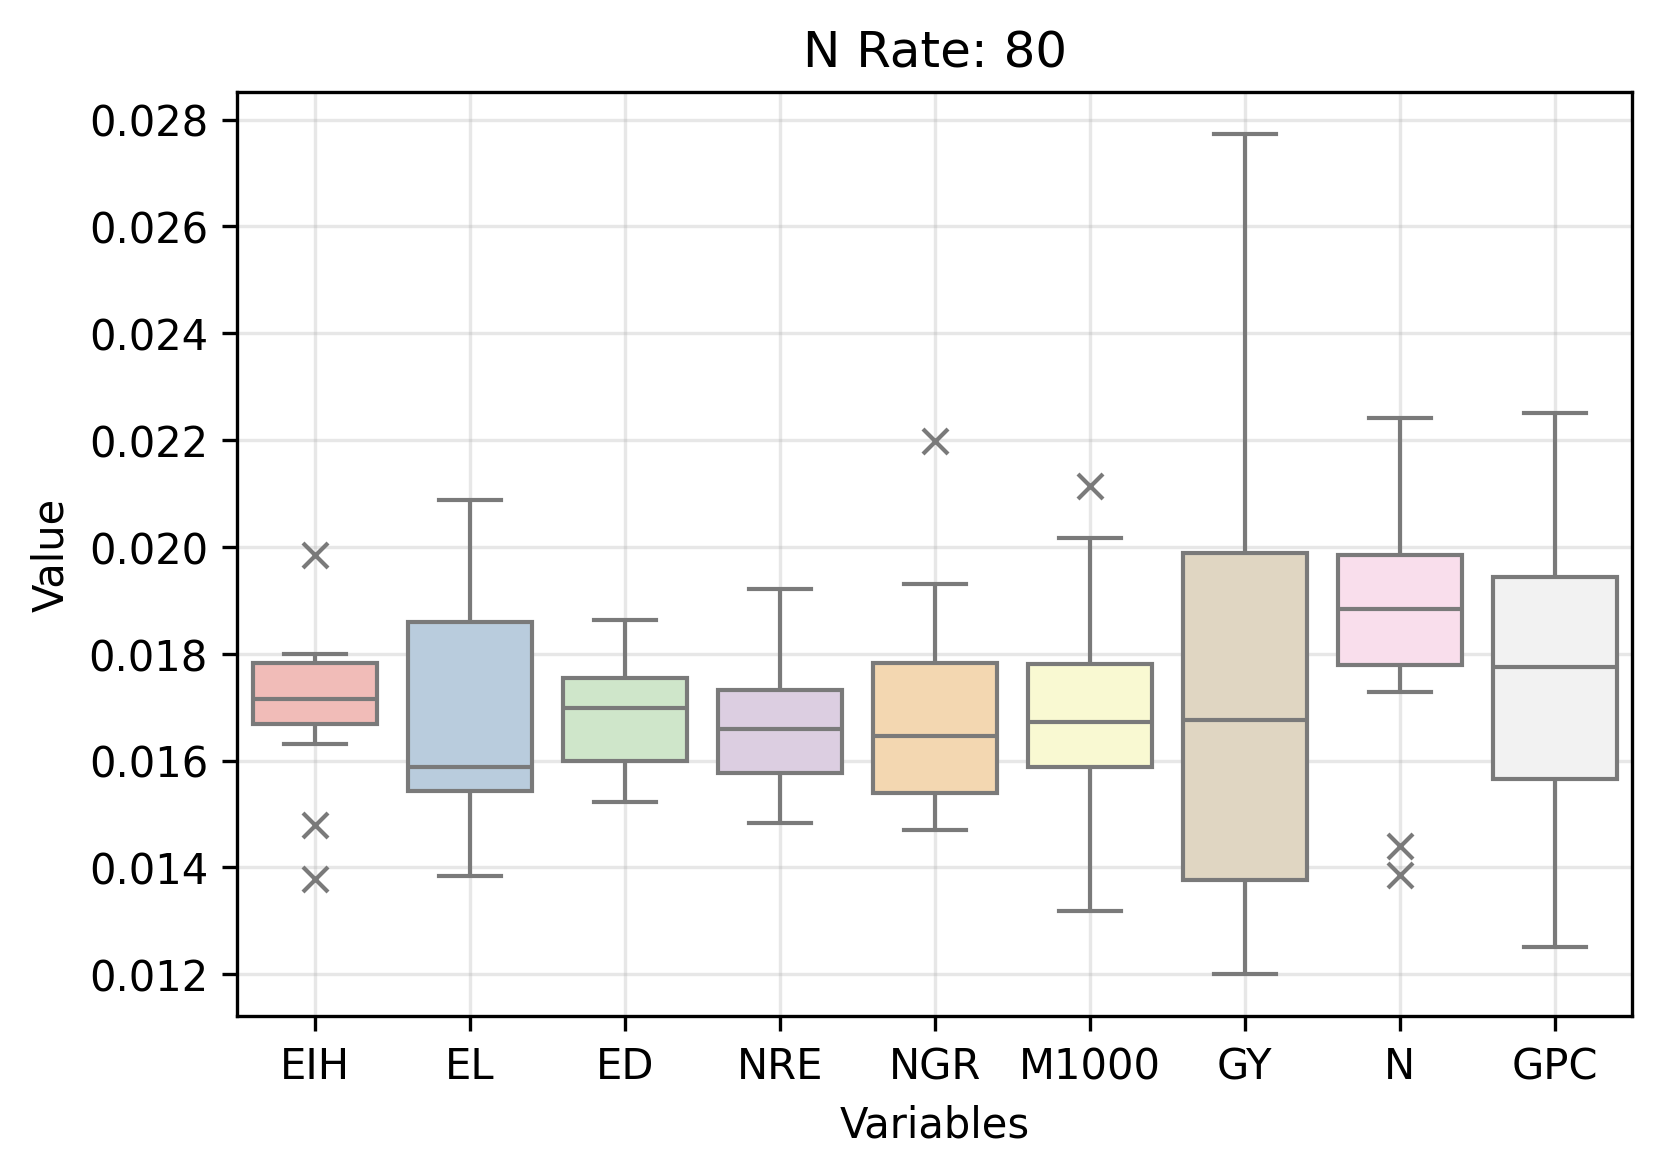

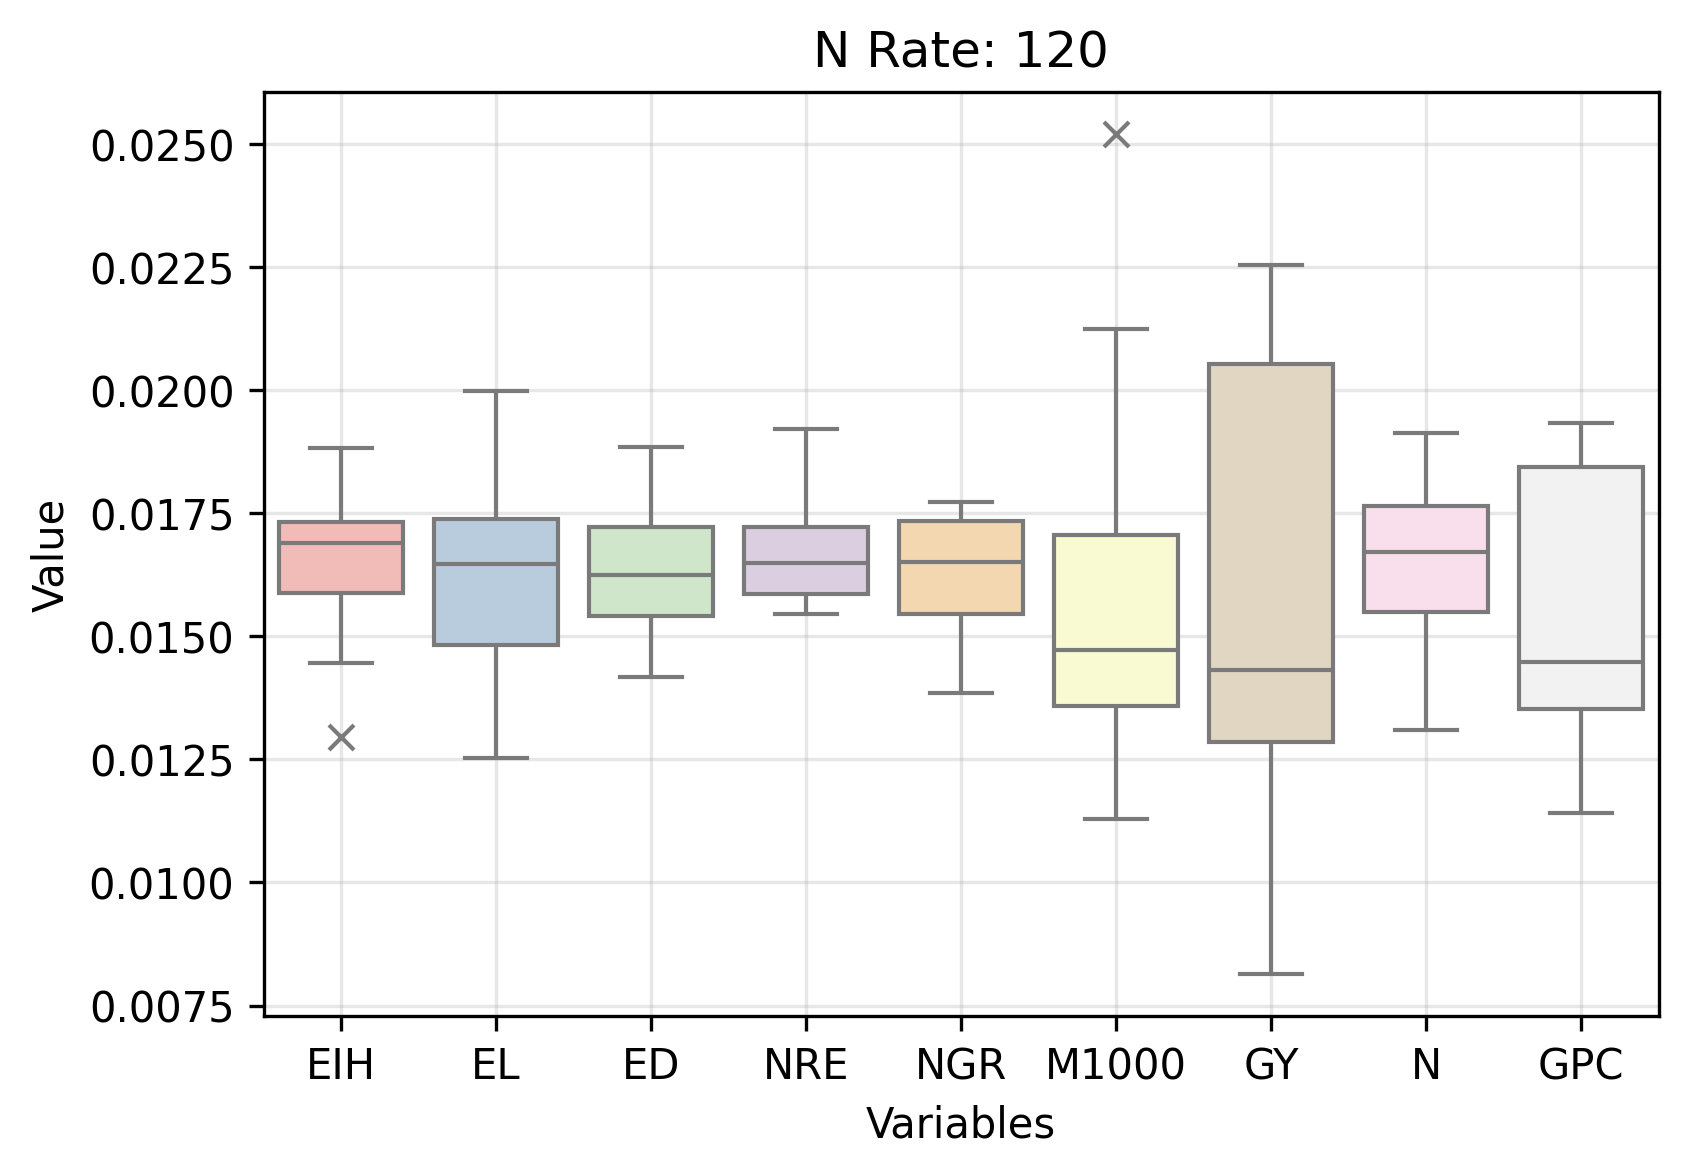

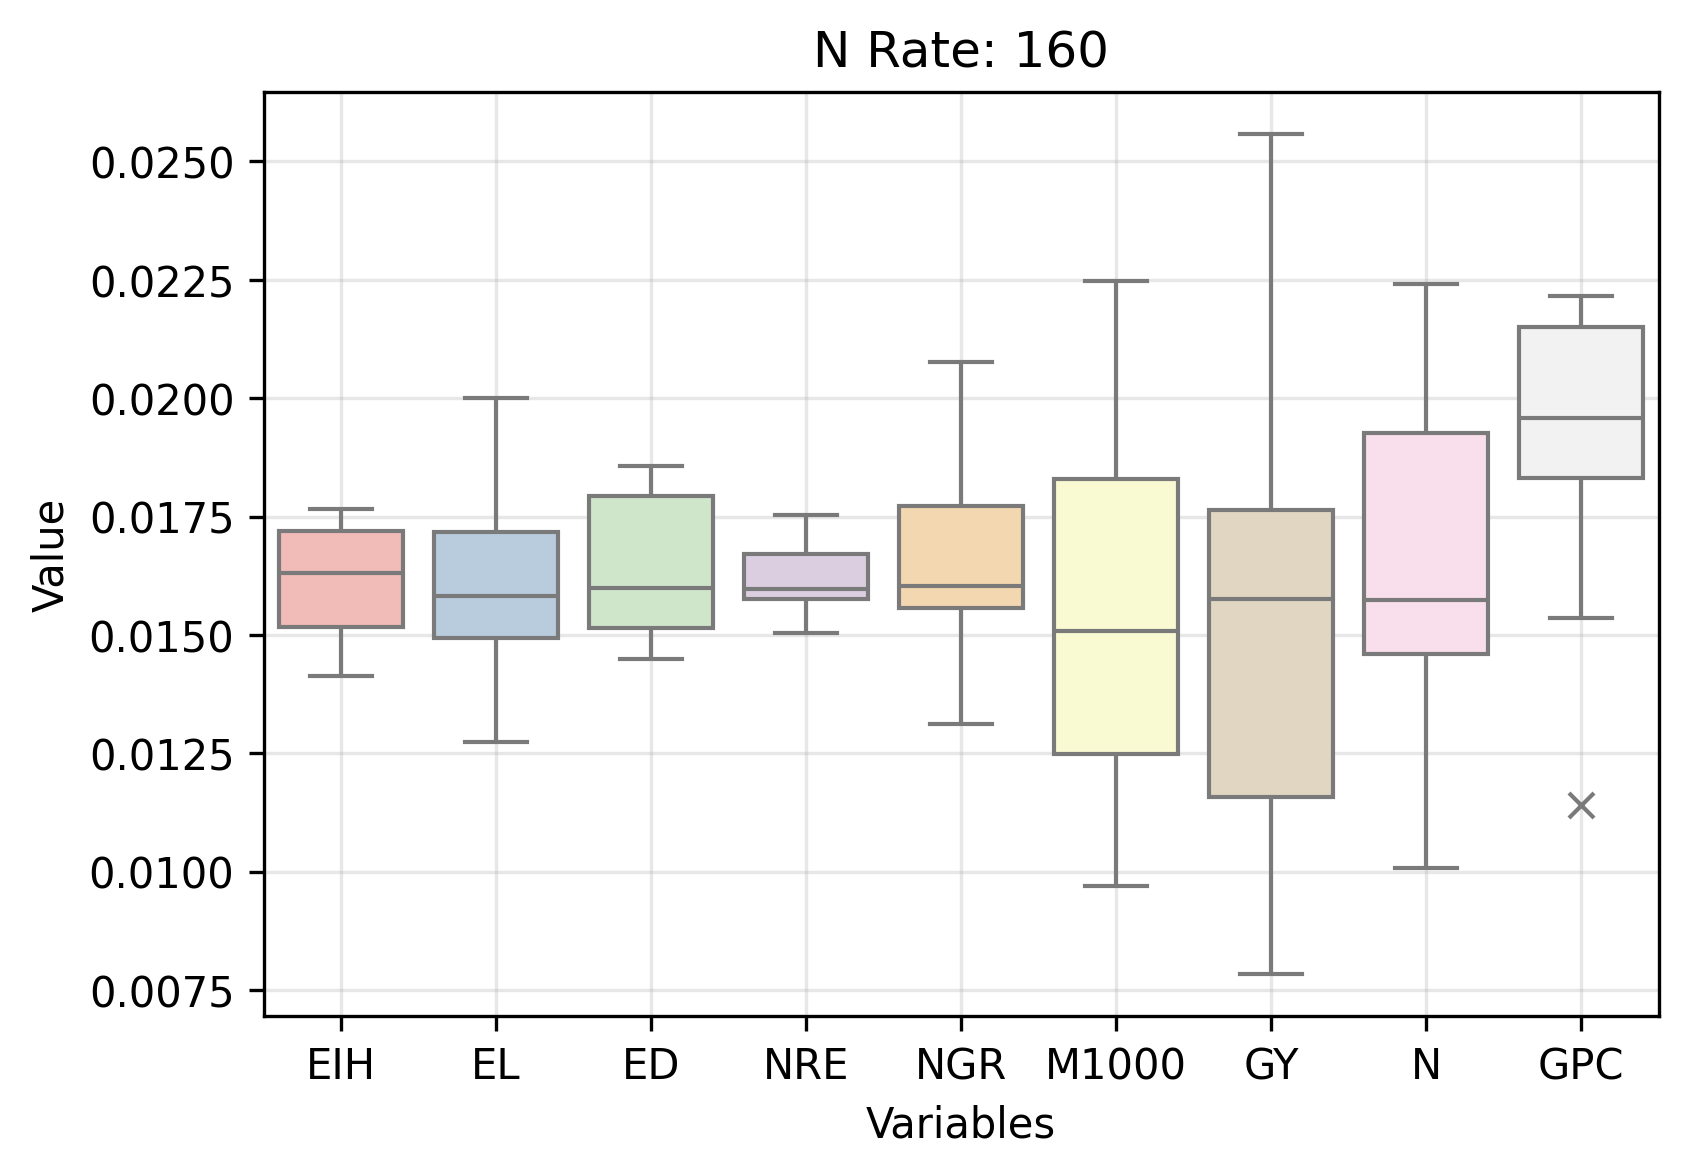

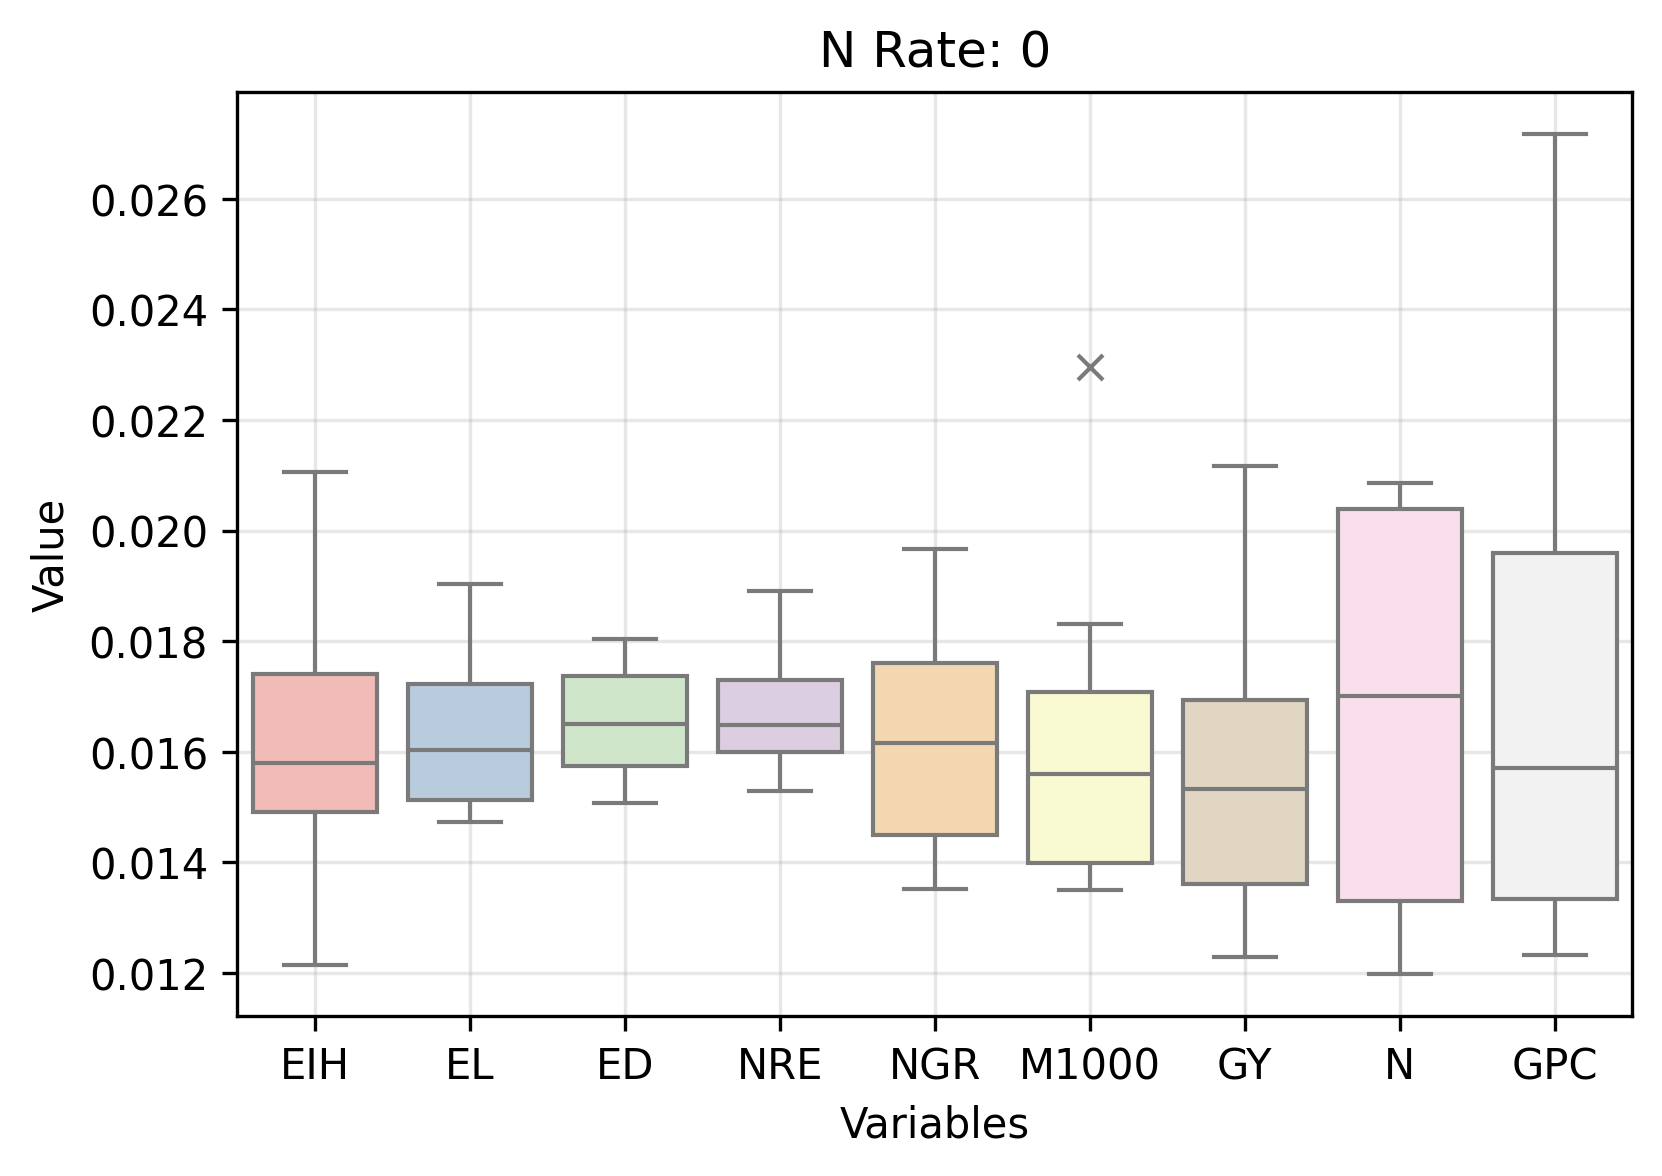

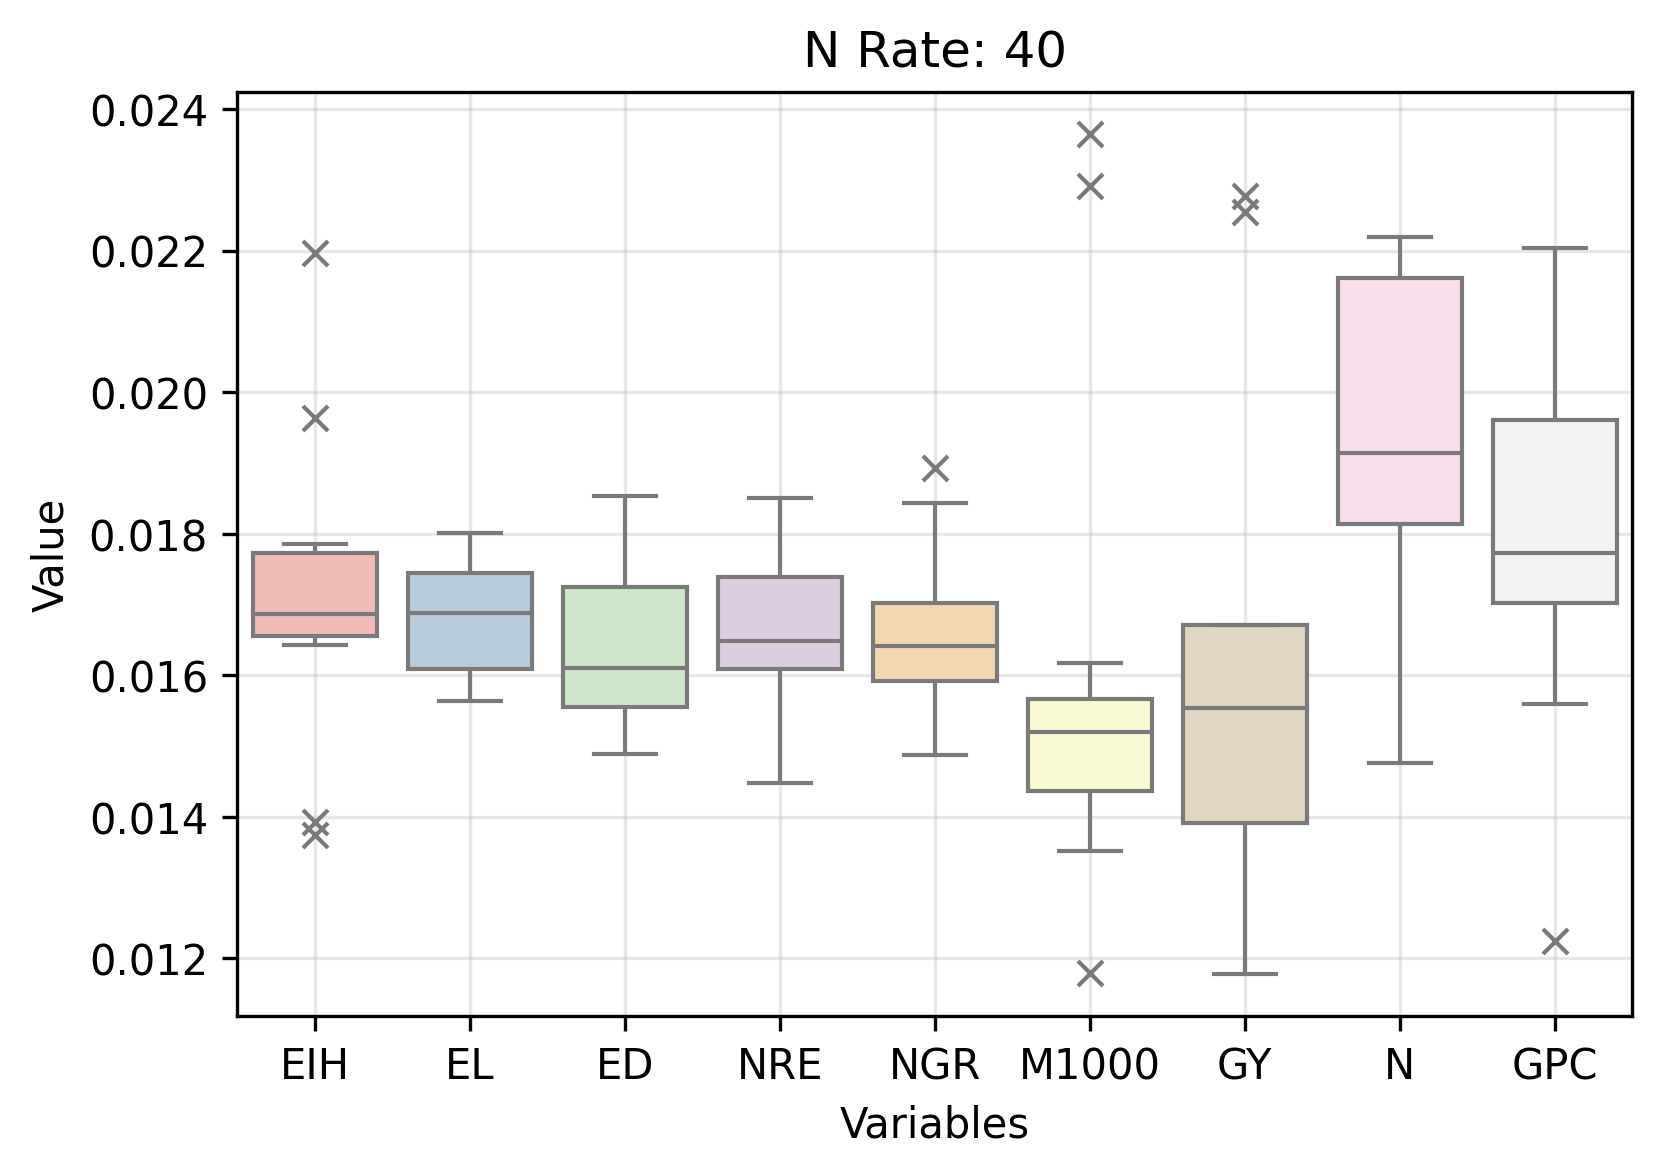

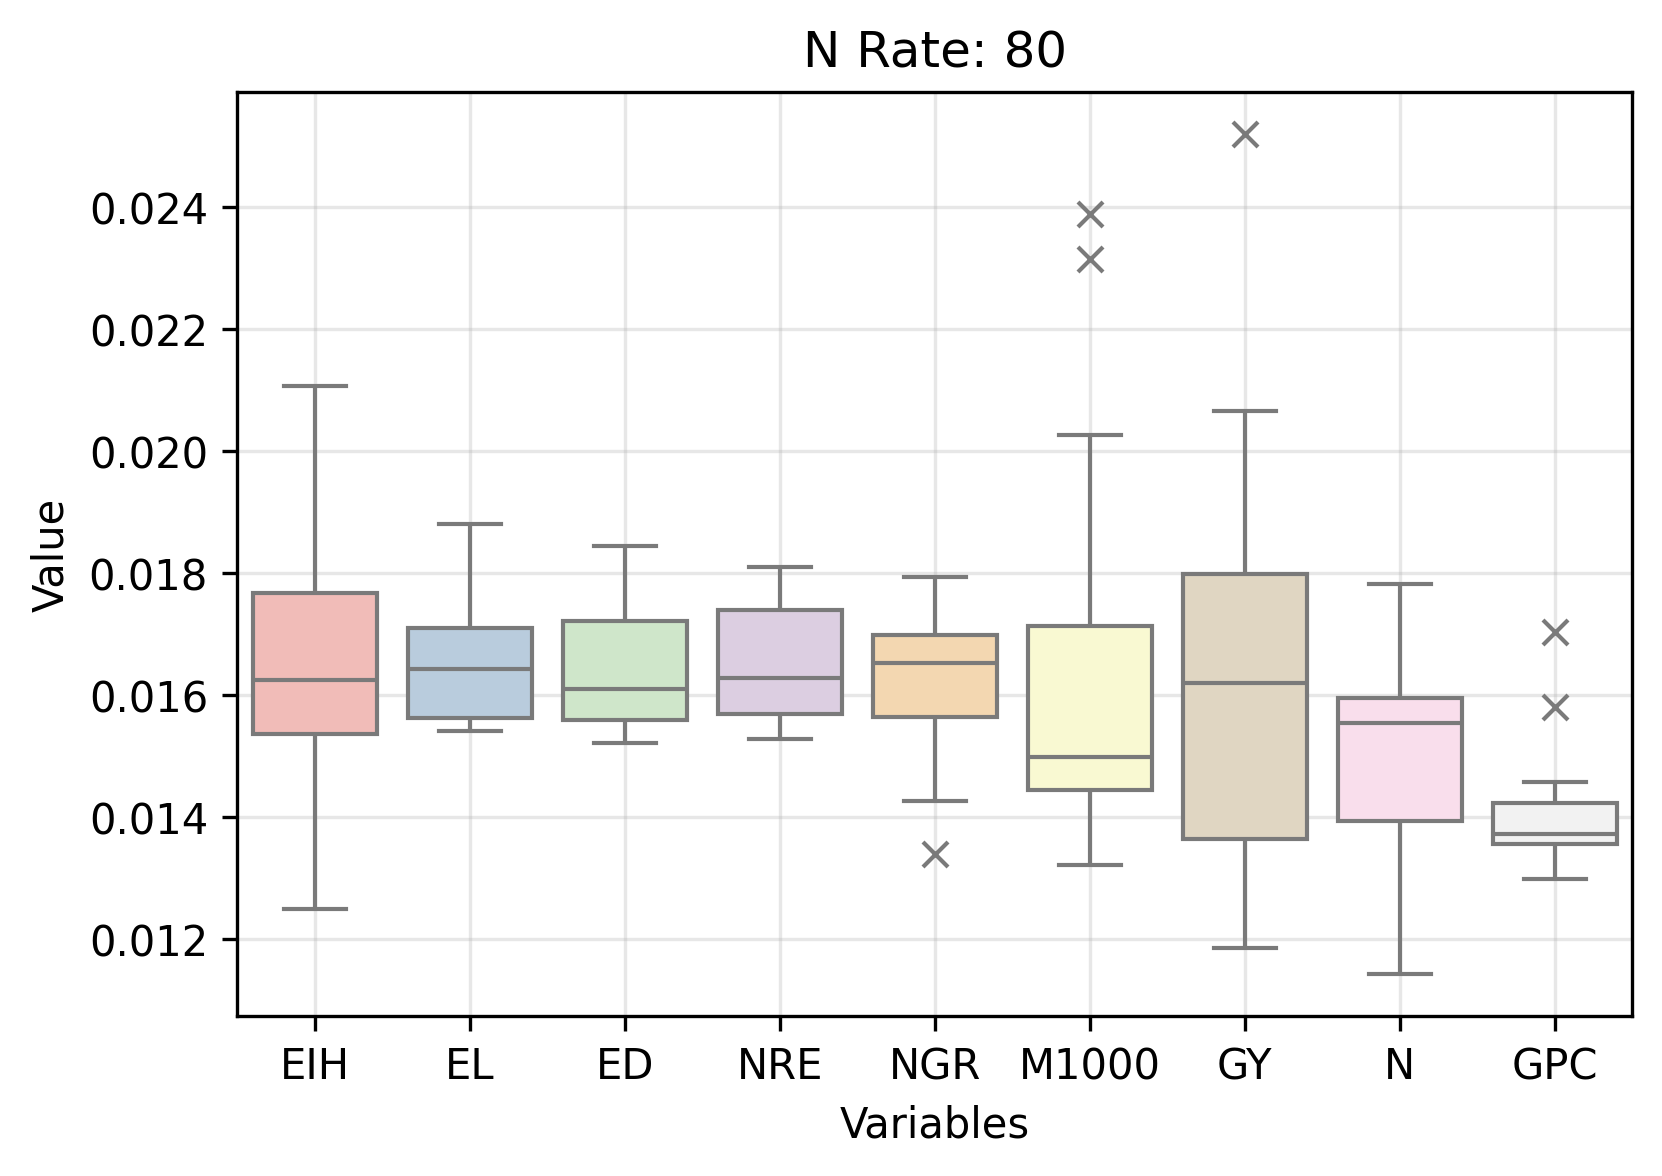

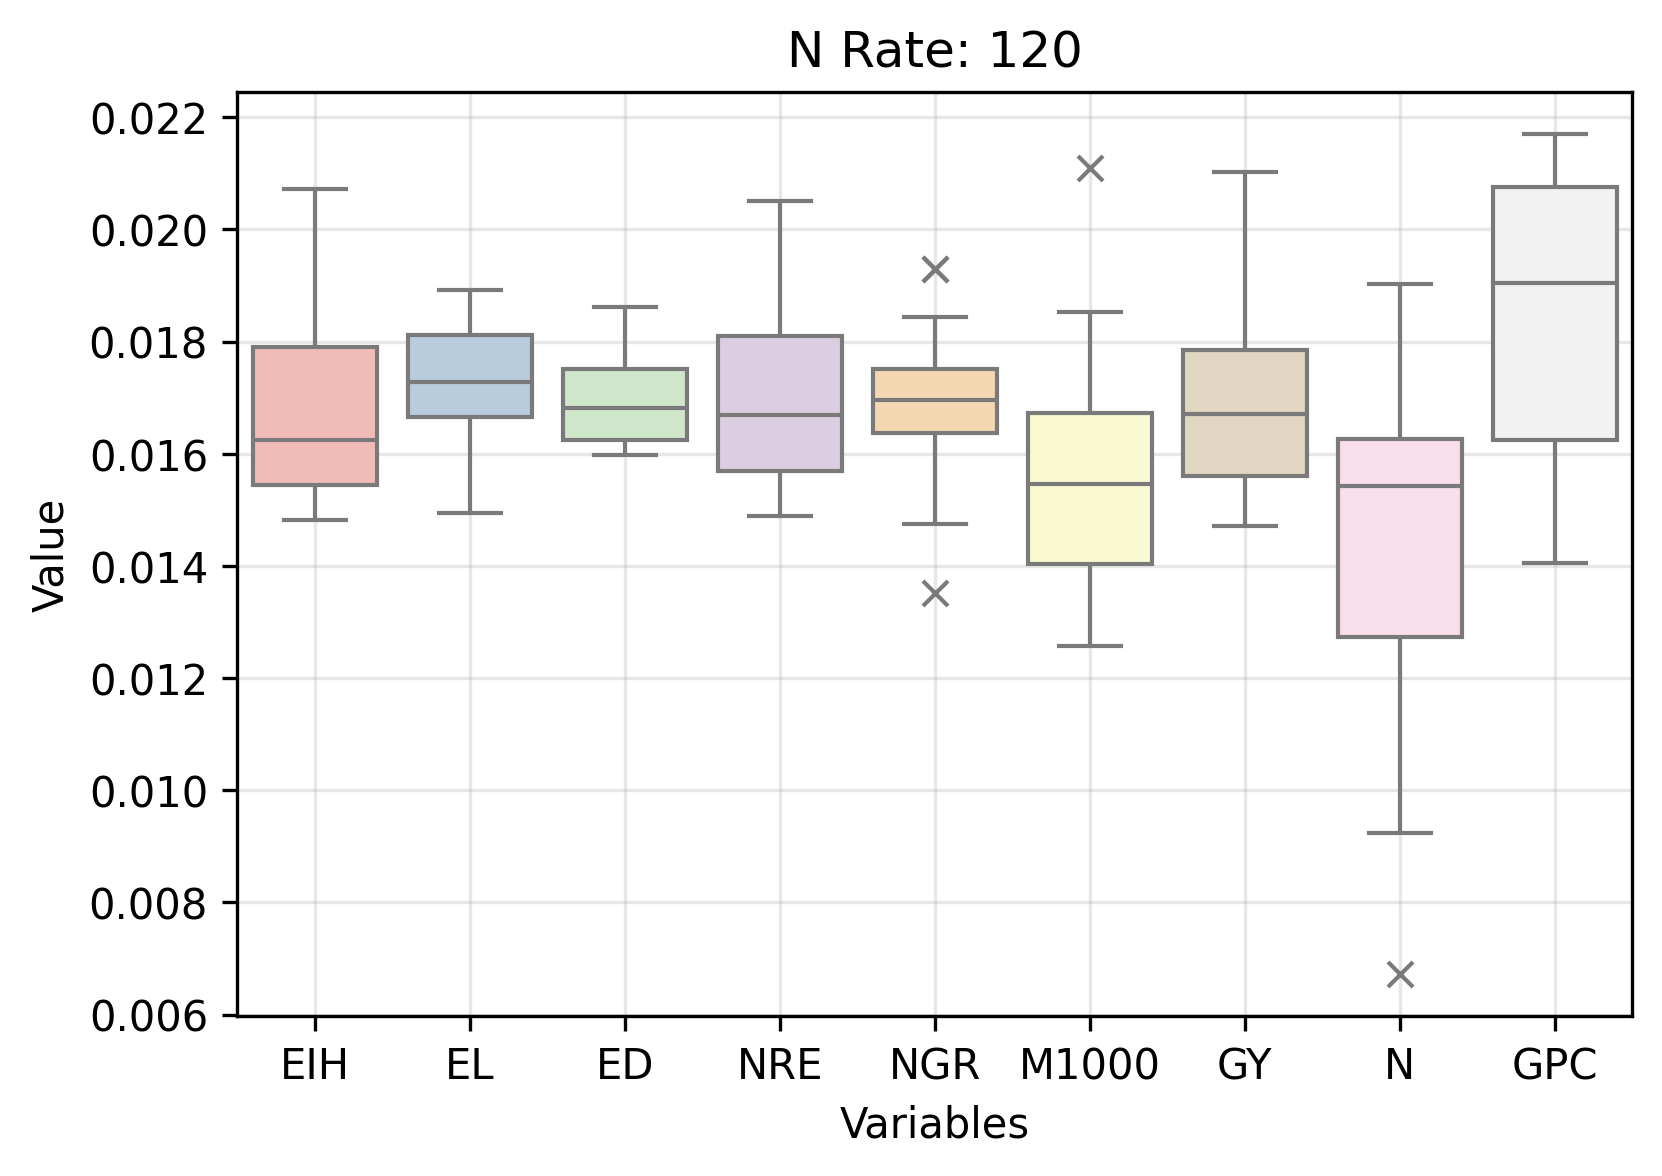

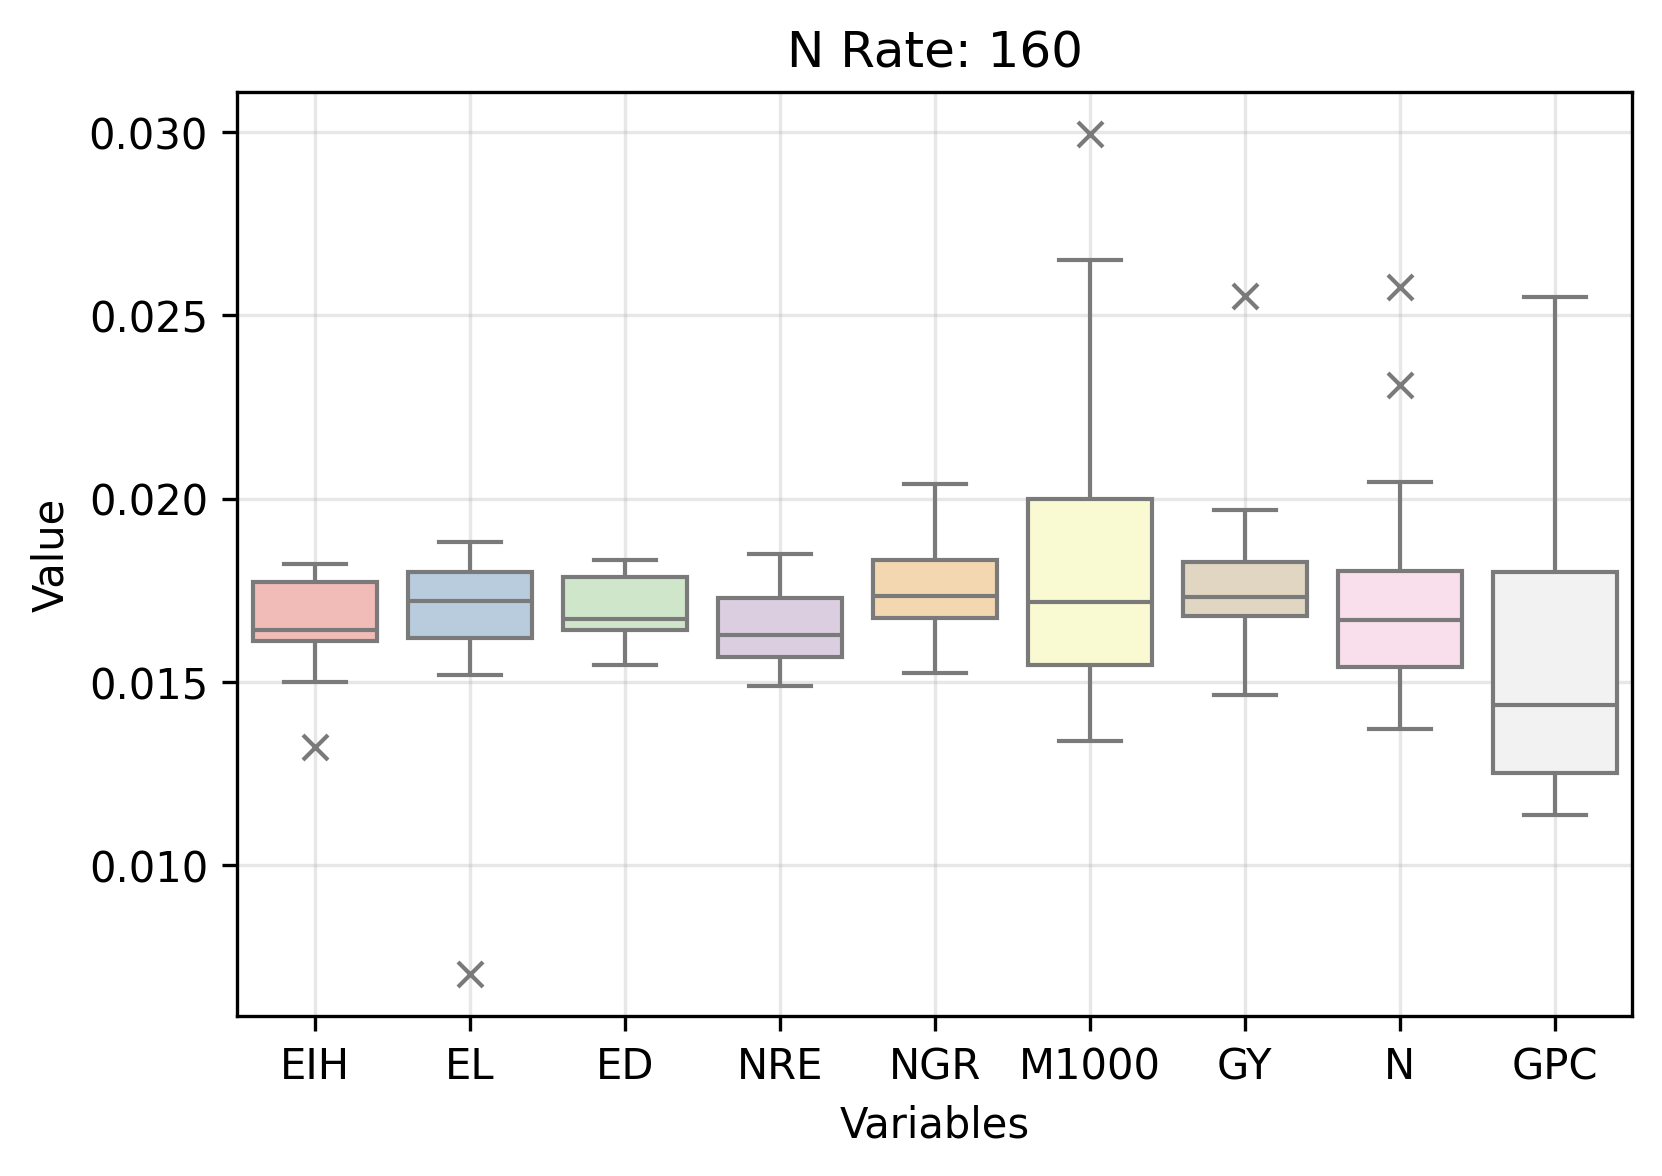

In [ ]:
print('UFMS 1')

# UFMS 1
df_ufms1__ = df_ufms1.copy()
df_ufms1__[Vars] = norm(df_ufms1[Vars])

for n_rate in N_rates:
    plt.figure(dpi=300, figsize=(6,4))
    sns.boxplot(data=df_ufms1__[df_ufms1__['N Rate'] == n_rate][Vars], palette="Pastel1", showcaps=True, flierprops={"marker": "x"})
    plt.grid(alpha=0.3)
    plt.xlabel('Variables')
    plt.ylabel('Value')
    plt.title('N Rate: ' + str(n_rate))


print('UFMS 2')

# UFMS2
df_ufms2__ = df_ufms2.copy()
df_ufms2__[Vars] = norm(df_ufms2[Vars])

for n_rate in N_rates:
    plt.figure(dpi=300, figsize=(6,4))
    sns.boxplot(data=df_ufms2__[df_ufms2__['N Rate'] == n_rate][Vars], palette="Pastel1", showcaps=True, flierprops={"marker": "x"})
    plt.grid(alpha=0.3)
    plt.xlabel('Variables')
    plt.ylabel('Value')
    plt.title('N Rate: ' + str(n_rate))

UFMS 1
UFMS 2


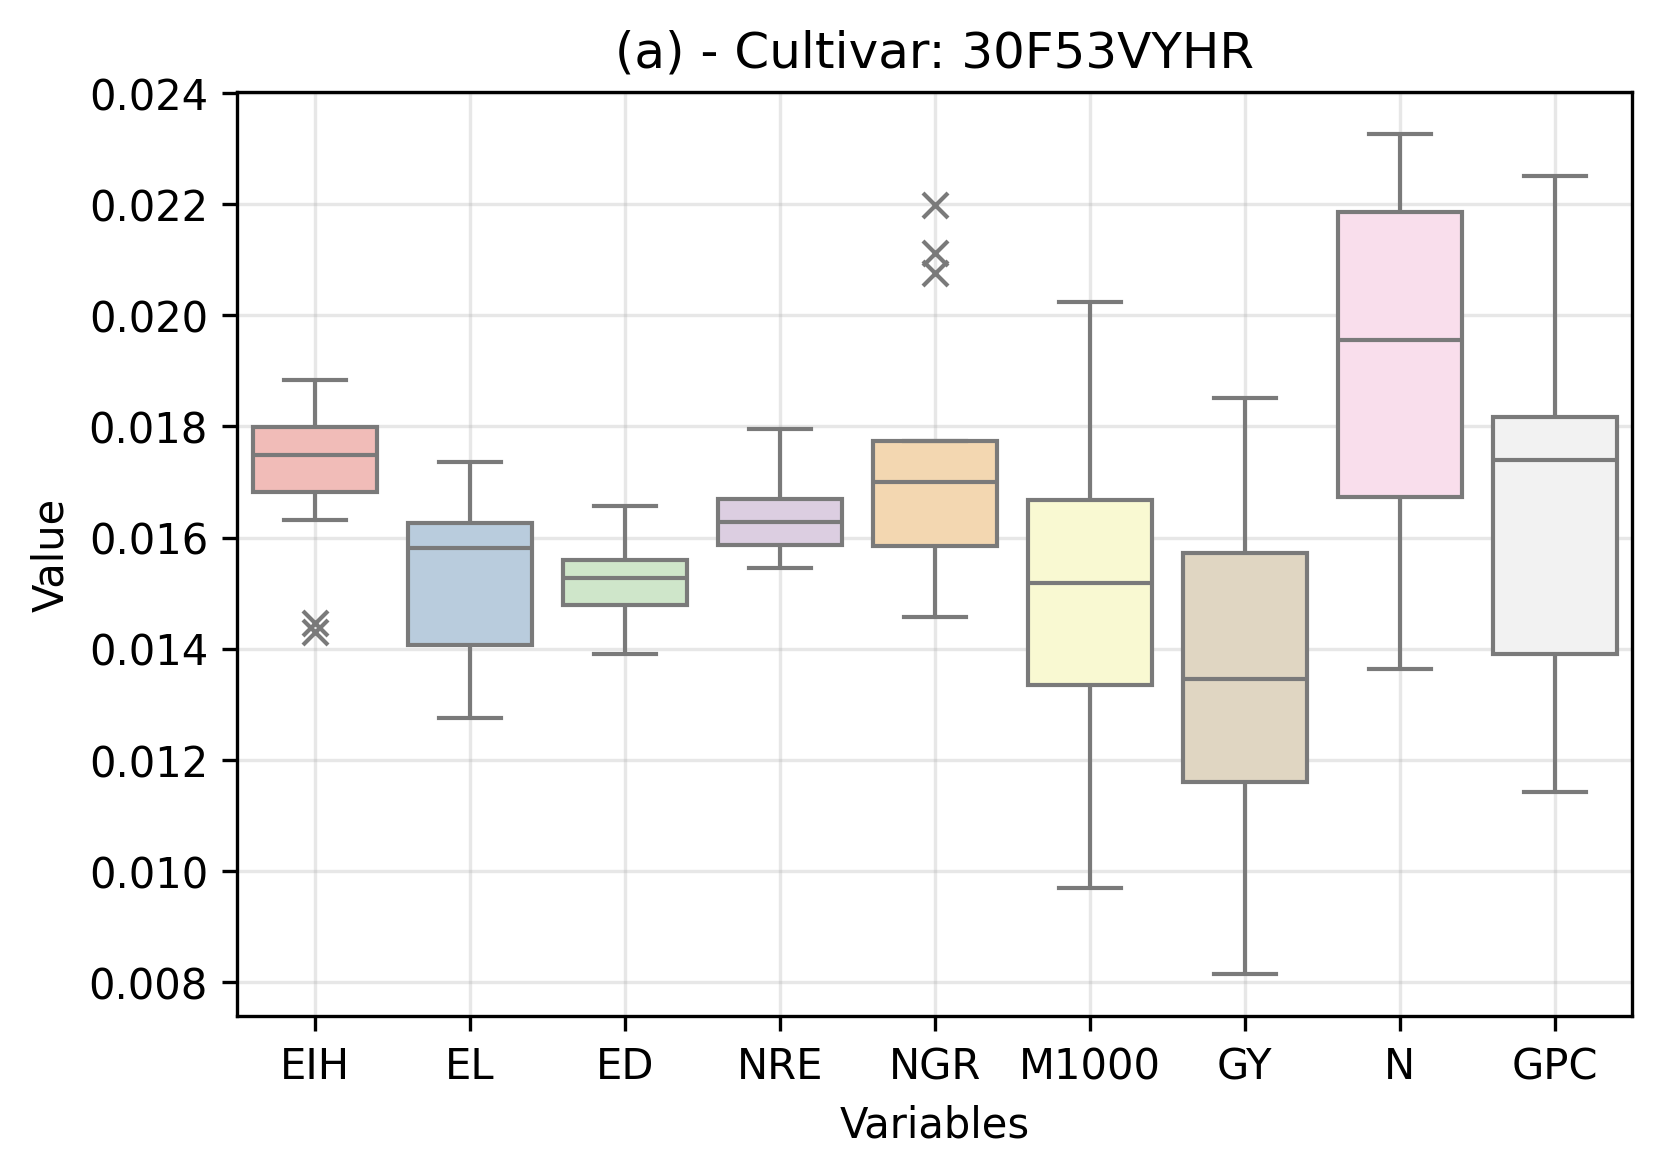

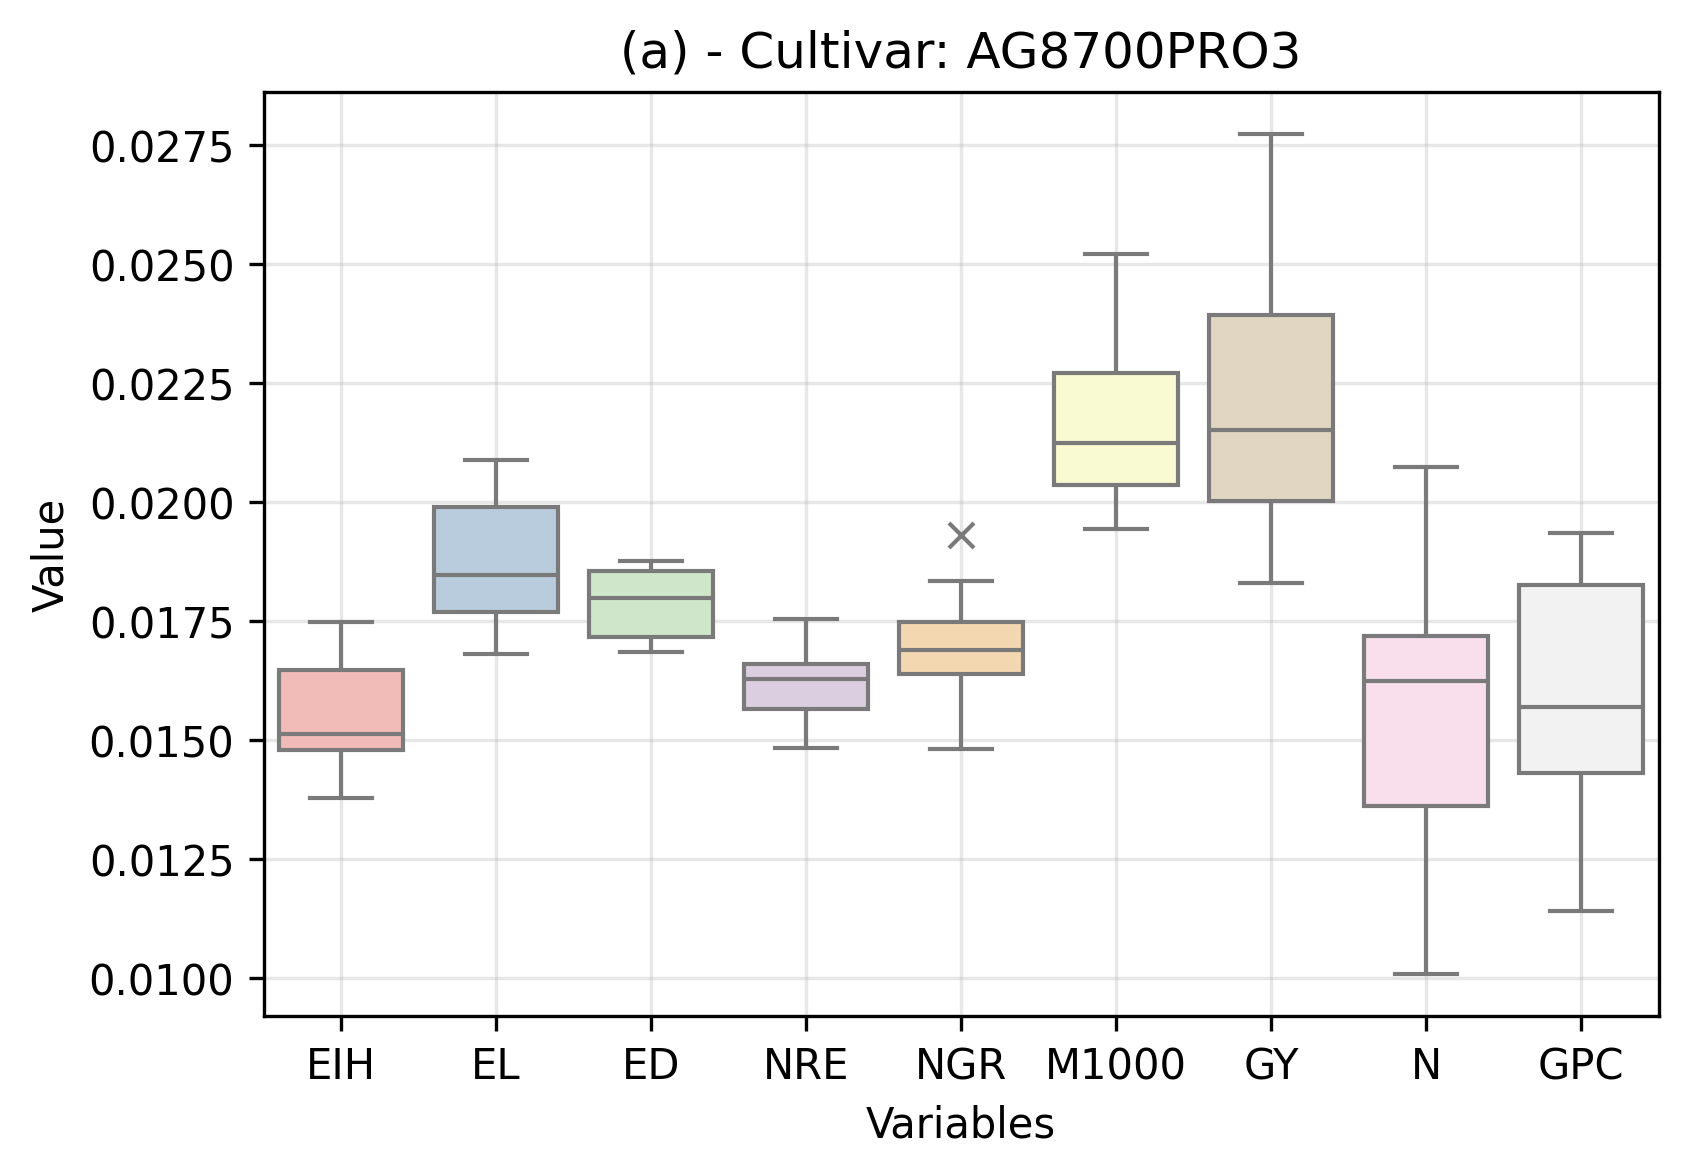

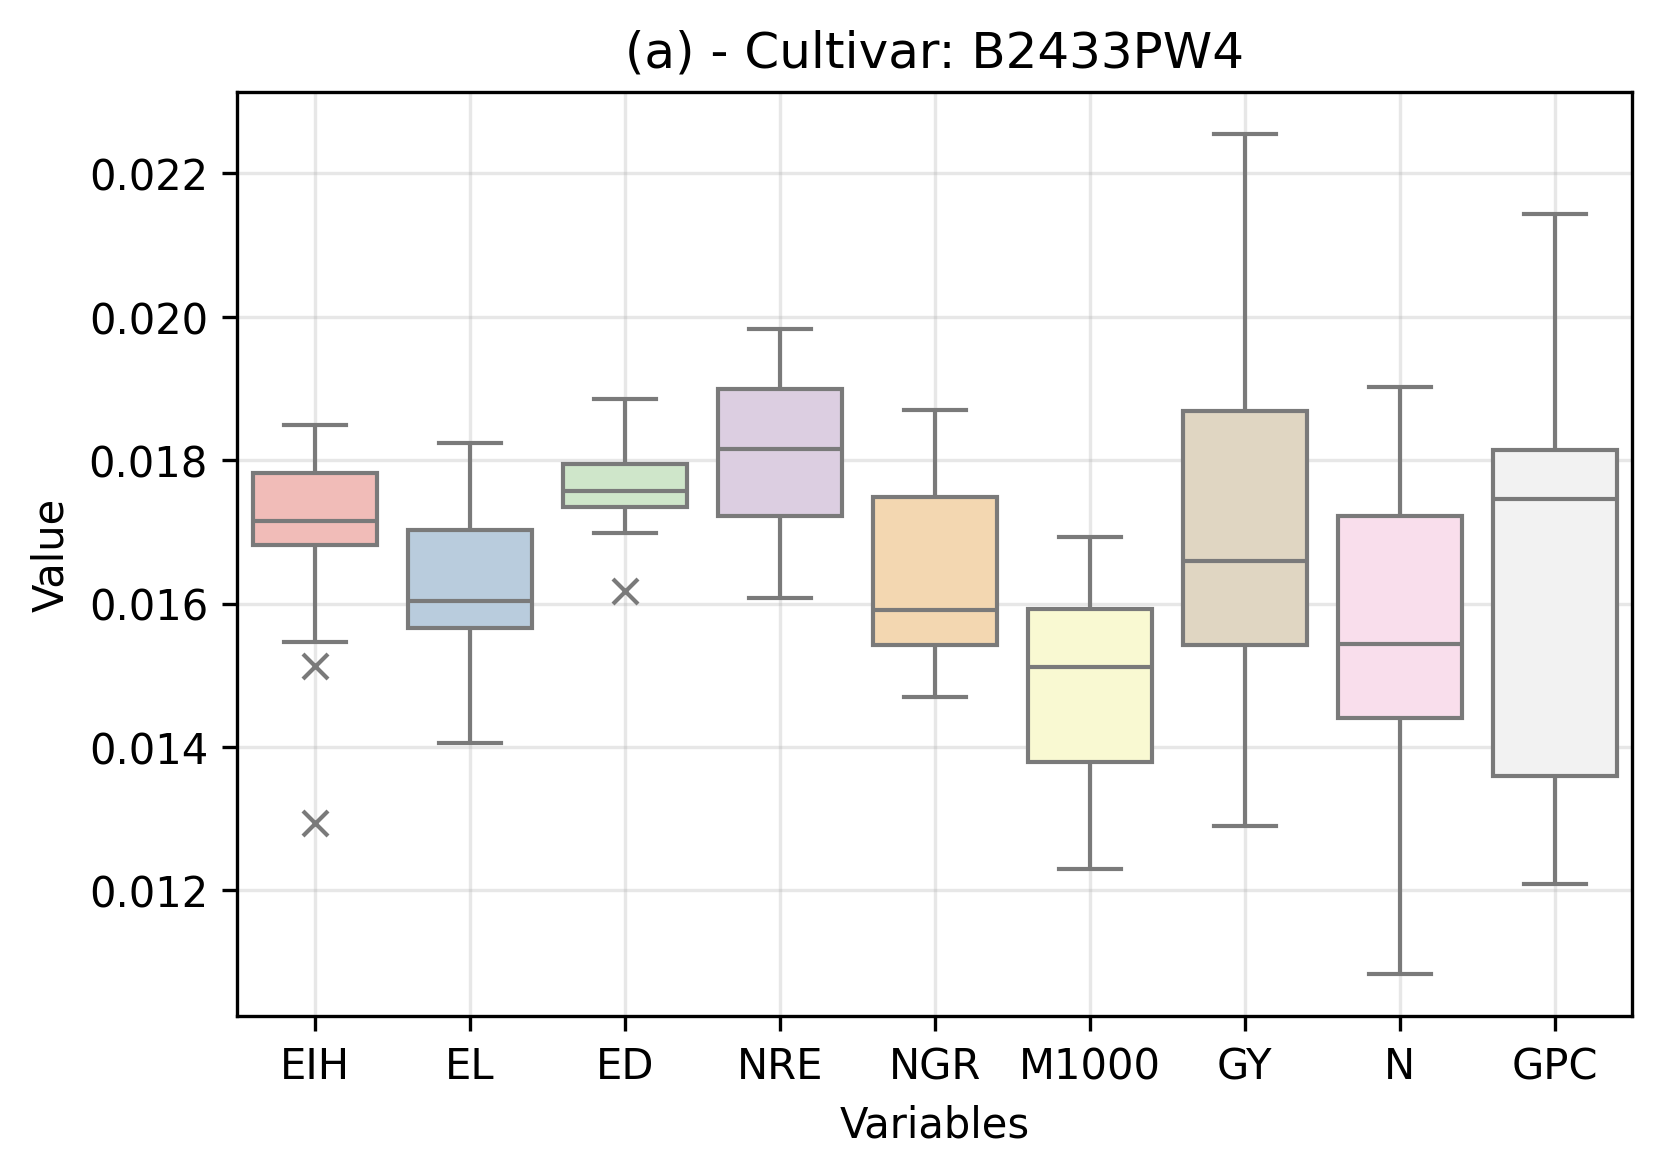

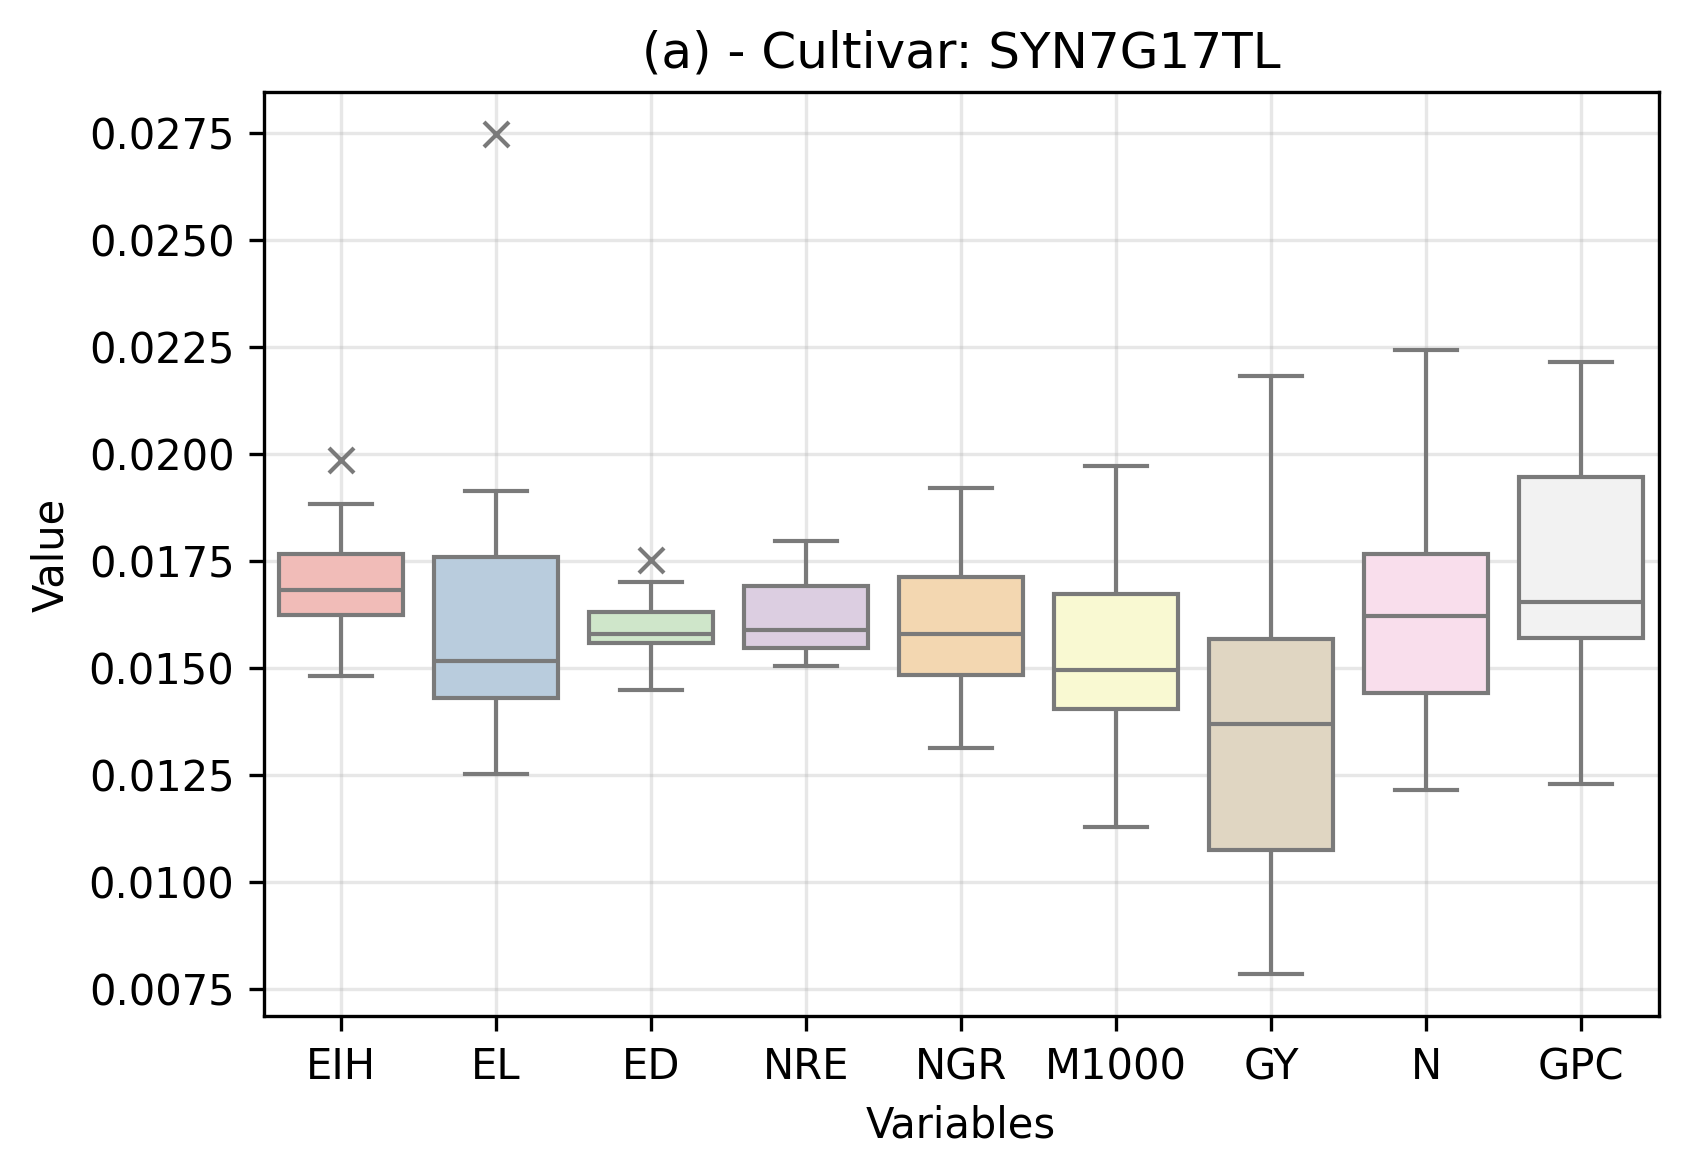

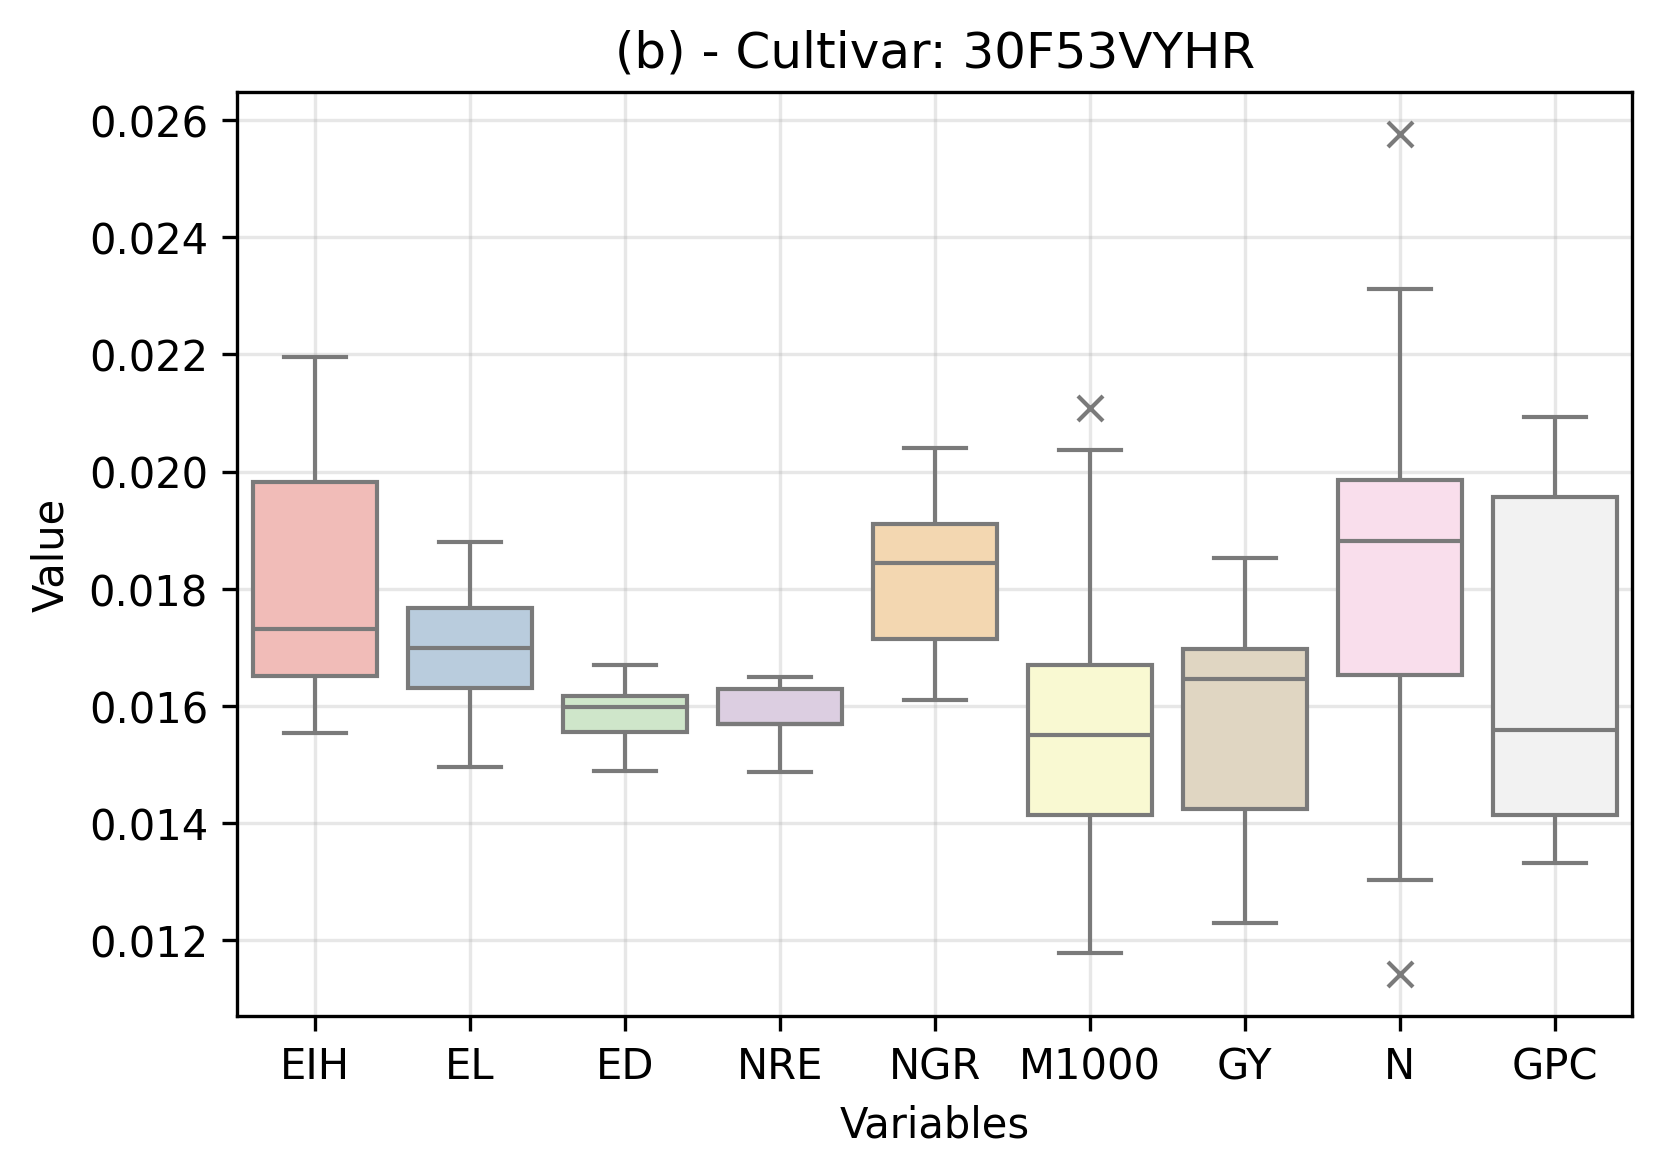

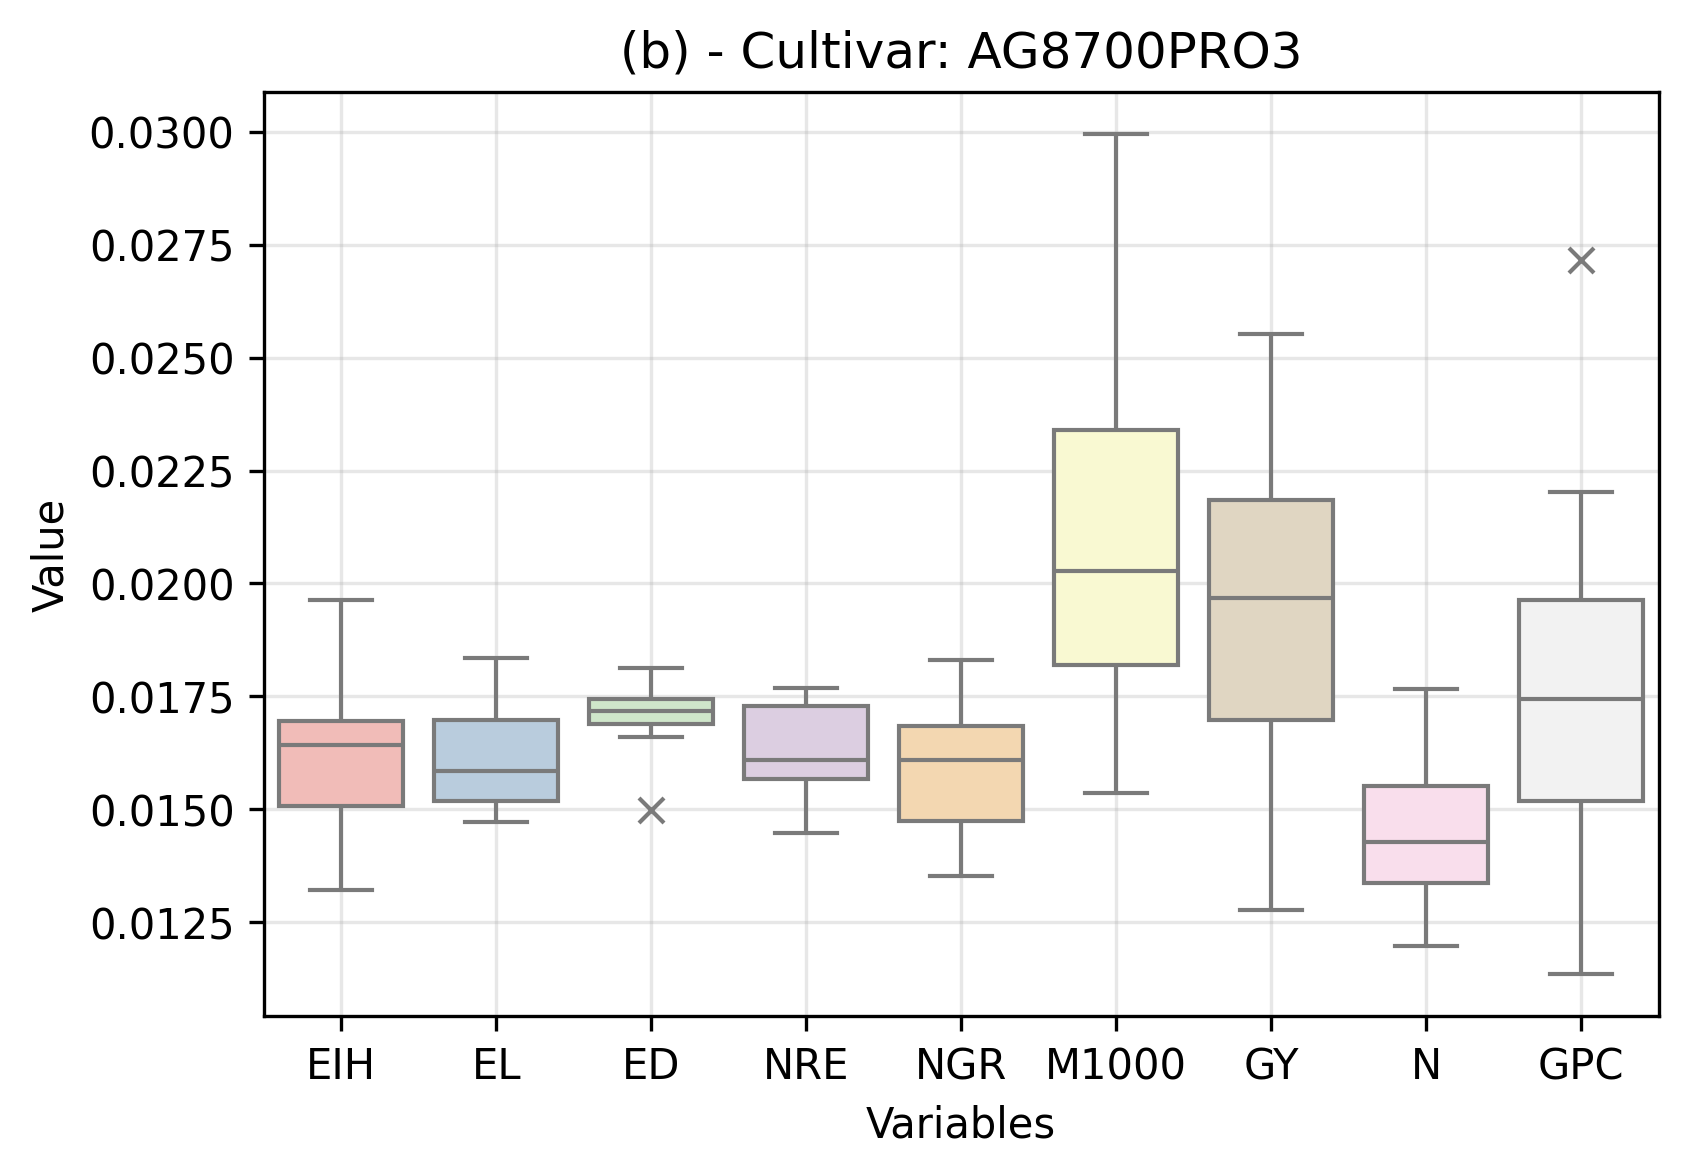

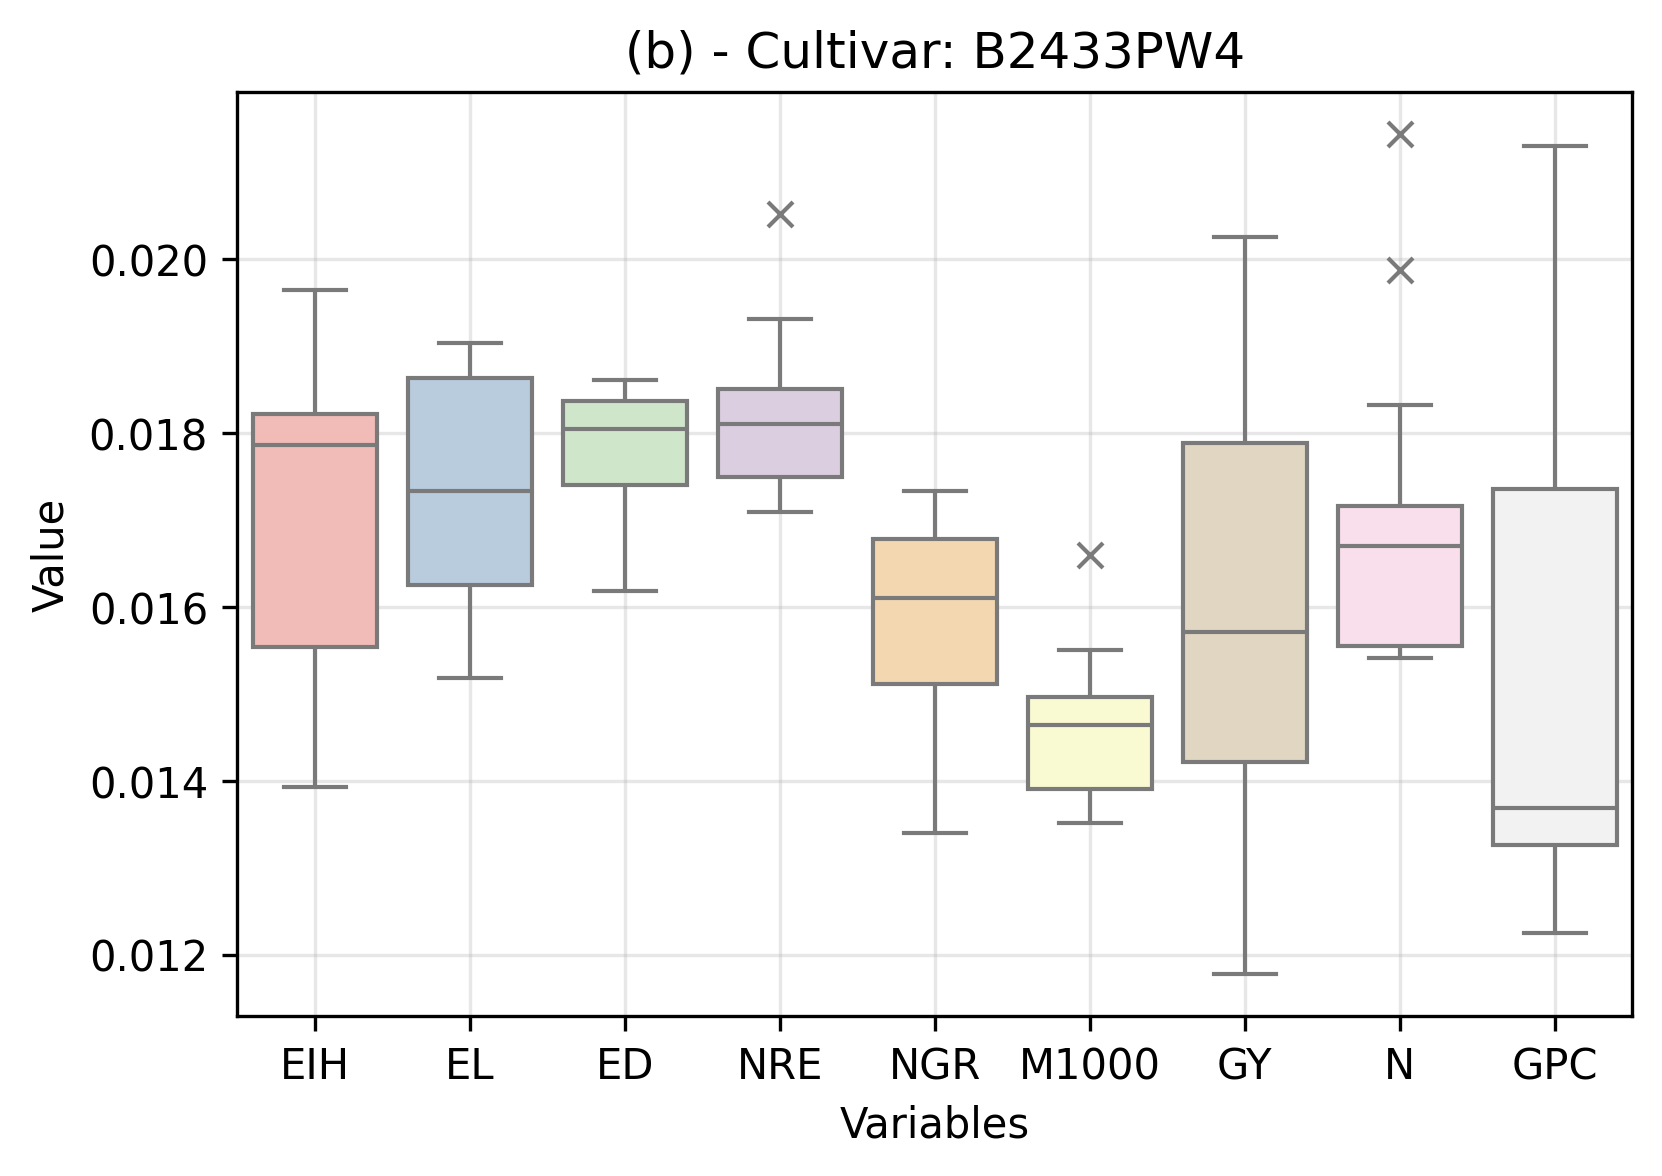

In [ ]:
print('UFMS 1')

# UFMS 1
df_ufms1__ = df_ufms1.copy()
df_ufms1__[Vars] = norm(df_ufms1[Vars])

for cultivar in cultivars:
    plt.figure(dpi=300, figsize=(6,4))
    sns.boxplot(data=df_ufms1__[df_ufms1__['Cultivar'] == cultivar][Vars], palette="Pastel1", showcaps=True, flierprops={"marker": "x"})
    plt.grid(alpha=0.3)
    plt.xlabel('Variables')
    plt.ylabel('Value')
    plt.title('(a) - Cultivar: ' + cultivar)


print('UFMS 2')

# UFMS2
df_ufms2__ = df_ufms2.copy()
df_ufms2__[Vars] = norm(df_ufms2[Vars])

for cultivar in cultivars:
    plt.figure(dpi=300, figsize=(6,4))
    sns.boxplot(data=df_ufms2__[df_ufms2__['Cultivar'] == cultivar][Vars], palette="Pastel1", showcaps=True, flierprops={"marker": "x"})
    plt.grid(alpha=0.3)
    plt.xlabel('Variables')
    plt.ylabel('Value')
    plt.title('(b) - Cultivar: ' + cultivar)

# Manhattan Distance

This approach will compare the distances of the control samples for those stressed.

In [ ]:
def dist(x, y):
    return distance.cityblock(x, y)

# Columns names
cols_dist_names = ['0/40','0/80', '0/120', '0/160']

#Store distance
distances_ufms1 = []
distances_ufms2 = []

for cultivar in cultivars:

    #UFMS1
    sel_nr0_ufms1 = np.array(df_nr0_ufms1[df_nr0_ufms1['Cultivar'] == cultivar])[0][1:]
    sel_nr40_ufms1 = np.array(df_nr40_ufms1[df_nr40_ufms1['Cultivar'] == cultivar])[0][1:]
    sel_nr80_ufms1 = np.array(df_nr80_ufms1[df_nr80_ufms1['Cultivar'] == cultivar])[0][1:]
    sel_nr120_ufms1 = np.array(df_nr120_ufms1[df_nr120_ufms1['Cultivar'] == cultivar])[0][1:]
    sel_nr160_ufms1 = np.array(df_nr160_ufms1[df_nr160_ufms1['Cultivar'] == cultivar])[0][1:]

    d0_40_ufms1 = dist(sel_nr0_ufms1, sel_nr40_ufms1)
    d0_80_ufms1 = dist(sel_nr0_ufms1, sel_nr80_ufms1)
    d0_120_ufms1 = dist(sel_nr0_ufms1, sel_nr120_ufms1)
    d0_160_ufms1 = dist(sel_nr0_ufms1, sel_nr160_ufms1)

    distances_ufms1.append([d0_40_ufms1, d0_80_ufms1, d0_120_ufms1, d0_160_ufms1])

    #UFMS2
    sel_nr0_ufms2 = np.array(df_nr0_ufms2[df_nr0_ufms2['Cultivar'] == cultivar])[0][1:]
    sel_nr40_ufms2 = np.array(df_nr40_ufms2[df_nr40_ufms2['Cultivar'] == cultivar])[0][1:]
    sel_nr80_ufms2 = np.array(df_nr80_ufms2[df_nr80_ufms2['Cultivar'] == cultivar])[0][1:]
    sel_nr120_ufms2 = np.array(df_nr120_ufms2[df_nr120_ufms2['Cultivar'] == cultivar])[0][1:]
    sel_nr160_ufms2 = np.array(df_nr160_ufms2[df_nr160_ufms2['Cultivar'] == cultivar])[0][1:]

    d0_40_ufms2 = dist(sel_nr0_ufms2, sel_nr40_ufms2)
    d0_80_ufms2 = dist(sel_nr0_ufms2, sel_nr80_ufms2)
    d0_120_ufms2 = dist(sel_nr0_ufms2, sel_nr120_ufms2)
    d0_160_ufms2 = dist(sel_nr0_ufms2, sel_nr160_ufms2)

    distances_ufms2.append([d0_40_ufms2, d0_80_ufms2, d0_120_ufms2, d0_160_ufms2])

#Convert to array and #normalize the distance
distances_ufms1 = np.array(distances_ufms1)
distances_ufms2 = np.array(distances_ufms2)

#Dataframe
print('Distances')
print('\nUFMS 1')
df_dist_ufms1 = pd.DataFrame(data=np.array([cultivars, distances_ufms1[:,0], distances_ufms1[:,1], distances_ufms1[:,2], distances_ufms1[:,3]]).T, columns=['Cultivar'] + cols_dist_names)
display(df_dist_ufms1)

print('\nUFMS 2')
df_dist_ufms2 = pd.DataFrame(data=np.array([cultivars, distances_ufms2[:,0], distances_ufms2[:,1], distances_ufms2[:,2], distances_ufms2[:,3]]).T, columns=['Cultivar'] + cols_dist_names)
display(df_dist_ufms2)

Distances

UFMS 1


Cultivar        0/40         0/80        0/120       0/160
0   30F53VYHR  192.233541    233.34575   953.846658  904.040808
1  AG8700PRO3   490.33673  1026.626875   411.442981  756.815071
2    B2433PW4  176.123636   494.908081   644.750615  484.220334
3   SYN7G17TL  429.673591   492.233479  1272.150971  1365.73618


UFMS 2


Cultivar        0/40         0/80       0/120        0/160
0   30F53VYHR  141.698306   143.175197  789.160637   798.241962
1  AG8700PRO3  502.811652  1068.337279  214.042045  1051.704176
2    B2433PW4  448.304394   453.196369   354.30683   559.559065
3   SYN7G17TL  341.943271   296.048622  752.300784   884.322874

In [ ]:
#Normalize the distances for best visualization
df_dist_ufms1[cols_dist_names] = norm(df_dist_ufms1[cols_dist_names])
df_dist_ufms2[cols_dist_names] = norm(df_dist_ufms2[cols_dist_names])

print('Normalized Distances')
print('\nUFMS 1')
print('UFMS 1')
display(df_dist_ufms1)

print('\nUFMS 2')
display(df_dist_ufms2)

Normalized Distances

UFMS 1
UFMS 1


Cultivar      0/40      0/80     0/120     0/160
0   30F53VYHR  0.149207  0.103842  0.290613  0.257502
1  AG8700PRO3  0.380588  0.456865  0.125356  0.215567
2    B2433PW4  0.136703  0.220242  0.196439  0.137923
3   SYN7G17TL  0.333502  0.219051  0.387592  0.389009


UFMS 2


Cultivar      0/40      0/80     0/120     0/160
0   30F53VYHR  0.098761   0.07302  0.374043  0.242345
1  AG8700PRO3  0.350451  0.544859  0.101451  0.319295
2    B2433PW4   0.31246  0.231133  0.167933  0.169881
3   SYN7G17TL  0.238328  0.150987  0.356573  0.268479

#TOPSIS

Apply TOPSIS method using the obtained distances as evaluation matrix

In [ ]:
import topsis

In [ ]:
#Apply TOPSIS

from topsis import topsis

decision_ufms1 = topsis(distances_ufms1, [0.25, 0.25, 0.25, 0.25], [1, 1, 1, 1])
decision_ufms1.calc()

print('Best cultivar UFMS1: ', cultivars[decision_ufms1.optimum_choice])

decision_ufms2 = topsis(distances_ufms2, [0.25, 0.25, 0.25, 0.25], [1, 1, 1, 1])
decision_ufms2.calc()

print('Best cultivar UFMS2: ', cultivars[decision_ufms2.optimum_choice])

Best cultivar UFMS1:  SYN7G17TL
Best cultivar UFMS2:  AG8700PRO3


In [ ]:
#Data with distances and similarities obtained by TOPSIS
print('Normalized Distances and TOPSIS score')
print('\nUFMS 1')
df_dist_score_ufms1 = df_dist_ufms1.copy()
df_dist_score_ufms1['TOPSIS Score'] = decision_ufms1.C
display(df_dist_score_ufms1)

print('\nUFMS 2')
df_dist_score_ufms2 = df_dist_ufms2.copy()
df_dist_score_ufms2['TOPSIS Score'] = decision_ufms2.C
display(df_dist_score_ufms2)

Normalized Distances and TOPSIS score

UFMS 1


Cultivar      0/40      0/80     0/120     0/160  TOPSIS Score
0   30F53VYHR  0.149207  0.103842  0.290613  0.257502      0.318183
1  AG8700PRO3  0.380588  0.456865  0.125356  0.215567      0.572226
2    B2433PW4  0.136703  0.220242  0.196439  0.137923      0.223743
3   SYN7G17TL  0.333502  0.219051  0.387592  0.389009      0.648218


UFMS 2


Cultivar      0/40      0/80     0/120     0/160  TOPSIS Score
0   30F53VYHR  0.098761   0.07302  0.374043  0.242345      0.360052
1  AG8700PRO3  0.350451  0.544859  0.101451  0.319295      0.657266
2    B2433PW4   0.31246  0.231133  0.167933  0.169881      0.411663
3   SYN7G17TL  0.238328  0.150987  0.356573  0.268479      0.458874

In [ ]:
#To generate a graph with the values
K = len(cultivars)

#UFMS1
data1_ufms1 = np.array([cultivars, df_dist_score_ufms1['0/40'], K*['0 and 40 kg/ha']]).T
data2_ufms1 = np.array([cultivars, df_dist_score_ufms1['0/80'], K*['0 and 80 kg/ha']]).T
data3_ufms1 = np.array([cultivars, df_dist_score_ufms1['0/120'], K*['0 and 120 kg/ha']]).T
data4_ufms1 = np.array([cultivars, df_dist_score_ufms1['0/160'], K*['0 and 160 kg/ha']]).T
data5_ufms1 = np.array([cultivars, decision_ufms1.C    , K*['TOPSIS score']]).T

df1_ufms1 = pd.DataFrame(data=data1_ufms1, columns=['Cultivar','Measure','Value'])
df2_ufms1 = pd.DataFrame(data=data2_ufms1, columns=['Cultivar','Measure','Value'])
df3_ufms1 = pd.DataFrame(data=data3_ufms1, columns=['Cultivar','Measure','Value'])
df4_ufms1 = pd.DataFrame(data=data4_ufms1, columns=['Cultivar','Measure','Value'])
df5_ufms1 = pd.DataFrame(data=data5_ufms1, columns=['Cultivar','Measure','Value'])

df_ufms1_plot = pd.concat([df1_ufms1, df2_ufms1, df3_ufms1, df4_ufms1, df5_ufms1])

#UFMS2
data1_ufms2 = np.array([cultivars, df_dist_score_ufms2['0/40'], K*['0 and 40 kg/ha']]).T
data2_ufms2 = np.array([cultivars, df_dist_score_ufms2['0/80'], K*['0 and 80 kg/ha']]).T
data3_ufms2 = np.array([cultivars, df_dist_score_ufms2['0/120'], K*['0 and 120 kg/ha']]).T
data4_ufms2 = np.array([cultivars, df_dist_score_ufms2['0/160'], K*['0 and 160 kg/ha']]).T
data5_ufms2 = np.array([cultivars, decision_ufms2.C    , K*['TOPSIS score']]).T

df1_ufms2 = pd.DataFrame(data=data1_ufms2, columns=['Cultivar','Measure','Value'])
df2_ufms2 = pd.DataFrame(data=data2_ufms2, columns=['Cultivar','Measure','Value'])
df3_ufms2 = pd.DataFrame(data=data3_ufms2, columns=['Cultivar','Measure','Value'])
df4_ufms2 = pd.DataFrame(data=data4_ufms2, columns=['Cultivar','Measure','Value'])
df5_ufms2 = pd.DataFrame(data=data5_ufms2, columns=['Cultivar','Measure','Value'])

df_ufms2_plot = pd.concat([df1_ufms2, df2_ufms2, df3_ufms2, df4_ufms2, df5_ufms2])

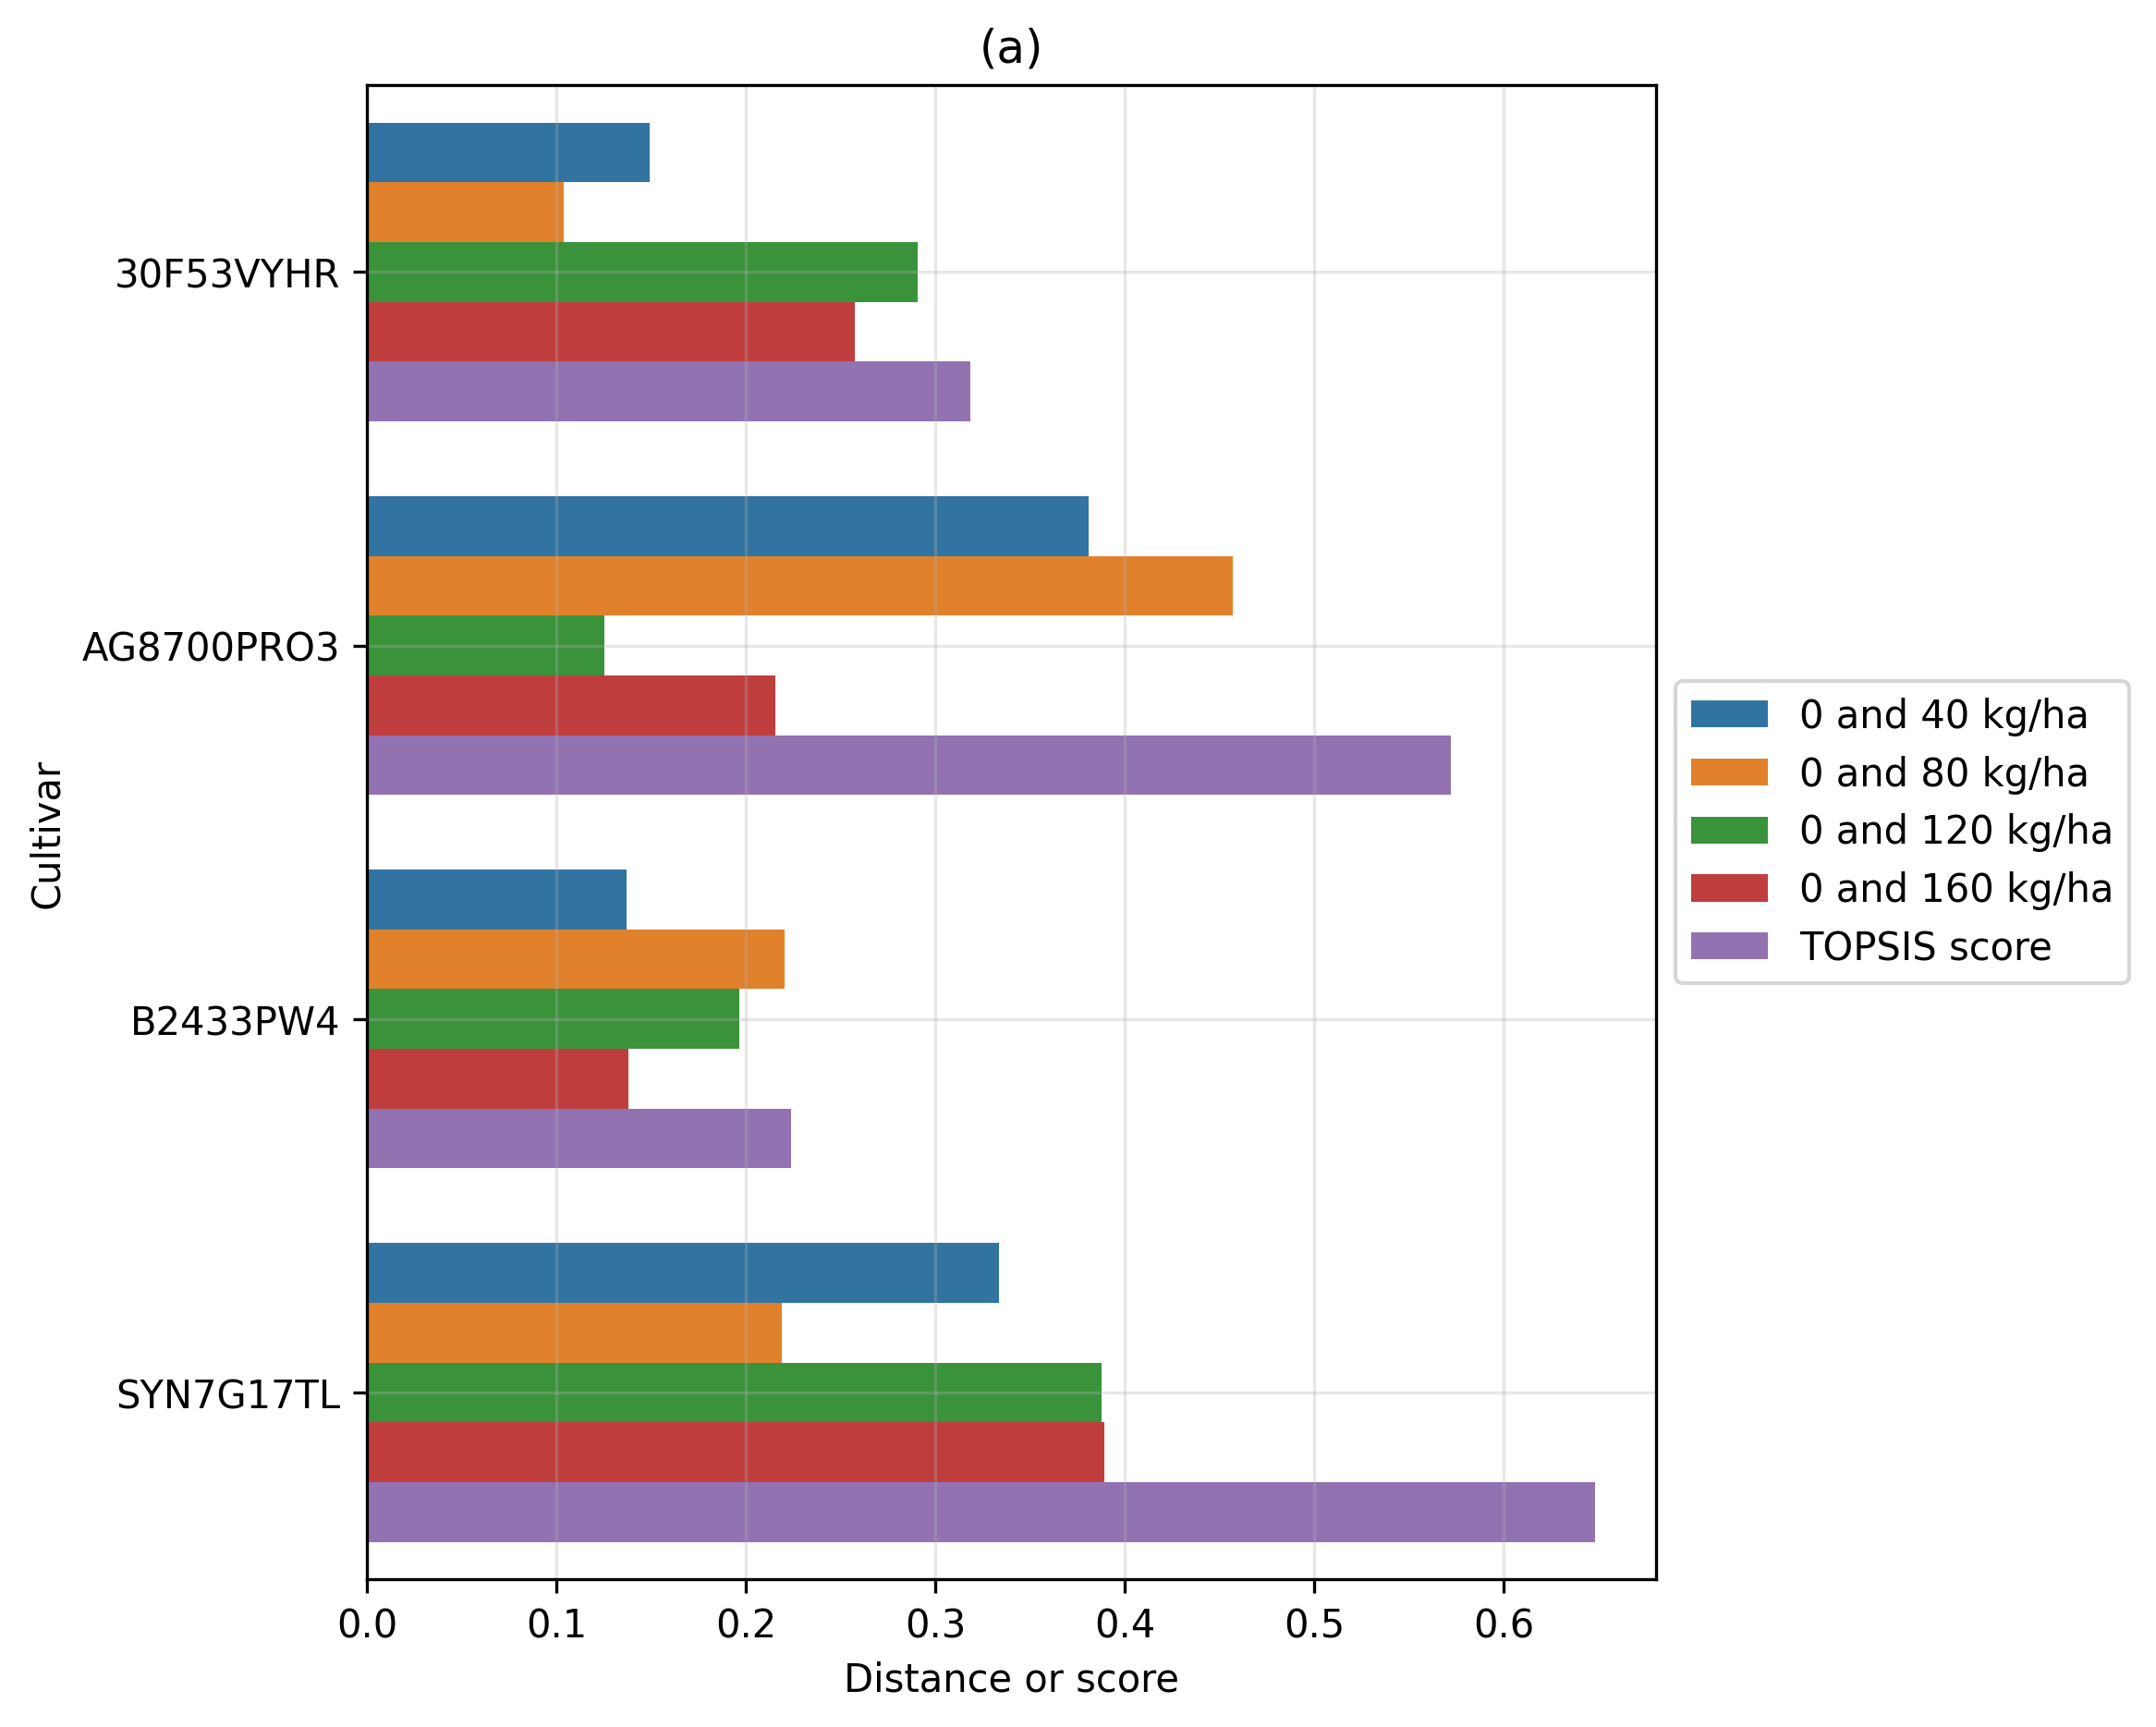

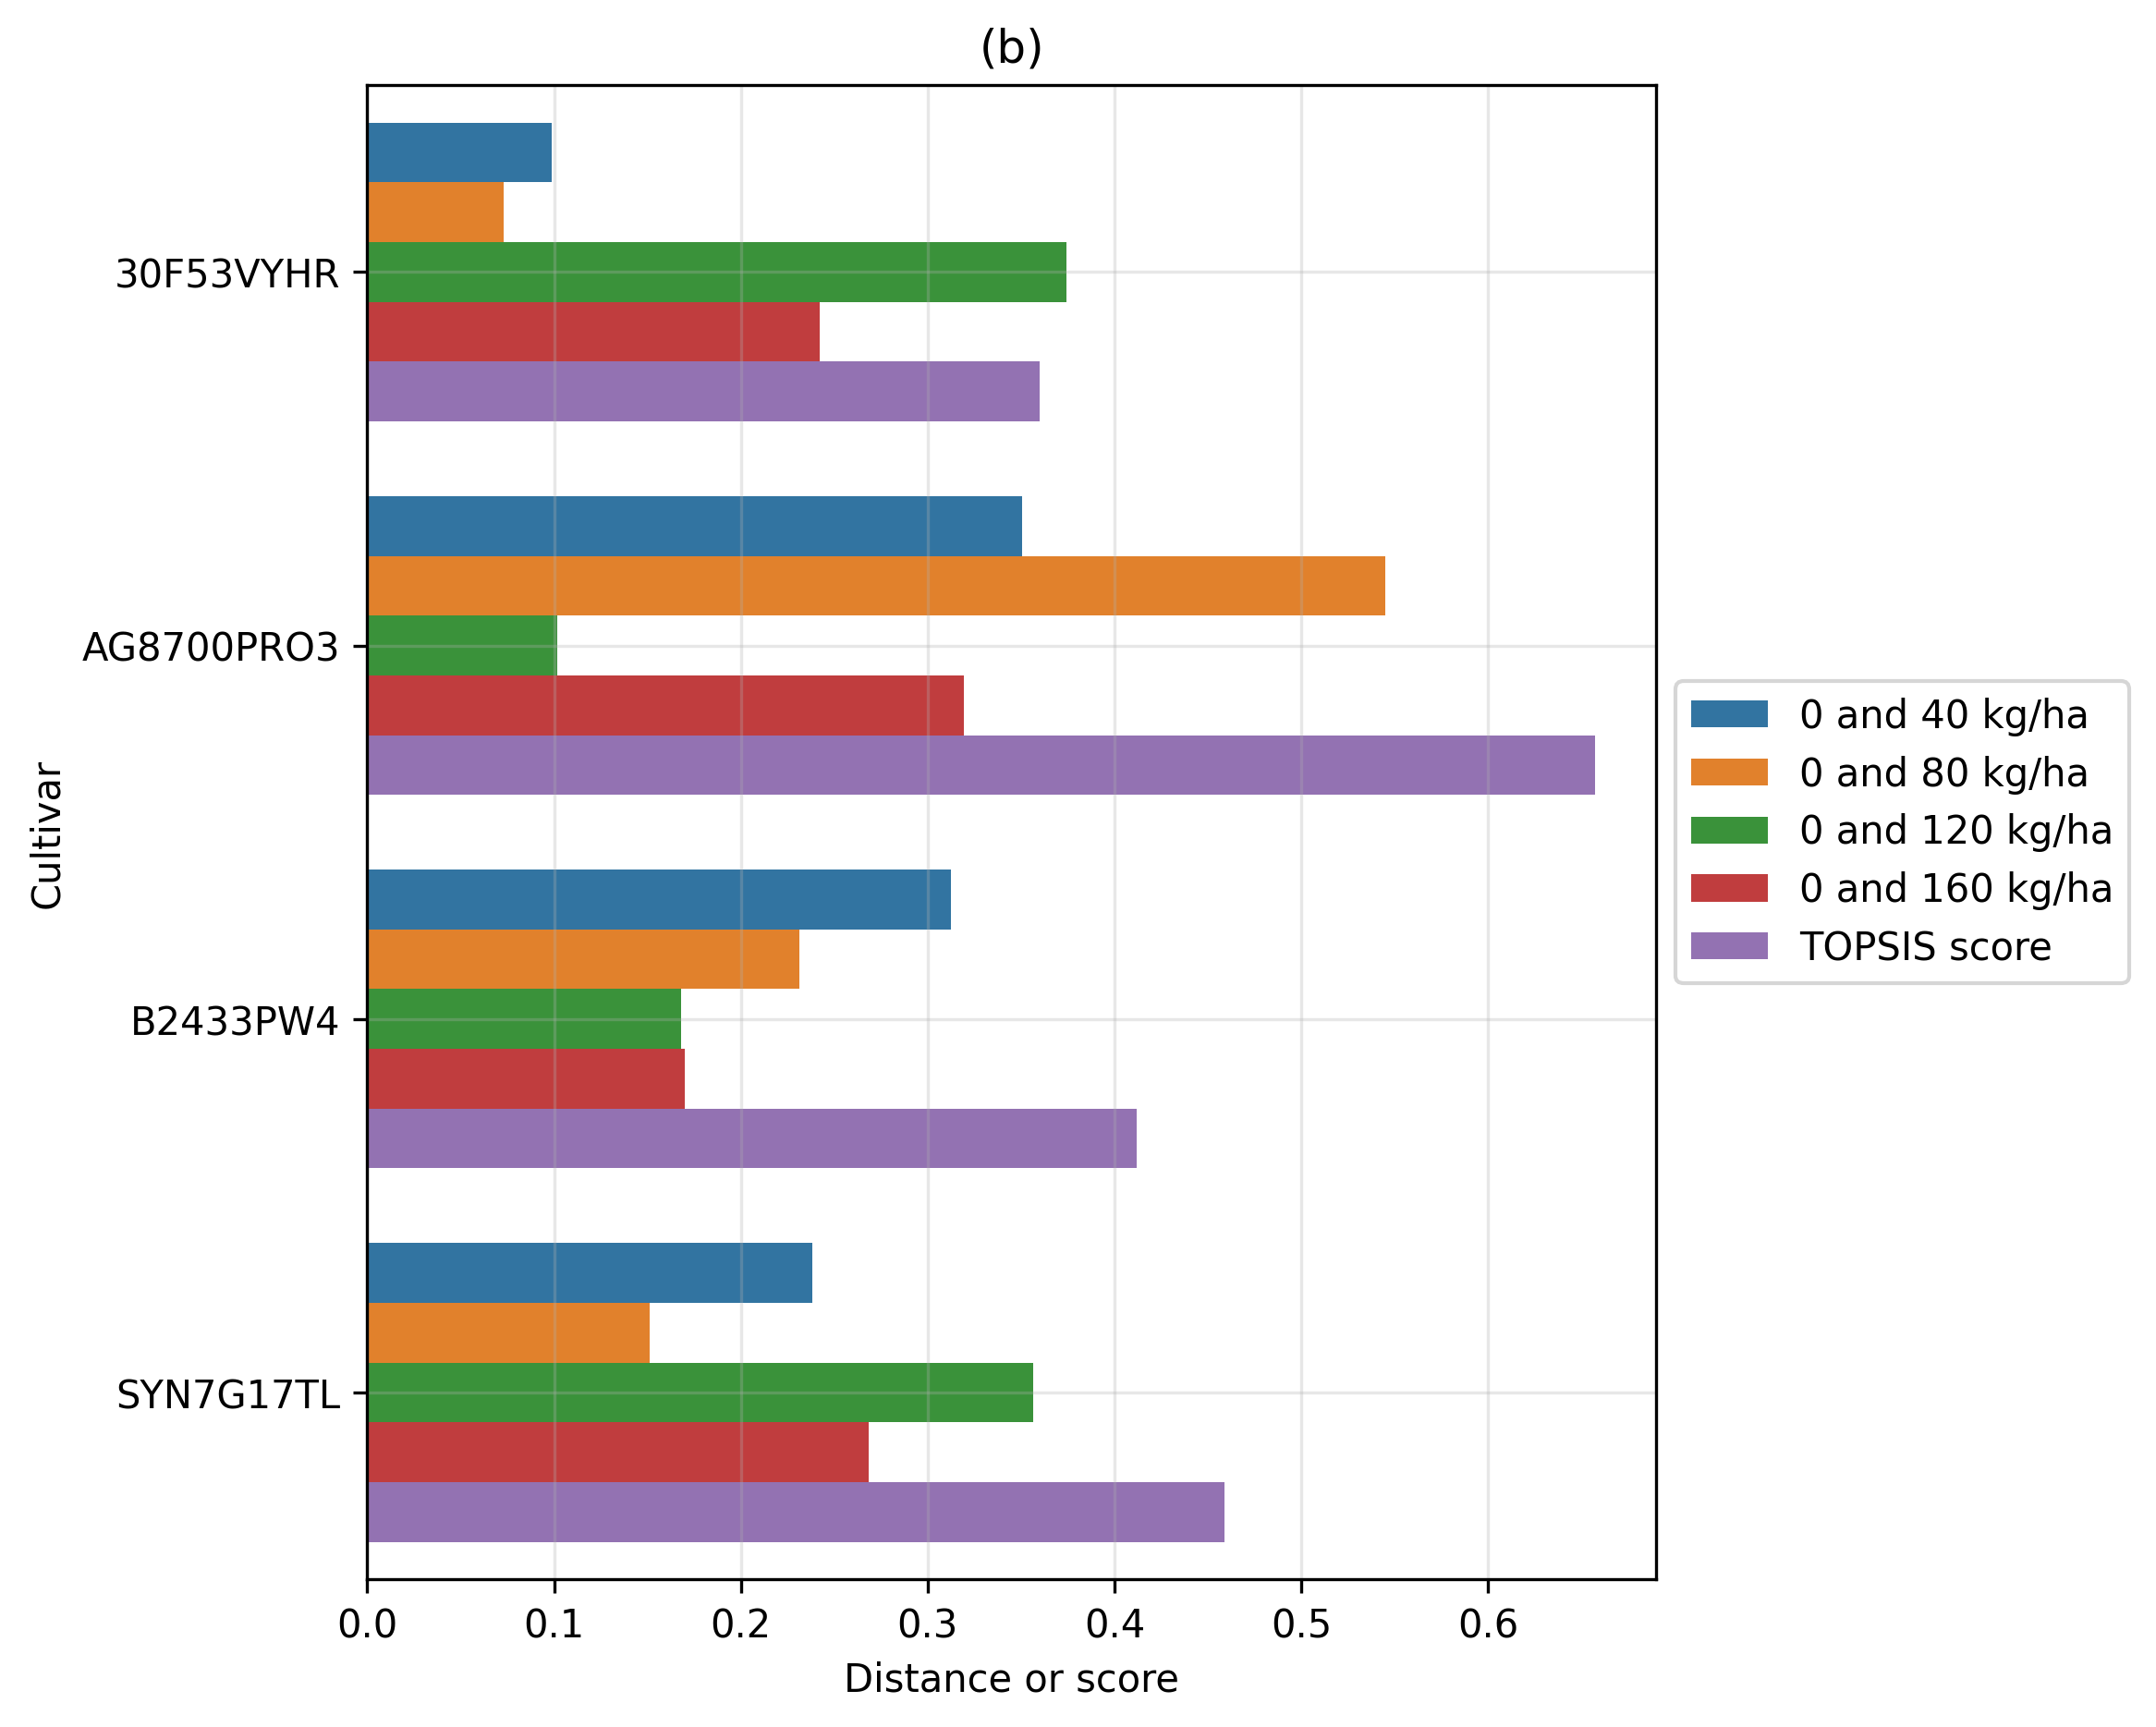

In [ ]:
#Bar chart with all values
plt.figure(dpi=300, figsize=(6,7))
sns.barplot(x='Measure', y='Cultivar', hue='Value', data=df_ufms1_plot)
plt.grid(alpha=0.3)
plt.ylabel('Cultivar')
plt.xlabel('Distance or score')
plt.title('(a)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.figure(dpi=300, figsize=(6,7))
sns.barplot(x='Measure', y='Cultivar', hue='Value', data=df_ufms2_plot)
plt.grid(alpha=0.3)
plt.ylabel('Cultivar')
plt.xlabel('Distance or score')
plt.title('(b)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
# Results with weight variations

#UFMS1
decisions_ufms1 = []

for i in range(0, 1000):
    numbers = [np.random.uniform(0, 1) for _ in range(4)]
    numbers = numbers / np.linalg.norm(numbers, 1)

    decision_ufms1 = topsis(distances_ufms1, numbers, [1, 1, 1, 1])
    decision_ufms1.calc()

    decisions_ufms1.append(decision_ufms1.C)

df_weigths_ufms1 = pd.DataFrame(data=decisions_ufms1, columns=cultivars)

#UFMS2
decisions_ufms2 = []

for i in range(0, 1000):
    numbers = [np.random.uniform(0, 1) for _ in range(4)]
    numbers = numbers / np.linalg.norm(numbers, 1)

    decision_ufms2 = topsis(distances_ufms2, numbers, [1, 1, 1, 1])
    decision_ufms2.calc()

    decisions_ufms2.append(decision_ufms2.C)

df_weigths_ufms2 = pd.DataFrame(data=decisions_ufms2, columns=cultivars)

Text(0.5, 1.0, '(b)')

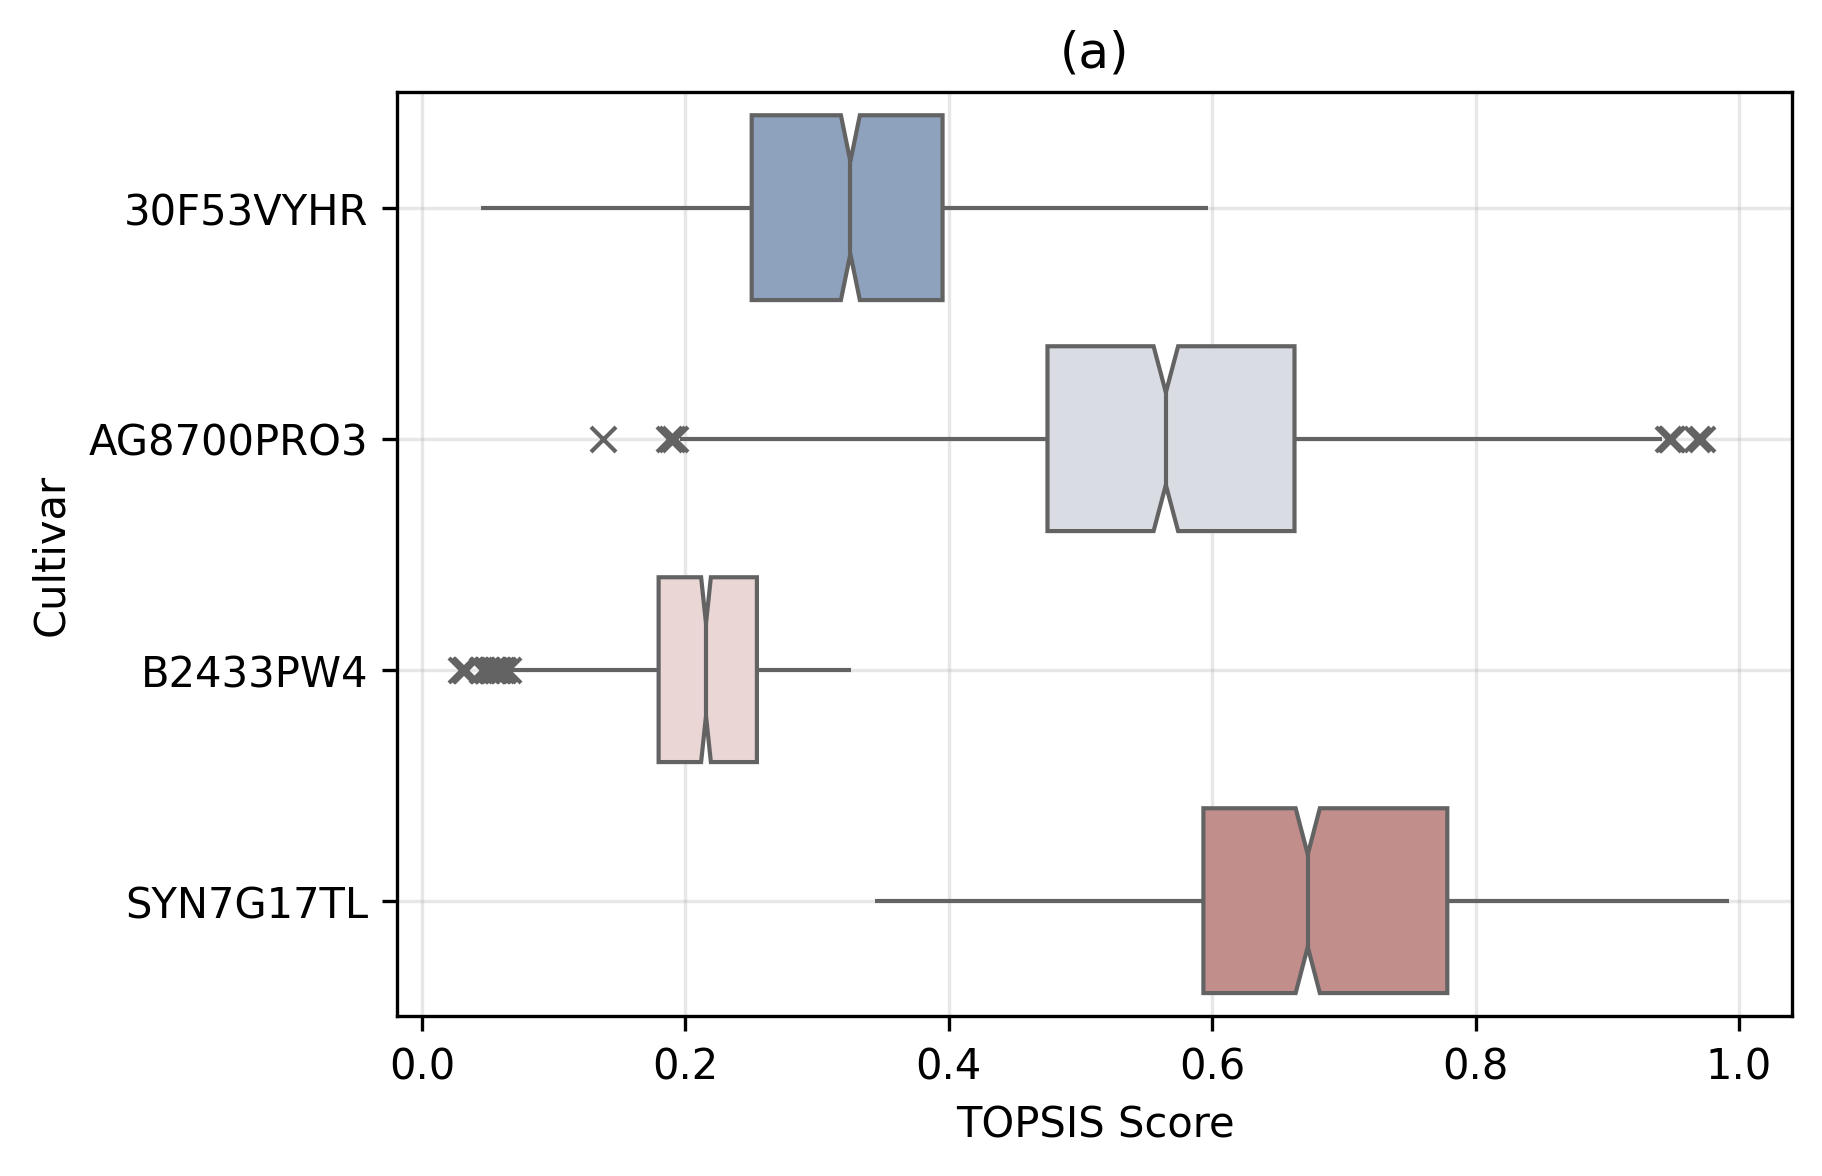

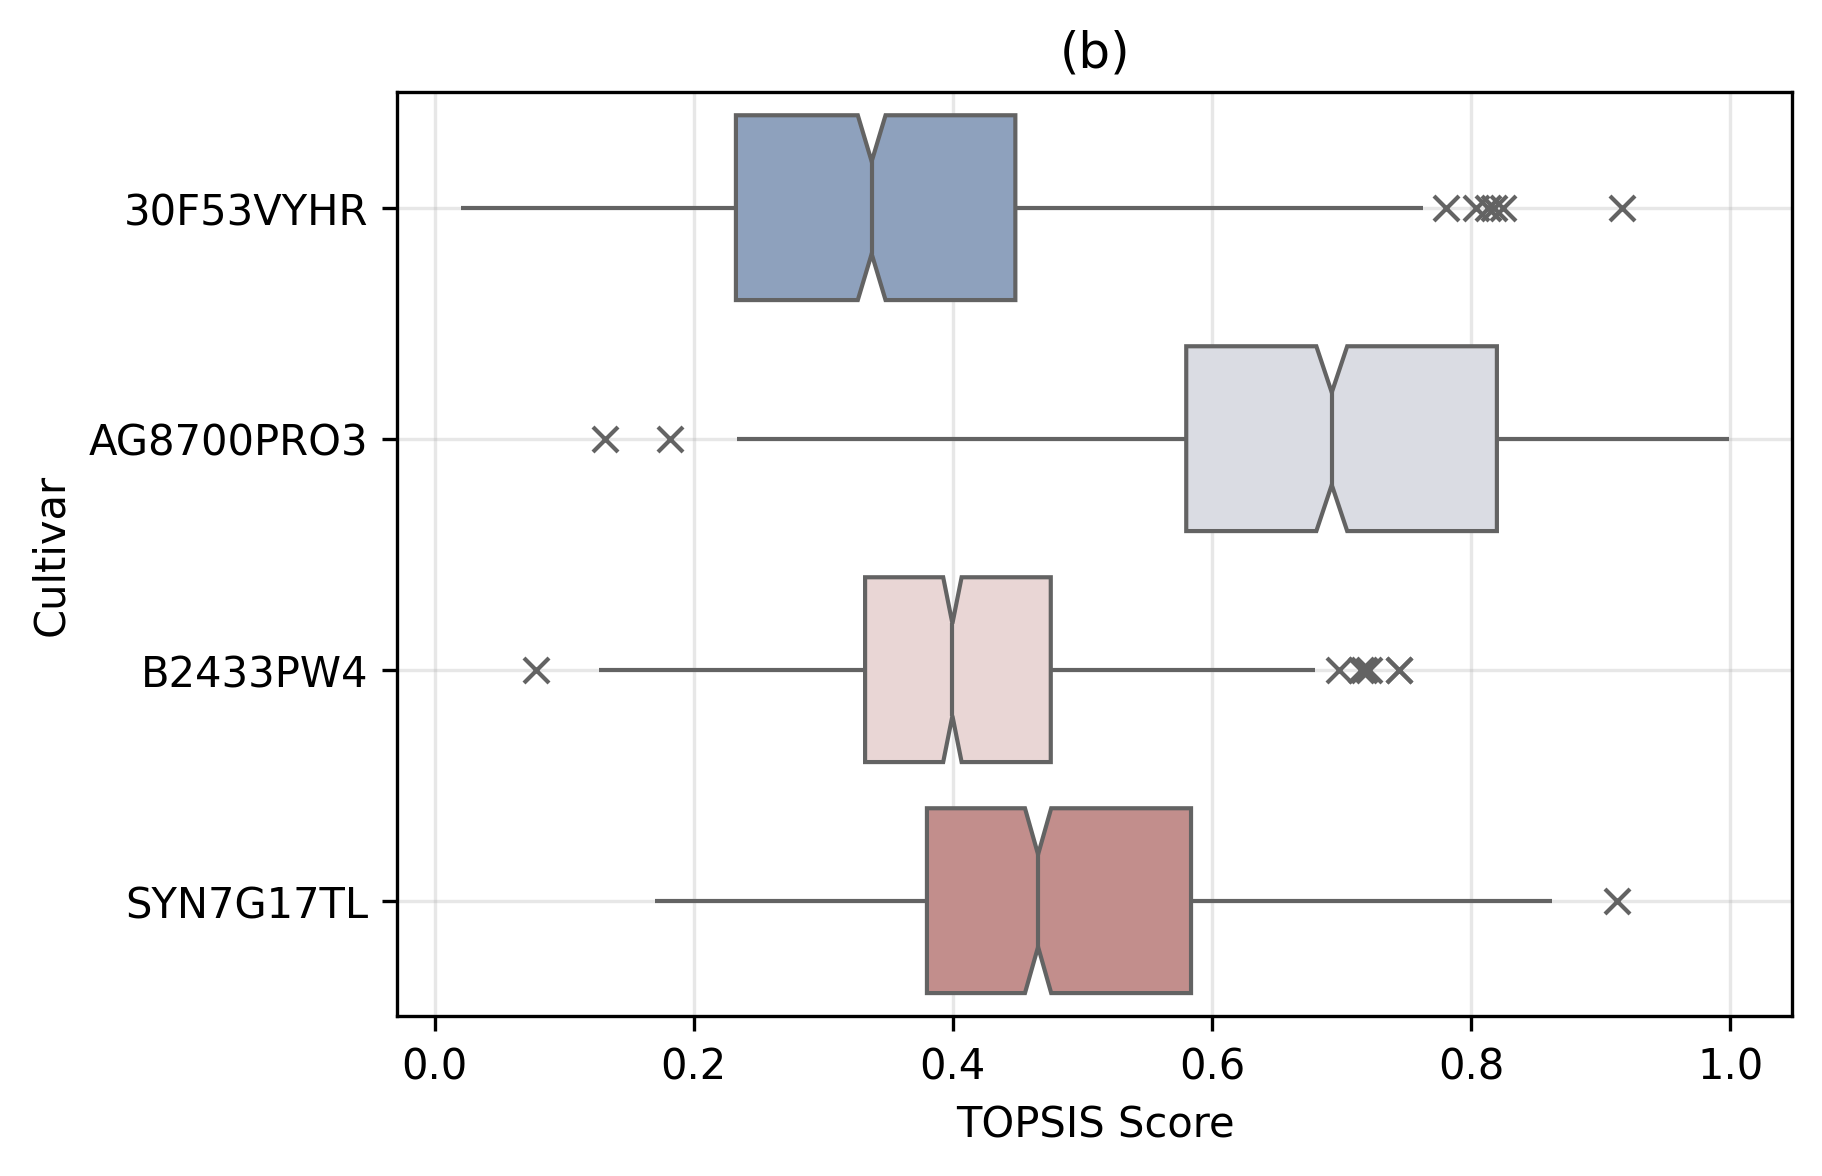

In [ ]:
#Boxplot with weigths variation

plt.figure(dpi=300, figsize=(6,4))
sns.boxplot(data=df_weigths_ufms1, palette="vlag", orient='h', notch=True, showcaps=False, flierprops={"marker": "x"})
plt.grid(alpha=0.3)
plt.xlabel('TOPSIS Score')
plt.ylabel('Cultivar')
plt.title('(a)')

plt.figure(dpi=300, figsize=(6,4))
sns.boxplot(data=df_weigths_ufms2, palette="vlag", orient='h', notch=True, showcaps=False, flierprops={"marker": "x"})
plt.grid(alpha=0.3)
plt.xlabel('TOPSIS Score')
plt.ylabel('Cultivar')
plt.title('(b)')

#Selection of cultivars regardless of area

Select cultivars regardless of sowing area.

In [ ]:
# General data
df_nr0   = df[df['N Rate'] == 0]
df_nr40  = df[df['N Rate'] == 40]
df_nr80  = df[df['N Rate'] == 80]
df_nr120 = df[df['N Rate'] == 120]
df_nr160 = df[df['N Rate'] == 160]

df_nr0   = df_nr0.groupby(['Cultivar'], as_index=False).mean(numeric_only=True)
df_nr40  = df_nr40.groupby(['Cultivar'], as_index=False).mean(numeric_only=True)
df_nr80  = df_nr80.groupby(['Cultivar'], as_index=False).mean(numeric_only=True)
df_nr120 = df_nr120.groupby(['Cultivar'], as_index=False).mean(numeric_only=True)
df_nr160 = df_nr160.groupby(['Cultivar'], as_index=False).mean(numeric_only=True)

#Store distance
distances = []

for cultivar in cultivars:

    sel_nr0   = np.array(df_nr0[df_nr0['Cultivar'] == cultivar])[0][1:]
    sel_nr40  = np.array(df_nr40[df_nr40['Cultivar'] == cultivar])[0][1:]
    sel_nr80  = np.array(df_nr80[df_nr80['Cultivar'] == cultivar])[0][1:]
    sel_nr120 = np.array(df_nr120[df_nr120['Cultivar'] == cultivar])[0][1:]
    sel_nr160 = np.array(df_nr160[df_nr160['Cultivar'] == cultivar])[0][1:]

    d0_40 = dist(sel_nr0, sel_nr40)
    d0_80 = dist(sel_nr0, sel_nr80)
    d0_120 = dist(sel_nr0, sel_nr120)
    d0_160 = dist(sel_nr0, sel_nr160)

    distances.append([d0_40, d0_80, d0_120, d0_160])

#Convert to array and #normalize the distance
distances = np.array(distances)

#Dataframe
print('Distances')
df_dist = pd.DataFrame(data=np.array([cultivars, distances[:,0], distances[:,1], distances[:,2], distances[:,3]]).T, columns=['Cultivar'] + cols_dist_names)
display(df_dist)

Distances


Cultivar        0/40         0/80       0/120       0/160
0   30F53VYHR  160.952233   143.596949  215.433577  237.691074
1  AG8700PRO3  492.174191  1038.473861  301.149005  899.358553
2    B2433PW4  194.258366   470.567191  486.229364  228.461218
3   SYN7G17TL   94.846452   383.210584  414.950835   421.71979

In [ ]:
#Normalize the distances for best visualization
df_dist[cols_dist_names] = norm(df_dist[cols_dist_names])

print('Normalized Distances')
display(df_dist)


Normalized Distances


Cultivar      0/40      0/80     0/120     0/160
0   30F53VYHR   0.17082  0.070534  0.151953  0.132994
1  AG8700PRO3   0.52235  0.510094  0.212411  0.503213
2    B2433PW4  0.206168  0.231141  0.342955   0.12783
3   SYN7G17TL  0.100662  0.188231   0.29268  0.235963

In [ ]:
#TOPSIS
decision = topsis(distances, [0.25, 0.25, 0.25, 0.25], [1, 1, 1, 1])
decision.calc()

In [ ]:
#Data with distances and similarities obtained by TOPSIS
print('Normalized Distances and TOPSIS score')
df_dist_score = df_dist.copy()
df_dist_score['TOPSIS Score'] = decision.C
display(df_dist_score)

Normalized Distances and TOPSIS score


Cultivar      0/40      0/80     0/120     0/160  TOPSIS Score
0   30F53VYHR   0.17082  0.070534  0.151953  0.132994      0.089959
1  AG8700PRO3   0.52235  0.510094  0.212411  0.503213      0.828817
2    B2433PW4  0.206168  0.231141  0.342955   0.12783      0.338341
3   SYN7G17TL  0.100662  0.188231   0.29268  0.235963      0.275430

In [ ]:
#To generate a graph with the values
K = len(cultivars)

data1 = np.array([cultivars, df_dist_score['0/40'], K*['0 and 40 kg/ha']]).T
data2 = np.array([cultivars, df_dist_score['0/80'], K*['0 and 80 kg/ha']]).T
data3 = np.array([cultivars, df_dist_score['0/120'], K*['0 and 120 kg/ha']]).T
data4 = np.array([cultivars, df_dist_score['0/160'], K*['0 and 160 kg/ha']]).T
data5 = np.array([cultivars, decision.C    , K*['TOPSIS score']]).T

df1 = pd.DataFrame(data=data1, columns=['Cultivar','Measure','Value'])
df2 = pd.DataFrame(data=data2, columns=['Cultivar','Measure','Value'])
df3 = pd.DataFrame(data=data3, columns=['Cultivar','Measure','Value'])
df4 = pd.DataFrame(data=data4, columns=['Cultivar','Measure','Value'])
df5 = pd.DataFrame(data=data5, columns=['Cultivar','Measure','Value'])

df_plot = pd.concat([df1, df2, df3, df4, df5])

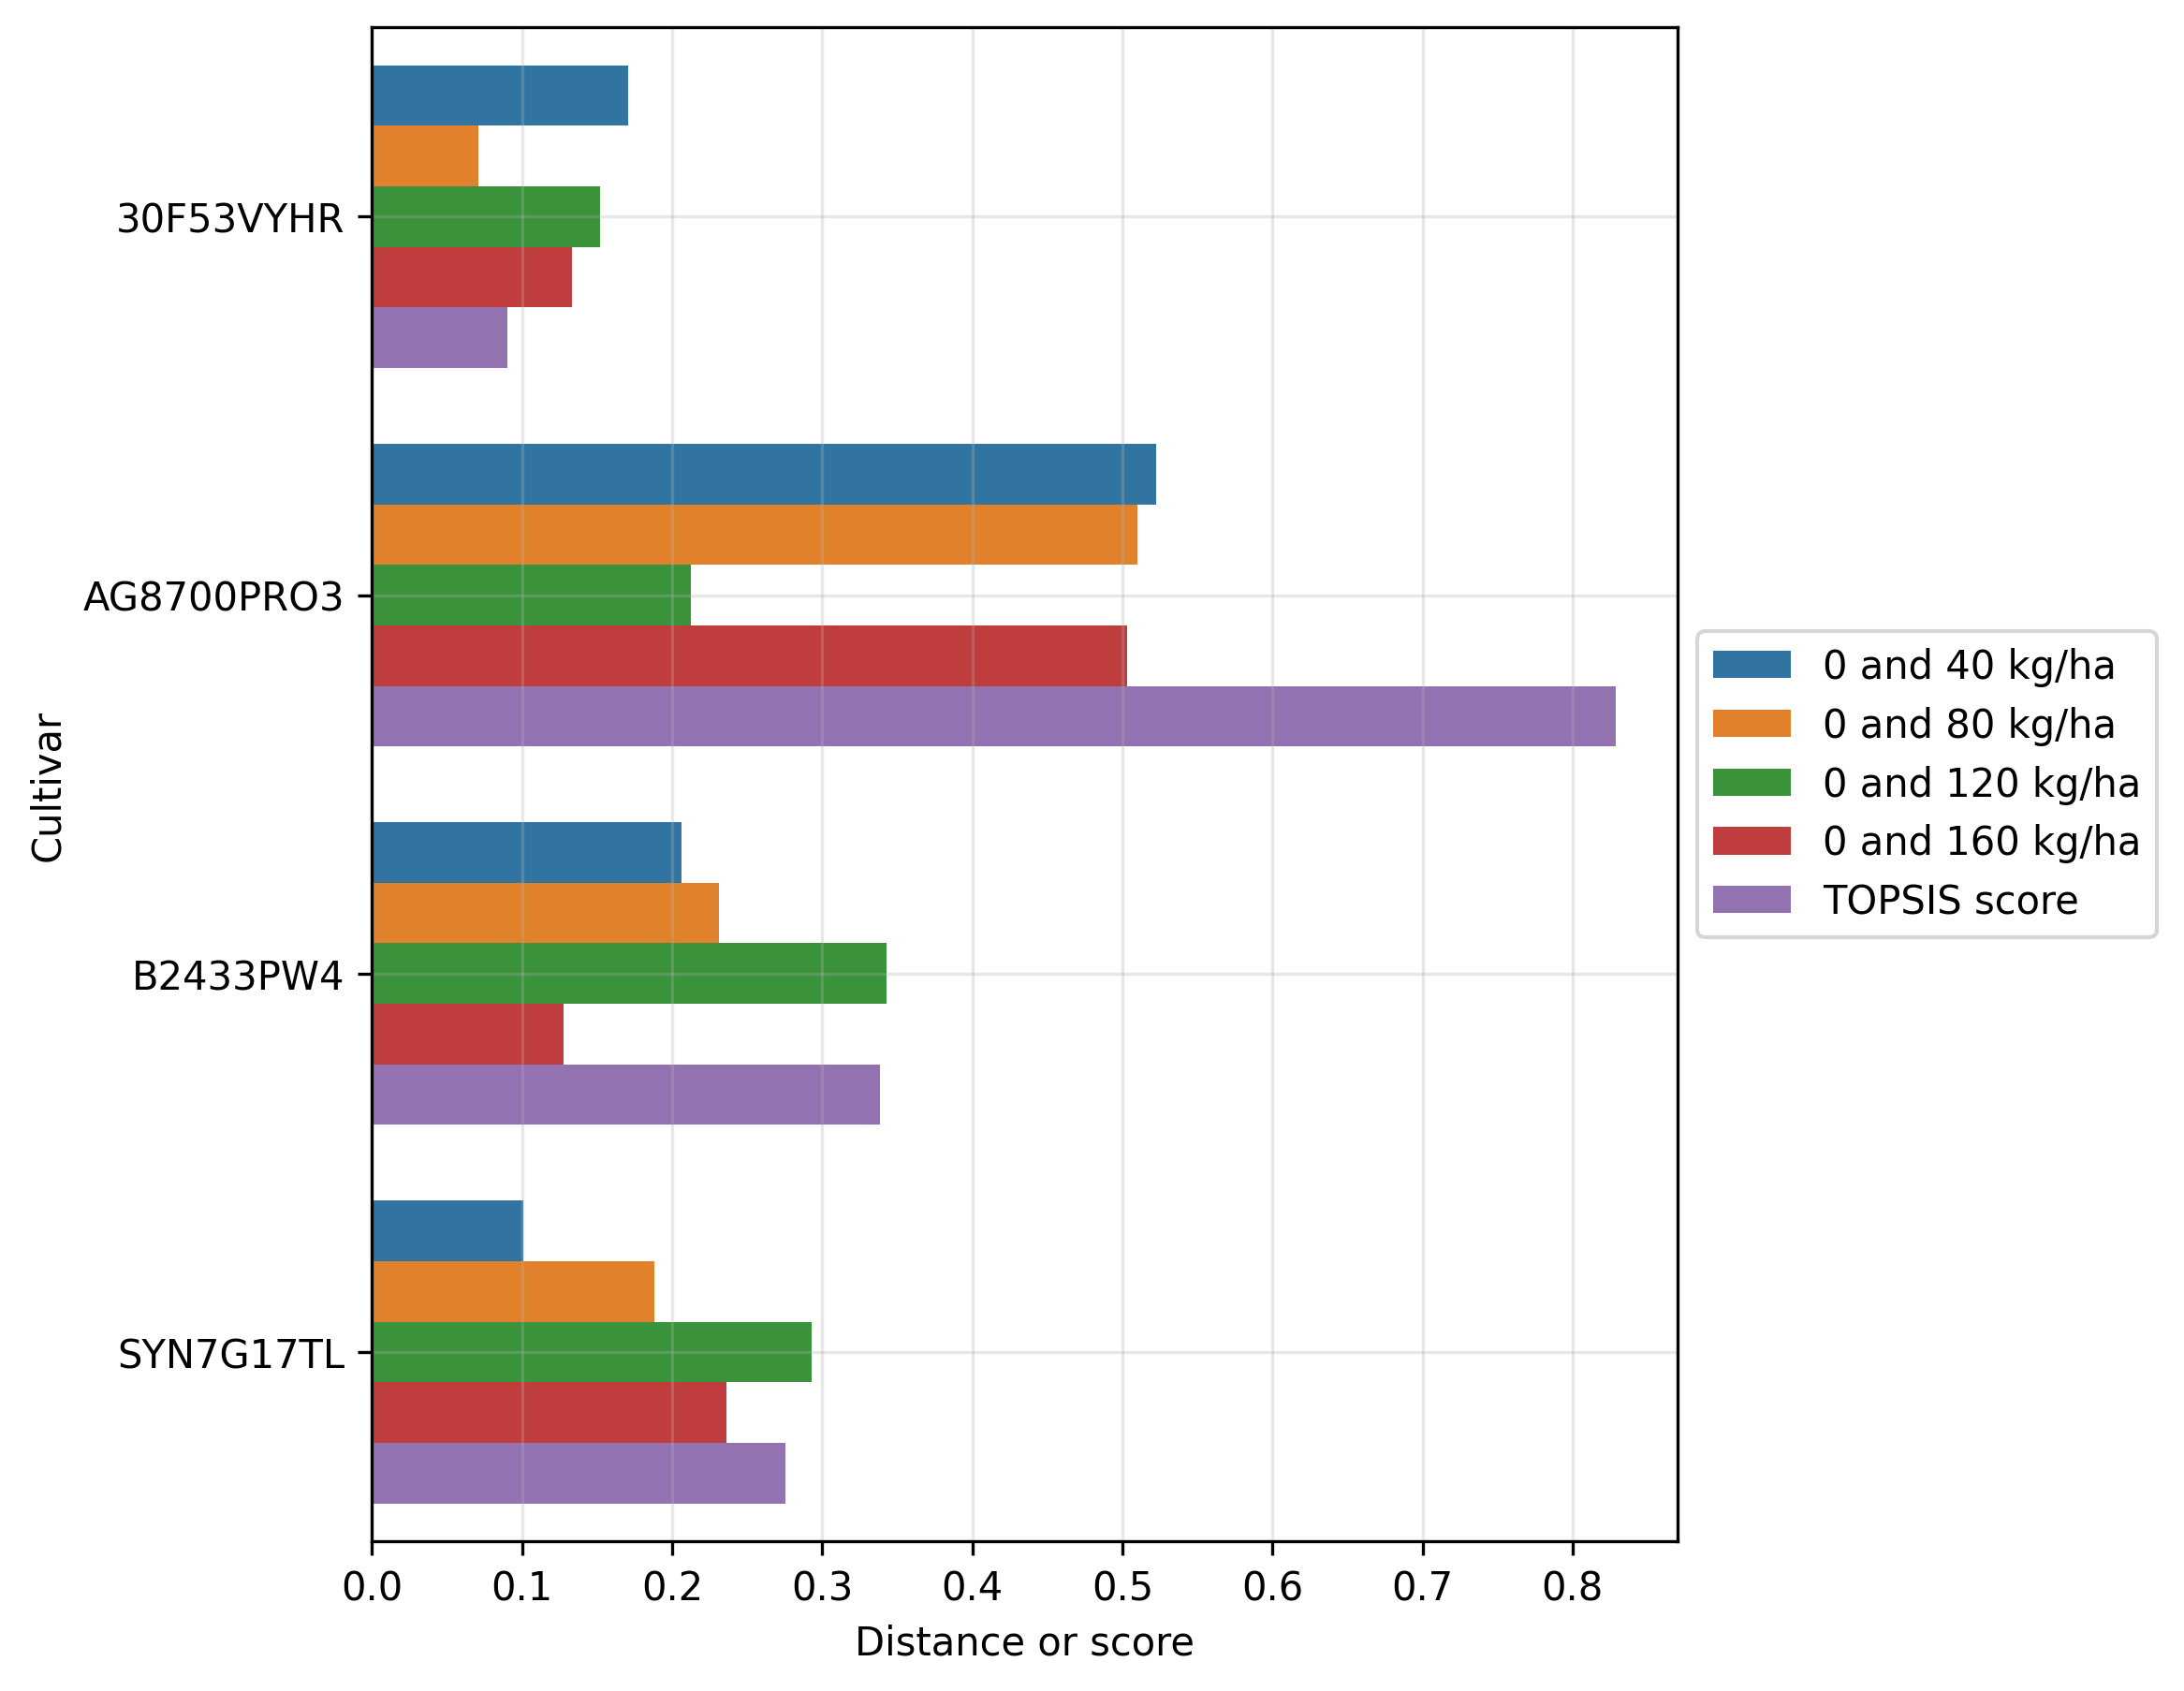

In [ ]:
#Bar chart with all values
plt.figure(dpi=300, figsize=(6,7))
sns.barplot(x='Measure', y='Cultivar', hue='Value', data=df_plot)
plt.grid(alpha=0.3)
plt.ylabel('Cultivar')
plt.xlabel('Distance or score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
# Results with weight variations
decisions = []

for i in range(0, 1000):
    numbers = [np.random.uniform(0, 1) for _ in range(4)]
    numbers = numbers / np.linalg.norm(numbers, 1)

    decision = topsis(distances, numbers, [1, 1, 1, 1])
    decision.calc()

    decisions.append(decision.C)

df_weigths = pd.DataFrame(data=decisions, columns=cultivars)

Text(0, 0.5, 'Cultivar')

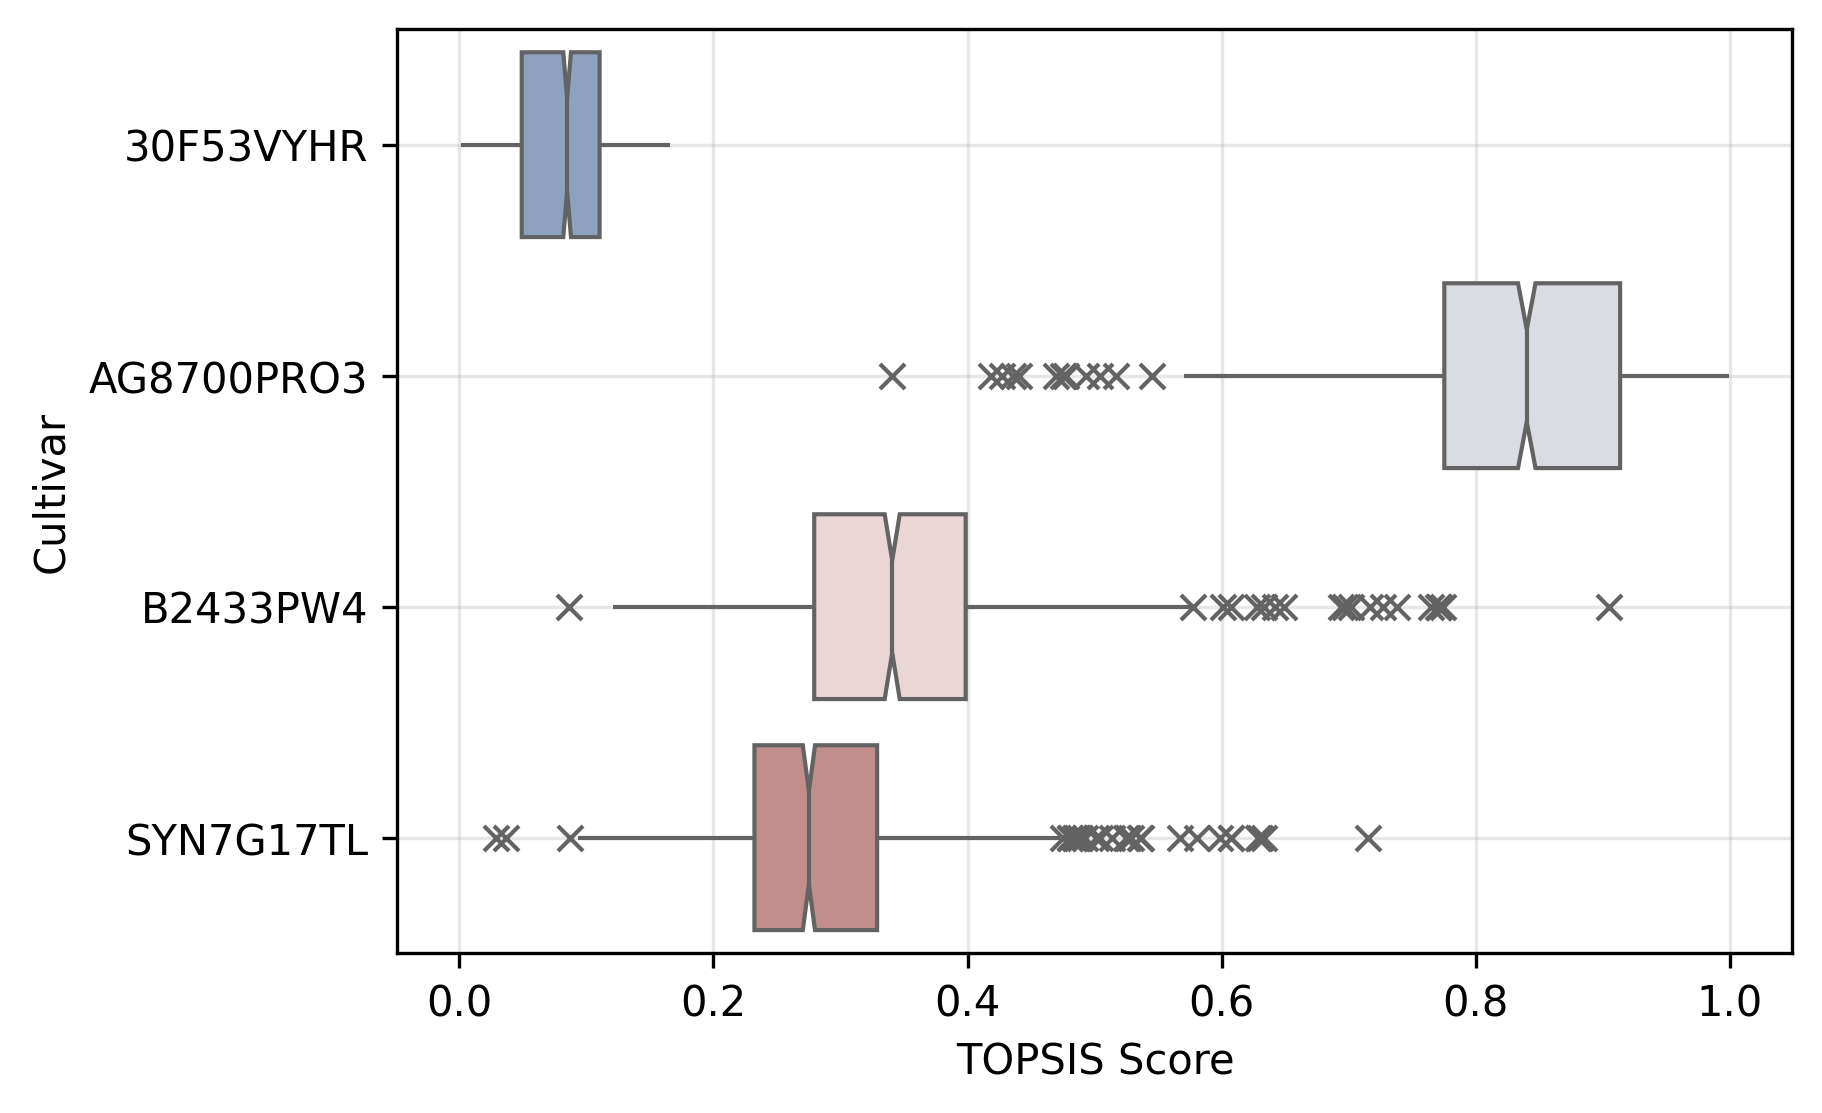

In [ ]:
#Boxplot with weigths variation

plt.figure(dpi=300, figsize=(6,4))
sns.boxplot(data=df_weigths, palette="vlag", orient='h', notch=True, showcaps=False, flierprops={"marker": "x"})
plt.grid(alpha=0.3)
plt.xlabel('TOPSIS Score')
plt.ylabel('Cultivar')